# `Forecast of Egyptian Current Account`

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import warnings
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.stattools import adfuller
warnings.filterwarnings("ignore")


In [3]:
df=pd.read_excel('thesis data.xlsx')

In [4]:
df.head()

FY  Quarters  Trade_Balance  Exports  Petroleum-Exports  Other_Exports  \
0  1995         3        -1397.9   1137.8            284.450        853.350   
1  1995         4        -2125.0   1237.7            309.425        928.275   
2  1996         1        -2157.8   1379.4            344.850       1034.550   
3  1996         2        -2172.8   1202.1            300.525        901.575   
4  1996         3        -2285.6   1113.2            278.300        834.900   

   Imports  Petroleum-Imports  Other_Imports  Petroleum_Balance  ...  \
0   2535.7              507.1        2028.56             -222.7  ...   
1   3362.7              672.5        2690.16             -363.1  ...   
2   3537.2              707.4        2829.76             -362.6  ...   
3   3374.9              675.0        2699.92             -374.5  ...   
4   3398.8              679.8        2719.04             -401.5  ...   

   CRUSE_OIL_PRICE_INDEX  EUO_AREA_GDP_growth  NATURAL_GAS_DOLLAR  \
0               38.36550              2.69700             1.80950   
1               39.12075              2.79650             1.75675   
2               39.87600              2.89600             1.70400   
3               41.74525              2.57925             1.95025   
4               43.61450              2.26250             2.19650   

   NATURAL_GAS_INDEX  NON_FUEL_COMMODITY_PRICE_INDEX  TARDE_VOLUME_PCHANGE  \
0           58.13550                        60.63150                 9.603   
1           58.48725                        61.63675                 9.603   
2           58.83900                        62.64200                 6.599   
3           62.54475                        62.74850                 6.599   
4           66.25050                        62.85500                 6.599   

   UNITED_SATES_GDP  Exchange_rate_EG_US  EUO_AREA_GDP_bn  EGYPT_GDP_bn  
0           3.35650                3.392       2179.21425     60.200000  
1           3.02025                3.392       2200.73610     60.200000  
2           2.68400                3.392       2368.61184     63.409577  
3           2.95600                3.392       2396.37760     65.167777  
4           3.22800                3.391       2418.68592     66.168685  

[5 rows x 50 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 50 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   FY                              117 non-null    int64  
 1   Quarters                        117 non-null    int64  
 2   Trade_Balance                   117 non-null    float64
 3   Exports                         117 non-null    float64
 4   Petroleum-Exports               117 non-null    float64
 5   Other_Exports                   117 non-null    float64
 6   Imports                         117 non-null    float64
 7   Petroleum-Imports               117 non-null    float64
 8   Other_Imports                   117 non-null    float64
 9   Petroleum_Balance               117 non-null    float64
 10  Other_Balance                   117 non-null    float64
 11  Services_Balance                117 non-null    float64
 12  Receipts                        117 

In [6]:
# drop redundant variables
df.drop(
    columns=[
        'Services_Balance',
        'Receipts',
        'Transportation_reciepts',
        'Government_Receipts',
        'Other',
        'Payments',
        'Government_Expenditures',
        'of_which:_Interest_Paid',
        'Private_Transfers_(net)',
        'Income_Balance',
        'Other_services_Payments',
        'Petroleum_Balance',
        'Other_Balance'
    ], 
    inplace=True
)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   FY                              117 non-null    int64  
 1   Quarters                        117 non-null    int64  
 2   Trade_Balance                   117 non-null    float64
 3   Exports                         117 non-null    float64
 4   Petroleum-Exports               117 non-null    float64
 5   Other_Exports                   117 non-null    float64
 6   Imports                         117 non-null    float64
 7   Petroleum-Imports               117 non-null    float64
 8   Other_Imports                   117 non-null    float64
 9   Suez_Canal_dues                 117 non-null    float64
 10  Travel_reciepts                 117 non-null    float64
 11  Transportation_Payments         117 non-null    float64
 12  Travel_Payments                 117 

In [8]:
df.isnull().sum()

FY                                0
Quarters                          0
Trade_Balance                     0
Exports                           0
Petroleum-Exports                 0
Other_Exports                     0
Imports                           0
Petroleum-Imports                 0
Other_Imports                     0
Suez_Canal_dues                   0
Travel_reciepts                   0
Transportation_Payments           0
Travel_Payments                   0
Income_receipts                   0
Income_payments                   0
Transfers                         0
Worker_Remittances                0
Official_Transfers_(net)          0
Current_Account_Balance           0
EGYPT_INFLATION_PCHANGE           0
KUWAIT_GDP                        0
QATAR_GDP                         0
SAUDI_ARABIA_GDP                  0
UAE_GDP                           0
ADVANCED_ECONOMY_GDP              0
WORLD_GDP                         0
CRUDE_OIL_PRICE_DOLLAR            0
CRUSE_OIL_PRICE_INDEX       

In [9]:
df.duplicated().sum()

0

In [10]:
# Combine 'FY' and 'Quarters' into a single 'Date' column

df['Date']=df['FY'].astype(str) + 'Q' + df['Quarters'].astype(str)
df['Date'] = pd.to_datetime(df['Date'])

# Drop the now redundant 'FY' and 'Quarters' columns
df.drop(columns=['FY', 'Quarters'], inplace=True)


# Display the first few rows to confirm the changes
print(df.head())

print(df.info())



   Trade_Balance  Exports  Petroleum-Exports  Other_Exports  Imports  \
0        -1397.9   1137.8            284.450        853.350   2535.7   
1        -2125.0   1237.7            309.425        928.275   3362.7   
2        -2157.8   1379.4            344.850       1034.550   3537.2   
3        -2172.8   1202.1            300.525        901.575   3374.9   
4        -2285.6   1113.2            278.300        834.900   3398.8   

   Petroleum-Imports  Other_Imports  Suez_Canal_dues  Travel_reciepts  \
0              507.1        2028.56            497.8            821.3   
1              672.5        2690.16            542.9            444.8   
2              707.4        2829.76            520.8            460.2   
3              675.0        2699.92            496.9            572.6   
4              679.8        2719.04            475.1            965.2   

   Transportation_Payments  ...  EUO_AREA_GDP_growth  NATURAL_GAS_DOLLAR  \
0                     59.0  ...              2.69700

# Preparing the data

In [12]:
# converting data from million to billion dollars
# Identify the columns up to 'Current_Account'
columns_to_convert = df.loc[:, : 'Current_Account_Balance'].columns  # Select all columns up to 'Current_Account'

# Convert the values from millions to billions by dividing by 1,000
df[columns_to_convert] = df[columns_to_convert] / 1000

# Verify the changes
print(df[columns_to_convert].tail())


     Trade_Balance  Exports  Petroleum-Exports  Other_Exports  Imports  \
112        -9.1022   9.9652             3.7083         6.2569  19.0674   
113        -6.4475  11.5399             4.9093         6.6306  17.9874   
114        -8.0003   9.5511             3.1444         6.4067  17.5514   
115        -7.6096   8.5678             2.0545         6.5133  16.1774   
116        -7.9446   8.3252             1.6094         6.7158  16.2698   

     Petroleum-Imports  Other_Imports  Suez_Canal_dues  Travel_reciepts  \
112             3.8143        15.2531           2.0102           4.0713   
113             3.0252        14.9622           1.9702           3.2470   
114             3.2485        14.3029           2.2400           2.9920   
115             3.3185        12.8589           2.5392           3.3190   
116             2.9232        13.3466           2.3993           4.4510   

     Transportation_Payments  Travel_Payments  Income_receipts  \
112                   0.8848          

In [13]:
#Calculating GCC GDP and transforming it to rescale
df['GCC_GDP'] = df[['KUWAIT_GDP', 'QATAR_GDP', 'SAUDI_ARABIA_GDP', 'UAE_GDP']].mean(axis=1)
df['LOG_GCC_GDP'] = np.log(df['GCC_GDP'])

#rescaling World and Egyptian GDP
df['Log_World_GDP']=np.log(df['WORLD_GDP'])
df['Log_EGYPT_GDP_bn']=np.log(df['EGYPT_GDP_bn'])
df['Log_EUO_AREA_GDP_bn']=np.log(df['EUO_AREA_GDP_bn'])
df.columns

Index(['Trade_Balance', 'Exports', 'Petroleum-Exports', 'Other_Exports',
       'Imports', 'Petroleum-Imports', 'Other_Imports', 'Suez_Canal_dues',
       'Travel_reciepts', 'Transportation_Payments', 'Travel_Payments',
       'Income_receipts', 'Income_payments', 'Transfers', 'Worker_Remittances',
       'Official_Transfers_(net)', 'Current_Account_Balance',
       'EGYPT_INFLATION_PCHANGE', 'KUWAIT_GDP', 'QATAR_GDP',
       'SAUDI_ARABIA_GDP', 'UAE_GDP', 'ADVANCED_ECONOMY_GDP', 'WORLD_GDP',
       'CRUDE_OIL_PRICE_DOLLAR', 'CRUSE_OIL_PRICE_INDEX',
       'EUO_AREA_GDP_growth', 'NATURAL_GAS_DOLLAR', 'NATURAL_GAS_INDEX',
       'NON_FUEL_COMMODITY_PRICE_INDEX', 'TARDE_VOLUME_PCHANGE',
       'UNITED_SATES_GDP', 'Exchange_rate_EG_US', 'EUO_AREA_GDP_bn',
       'EGYPT_GDP_bn', 'Date', 'GCC_GDP', 'LOG_GCC_GDP', 'Log_World_GDP',
       'Log_EGYPT_GDP_bn', 'Log_EUO_AREA_GDP_bn'],
      dtype='object')

### Current account

**

Egypt's current account has experienced significant fluctuations over the years, shaped by global economic trends, local policy changes, and geopolitical events. These shifts highlight Egypt's economic vulnerabilities and the impact of major external shocks, such as the Russia-Ukraine war and the Israel-Gaza invasion, as well as domestic reforms like the 2016 economic reform program and exchange rate liberalization.

During the late 1990s and early 2000s, Egypt’s current account deficits were moderate. Stable inflows from worker remittances, Suez Canal dues, and tourism receipts offset persistent trade deficits caused by rising imports of petroleum and essential goods. External shocks such as the Asian financial crisis in 1997 weakened global demand, affecting exports, particularly non-petroleum goods. However, steady remittances from Egyptians working in Gulf Cooperation Council (GCC) countries helped mitigate the impact. 

The global financial crisis of 2008 marked a turning point for Egypt’s current account. Falling oil prices reduced petroleum export revenues, and declining global demand hurt non-petroleum exports and tourism receipts. Worker remittances also saw temporary declines as GCC economies slowed. These events exposed structural weaknesses in Egypt’s trade composition and its reliance on foreign inflows. Following the Arab Spring in 2011, political instability disrupted exports, tourism, and foreign investments, further widening the current account deficit. However, worker remittances provided much-needed stability during this turbulent period.

The 2016 economic reform program, supported by the International Monetary Fund (IMF), marked a major shift. The liberalization of the exchange rate caused the Egyptian pound to depreciate significantly, initially increasing the cost of imports and widening the trade deficit. However, it improved the competitiveness of Egyptian exports, enhanced remittances (due to the increased local currency value of foreign inflows), and boosted tourism receipts as Egypt became a more affordable destination. Suez Canal dues also rebounded as global trade activity recovered post-2016. By 2018, these combined effects contributed to a gradual improvement in the current account.

The COVID-19 pandemic in 2020 disrupted global trade and travel, leading to sharp declines in tourism receipts and export revenues. While petroleum exports suffered due to a collapse in oil prices, worker remittances proved resilient, rebounding quickly as GCC economies recovered. Suez Canal dues also saw a resurgence in 2021 and 2022, reflecting the revival of global shipping activity.

More recently, the **Russia-Ukraine war** in 2022 and the **Israel-Gaza conflict** in 2023 have added significant strain to Egypt’s economy. The Russia-Ukraine war disrupted global commodity markets, driving up food and energy prices. As a major wheat importer, Egypt faced increased import costs, further pressuring its trade deficit. Additionally, rising oil prices affected petroleum trade. The Israel-Gaza conflict heightened regional instability, diverting resources toward humanitarian aid and border security, indirectly affecting trade and foreign investments.

Despite these challenges, the reforms implemented in 2016 have laid the groundwork for a more sustainable current account. The exchange rate liberalization continues to support export competitiveness and remittances, while sectors like tourism and the Suez Canal remain critical foreign currency earners. However, external shocks such as geopolitical conflicts and global commodity price volatility remain significant risks to Egypt’s current acariable), let me know!

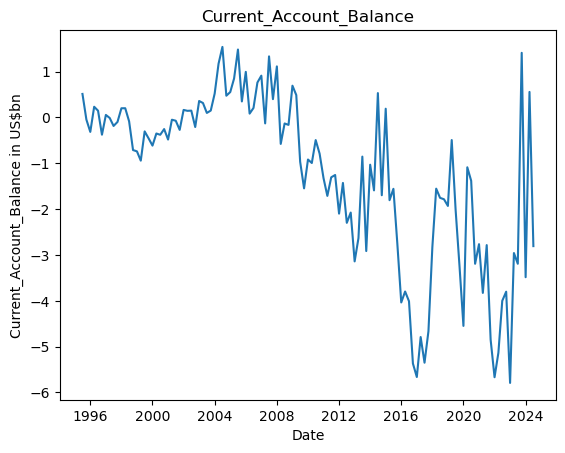

count    117.000000
mean      -1.216466
std        1.831539
min       -5.791700
25%       -2.299100
50%       -0.614400
75%        0.148700
max        1.538900
Name: Current_Account_Balance, dtype: float64


In [16]:
#Plot worker remitences
plt.plot(df['Date'],df['Current_Account_Balance'].values)
plt.ylabel('Current_Account_Balance in US$bn')
plt.xlabel('Date')
plt.title('Current_Account_Balance')
plt.show()
print(df['Current_Account_Balance'].describe())

### Trade balance

Between 1995 and the analyzed period, Egypt's trade balance consistently exhibited a deficit, with imports persistently outpacing exports. This trend underscores structural challenges in Egypt’s trade composition, particularly its heavy reliance on imports, including petroleum-related products. While exports have grown over time, they have struggled to match the pace of imports due to a narrow export base and limited diversification. Petroleum exports showed significant volatility, driven by global oil price fluctuations and geopolitical events, whereas non-petroleum exports exhibited a more stable, albeit modest, upward trajectory. Notably, during periods of heightened global tensions, such as the Russia-Ukraine war, Egypt's petroleum exports increased significantly, benefiting from surging natural gas prices as the country leveraged its strategic position as a regional energy exporter. The 2016 economic reform program, which included the liberalization of the exchange rate and currency devaluation, had a dual impact: it enhanced the competitiveness of non-petroleum exports in global markets but simultaneously increased the cost of imports, exacerbating the trade deficit in the short term.


Global factors, such as fluctuating crude oil and natural gas prices, have played a critical role in shaping Egypt's trade dynamics. Spikes in oil prices, particularly during periods of geopolitical instability like the Iraq War (2003) and the mid-2000s, widened the petroleum trade deficit as higher import costs eroded export revenues. Conversely, the Russia-Ukraine war created an opportunity for Egypt to expand its natural gas exports, benefiting from Europe’s shift away from Russian energy supplies. Domestically, the 2016 economic reform program brought profound changes to trade. On one hand, the devaluation of the Egyptian pound improved the price competitiveness of exports, particularly non-petroleum goods, fostering their gradual growth. On the other hand, the reforms made imports, including essential goods, more expensive, fueling domestic inflation and straining the trade balance
Egypt’s trade patterns have been shaped by a series of global and domestic events, each leaving a lasting imprint on export, import, and trade balance trends. In the late 1990s, the Asian financial crisis (1997) caused a global economic slowdown, reducing demand for Egyptian exports, especially non-petroleum goods. During the early 2000s, rising global oil prices, fueled by increased demand and conflicts like the Iraq War (2003), boosted petroleum export revenues but also significantly increased the cost of petroleum imports. Domestically, economic liberalization under the Mubarak administration fostered some growth in non-petroleum exports, but this was insufficient to overcome the persistent trade deficit.

The 2008 global financial crisis marked another turning point for Egypt's trade. Global demand contracted sharply, leading to a broad decline in exports, while plummeting oil prices caused a steep drop in petroleum revenues. The political upheaval following the Arab Spring (2011) disrupted trade further, dampening export growth and leaving imports of essential goods high. Meanwhile, regional conflicts, including the Gaza conflict, placed additional strain on Egypt’s trade as the country managed humanitarian efforts and border security, indirectly affecting trade flows.

The mid-2010s witnessed a significant shift with the 2014 collapse in oil prices. While this reduced the cost of petroleum imports, it also severely affected Egypt's petroleum export revenues. The 2016 economic reform program, supported by the International Monetary Fund (IMF), introduced a floating exchange rate regime. The subsequent devaluation of the Egyptian pound made imports more expensive, triggering inflationary pressures. However, over time, the reforms enhanced export performance, particularly non-petroleum goods, as Egypt became more competitive internationally.

More recently, the COVID-19 pandemic in 2020 disrupted global trade and supply chains, causing declines in both export and import volumes. The accompanying collapse in oil prices further reduced petroleum export revenues. However, essential imports, including food and medical supplies, remained steady, highlighting Egypt’s dependence on external supplies. The Russia-Ukraine war in 2022 exacerbated global supply chain disruptions, driving up the prices of wheat and energy, both critical imports for Egypt. Additionally, the ongoing Gaza conflict has placed further pressure on Egypt’s trade, as the country contends with increased humanitarian and security responsibilities. Despite these challenges, the surge in global natural gas prices during these crises allowed Egypt to capitalize on its role as a regional energy hub, significantly boosting petroleum export revenues.

These trends illustrate the deep interconnection between Egypt's trade performance and global economic conditions, geopolitical events, and domestic policy decisions. The 2016 economic reform program, particularly the exchange rate liberalization, was a pivotal moment that reshaped the structure of Egypt’s trade. While these reforms have laid the foundation for long-term export competitiveness, they have also introduced short-term challenges, such as rising import costs and inflation. Petroleum trade remains a key barometer of Egypt's vulnerability to external shocks, reflecting the broader complexities of its trade dynamics in a volatile global environment.

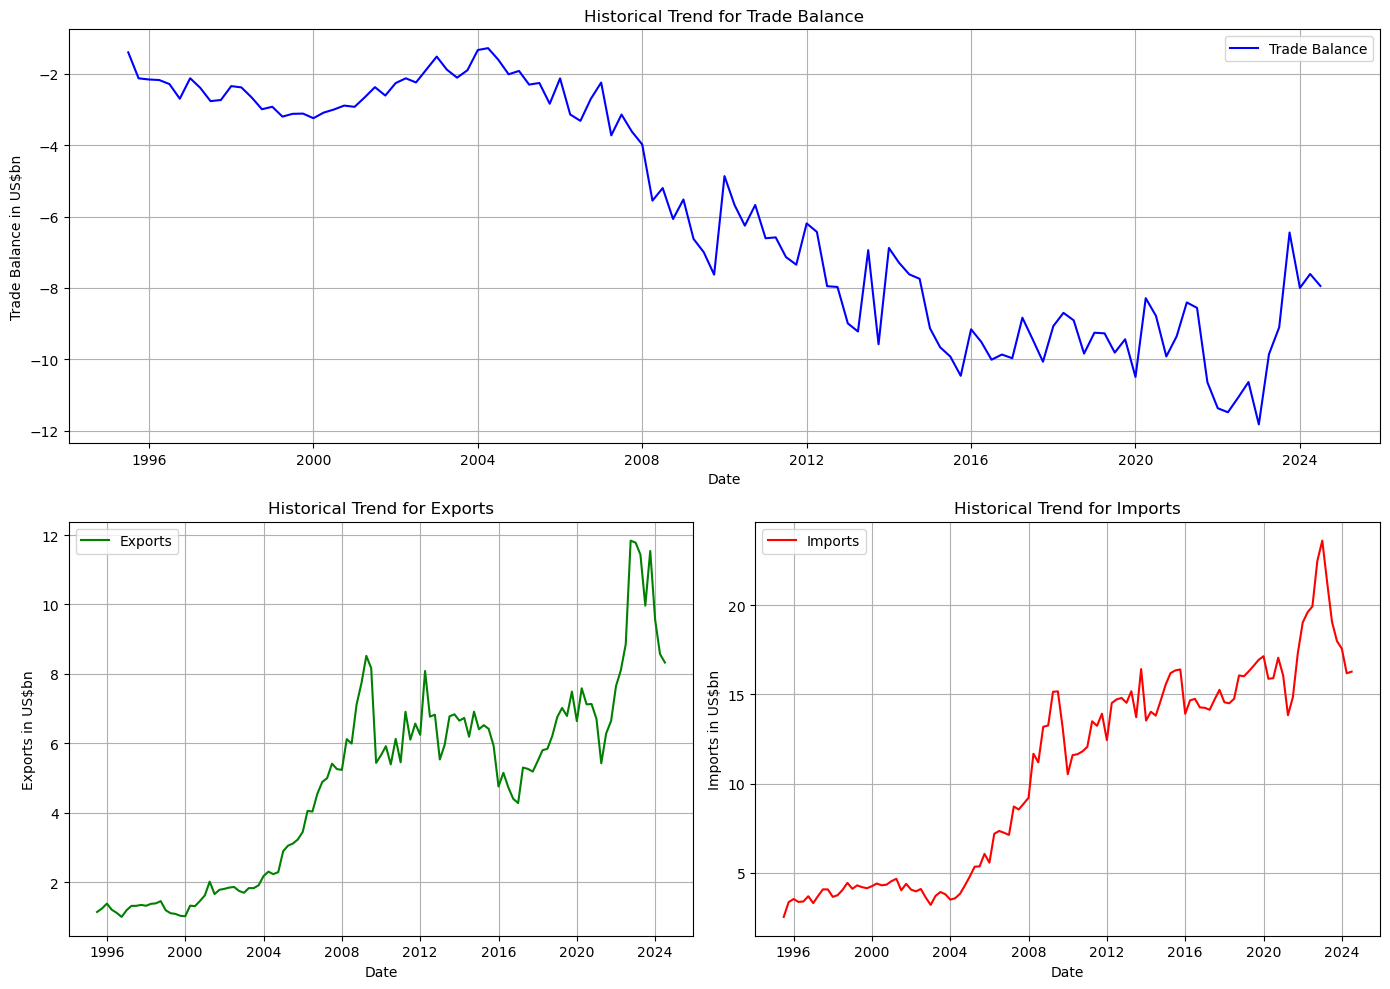

count    117.000000
mean      -5.850418
std        3.241853
min      -11.825200
25%       -9.069200
50%       -6.191100
75%       -2.659100
max       -1.279100
Name: Trade_Balance, dtype: float64 count    117.000000
mean       4.832615
std        2.779252
min        0.995800
25%        1.826600
50%        5.390300
75%        6.729600
max       11.837400
Name: Exports, dtype: float64 count    117.000000
mean      10.683032
std        5.710197
min        2.535700
25%        4.298700
50%       12.434400
75%       15.162900
max       23.605000
Name: Imports, dtype: float64


In [19]:

# Create a grid layout for the subplots
fig = plt.figure(figsize=(14, 10))

# Add Trade_Balance at the top
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(df['Date'], df['Trade_Balance'], label='Trade Balance', color='blue')
ax1.set_title("Historical Trend for Trade Balance")
ax1.set_xlabel("Date")
ax1.set_ylabel("Trade Balance in US$bn")
ax1.legend()
ax1.grid(True)

# Add Exports and Imports side by side in the second row
ax2 = fig.add_subplot(2, 2, 3)
ax2.plot(df['Date'], df['Exports'], label='Exports', color='green')
ax2.set_title("Historical Trend for Exports")
ax2.set_xlabel("Date")
ax2.set_ylabel("Exports in US$bn")
ax2.legend()
ax2.grid(True)

ax3 = fig.add_subplot(2, 2, 4)
ax3.plot(df['Date'], df['Imports'].abs(), label='Imports', color='red')
ax3.set_title("Historical Trend for Imports")
ax3.set_xlabel("Date")
ax3.set_ylabel("Imports in US$bn")
ax3.legend()
ax3.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()
print(df['Trade_Balance'].describe(),df['Exports'].describe(),df['Imports'].describe() )

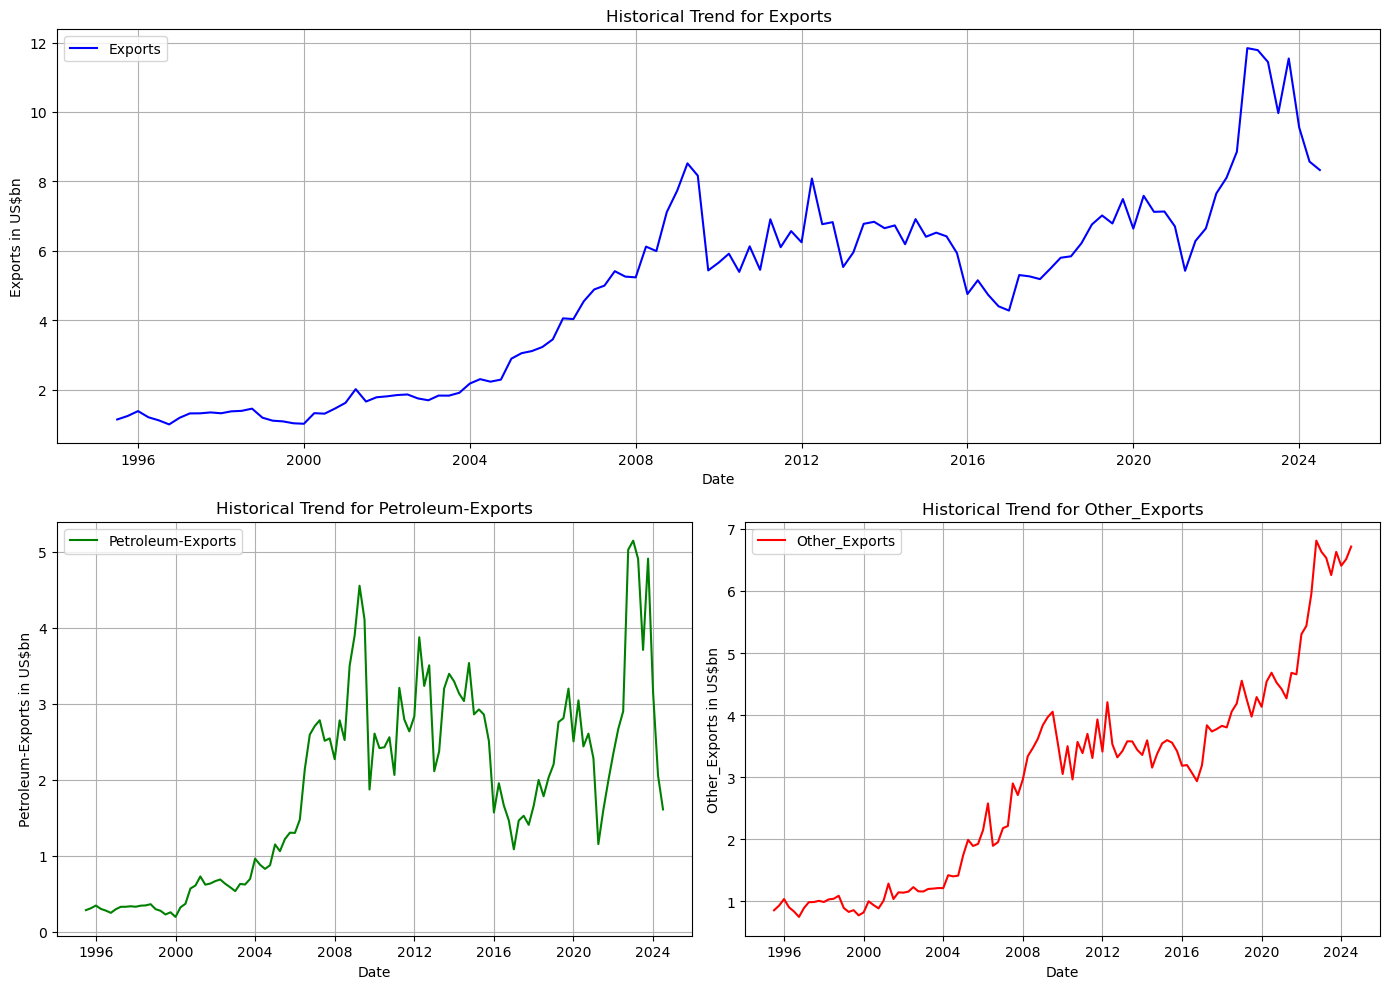

In [20]:

# Create a grid layout for the subplots
fig = plt.figure(figsize=(14, 10))

# Add Trade_Balance at the top
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(df['Date'], df['Exports'], label='Exports', color='blue')
ax1.set_title("Historical Trend for Exports")
ax1.set_xlabel("Date")
ax1.set_ylabel("Exports in US$bn")
ax1.legend()
ax1.grid(True)

# Add Exports and Imports side by side in the second row
ax2 = fig.add_subplot(2, 2, 3)
ax2.plot(df['Date'], df['Petroleum-Exports'], label='Petroleum-Exports', color='green')
ax2.set_title("Historical Trend for Petroleum-Exports")
ax2.set_xlabel("Date")
ax2.set_ylabel("Petroleum-Exports in US$bn")
ax2.legend()
ax2.grid(True)


ax3 = fig.add_subplot(2, 2, 4)
ax3.plot(df['Date'], df['Other_Exports'], label='Other_Exports', color='red')
ax3.set_title("Historical Trend for Other_Exports")
ax3.set_xlabel("Date")
ax3.set_ylabel("Other_Exports in US$bn")
ax3.legend()
ax3.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


The analysis of **Egypt's exports** reveals key relationships with various economic indicators. **Exports exhibit a very strong positive correlation** with **imports** (0.94, p-value < 0.0001), indicating that as import levels rise, exports tend to increase proportionally. This suggests a high level of integration between imported inputs and export production, reflecting Egypt’s reliance on global supply chains.  

A **moderately strong positive correlation** is observed between **exports and the exchange rate of the Egyptian pound to the US dollar** (0.68, p-value < 0.0001). This indicates that fluctuations in the exchange rate significantly influence export dynamics, likely through changes in price competitiveness.  

**Global economic indicators also play a substantial role in export performance.** Exports exhibit a **strong positive correlation** with **the logarithm of world GDP** (0.92, p-value < 0.0001), suggesting that global economic activity strongly impacts Egypt’s trade. Similarly, **crude oil prices** show a **strong positive correlation** with exports (0.85, p-value < 0.0001), highlighting the close relationship between energy market trends and export revenues.  

In contrast, **natural gas prices** display a **weak positive correlation** with exports (0.21, p-value = 0.0214), indicating that changes in gas prices have a limited direct effect on total export performance. Additionally, **exports exhibit a notable positive correlation** with the **GDP of the Euro Area** (0.75, p-value < 0.0001), emphasizing Egypt’s strong trade ties with European economies.  

These findings underscore the **strong dependence of Egypt’s exports on global economic conditions, energy prices, exchange rate movements, and key trade partners**, highlighting the interconnected nature of Egypt’s trade performance with both local and international economic factors.  


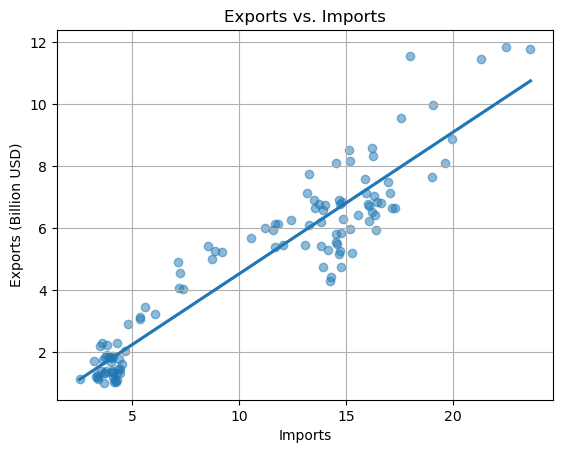

Correlation between Exports and Imports: 0.94, P-value: 0.0000


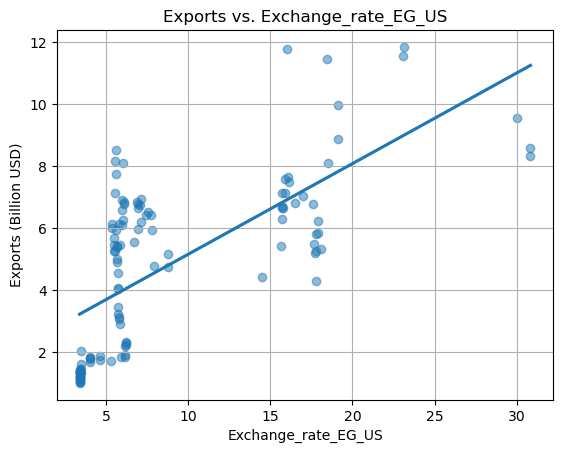

Correlation between Exports and Exchange_rate_EG_US: 0.68, P-value: 0.0000


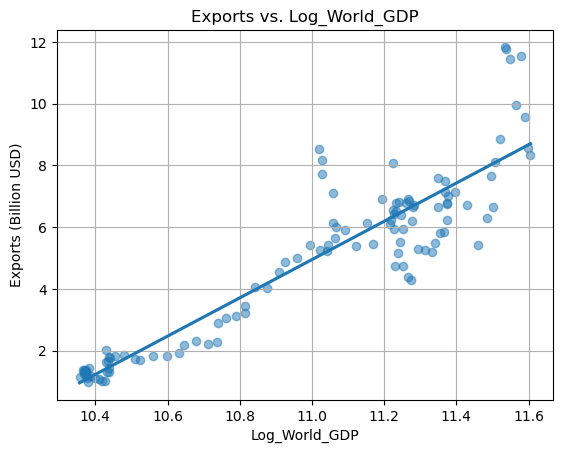

Correlation between Exports and Log_World_GDP: 0.92, P-value: 0.0000


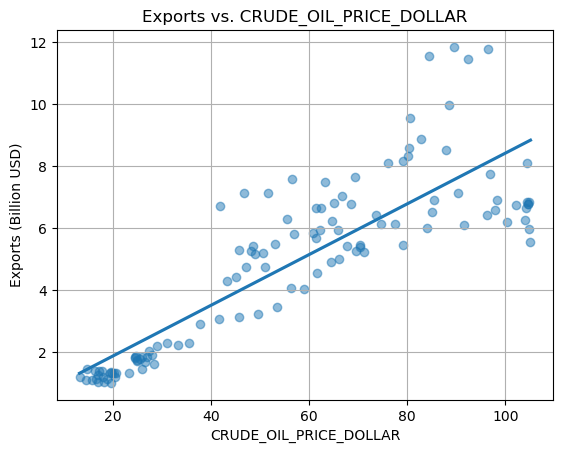

Correlation between Exports and CRUDE_OIL_PRICE_DOLLAR: 0.85, P-value: 0.0000


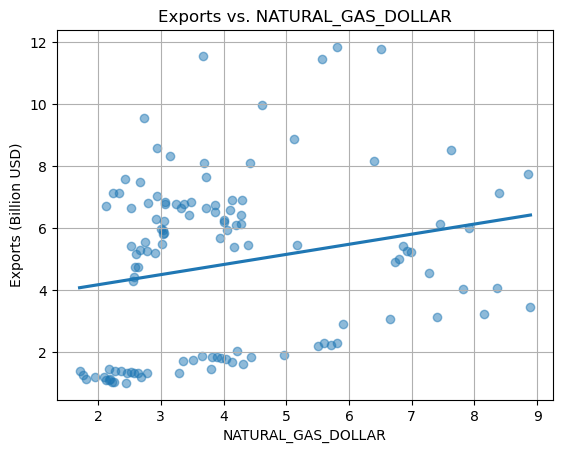

Correlation between Exports and NATURAL_GAS_DOLLAR: 0.21, P-value: 0.0214


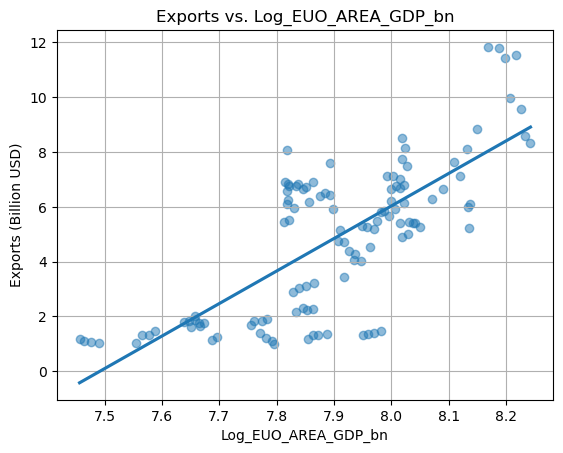

Correlation between Exports and Log_EUO_AREA_GDP_bn: 0.75, P-value: 0.0000


In [22]:
# Scatter plots and correlation analysis for Exports

# Analyze relationships with potential influencing variables
exports_features = ["Imports", "Exchange_rate_EG_US", "Log_World_GDP",'CRUDE_OIL_PRICE_DOLLAR', 'NATURAL_GAS_DOLLAR', 
                    'Log_EUO_AREA_GDP_bn']
for feature in exports_features:
    # Scatter plot
    sns.regplot(x=df[feature], y=df["Exports"], ci=None, scatter_kws={'alpha': 0.5})
    plt.title(f"Exports vs. {feature}")
    plt.xlabel(feature)
    plt.ylabel("Exports (Billion USD)")
    plt.grid()
    plt.show()

    # Correlation coefficient
    corr, p_value = pearsonr(df[feature], df["Exports"])
    print(f"Correlation between Exports and {feature}: {corr:.2f}, P-value: {p_value:.4f}")


The **Ljung-Box test** is used to assess whether the residuals of a time series exhibit significant autocorrelation. In this case, the test was applied to the residuals of **Exports**, and the results indicate the presence of autocorrelation at multiple lags.

At **lag 4**, the Ljung-Box test statistic is **12.736**, with a **p-value of 0.0126**. Since the p-value is below the conventional significance level of **0.05**, we reject the null hypothesis at this lag, indicating that the residuals exhibit significant autocorrelation. Similarly, at **lag 8**, the test statistic increases to **20.564**, with an even lower **p-value of 0.0084**, further confirming the presence of autocorrelation. At **lag 12**, the test statistic reaches **22.671**, with a **p-value of 0.0307**, again below **0.05**, suggesting that autocorrelation persists at longer lags.

These results indicate that the **residuals of the Exports time series are not white noise**, meaning there are underlying patterns or dependencies in the data. 

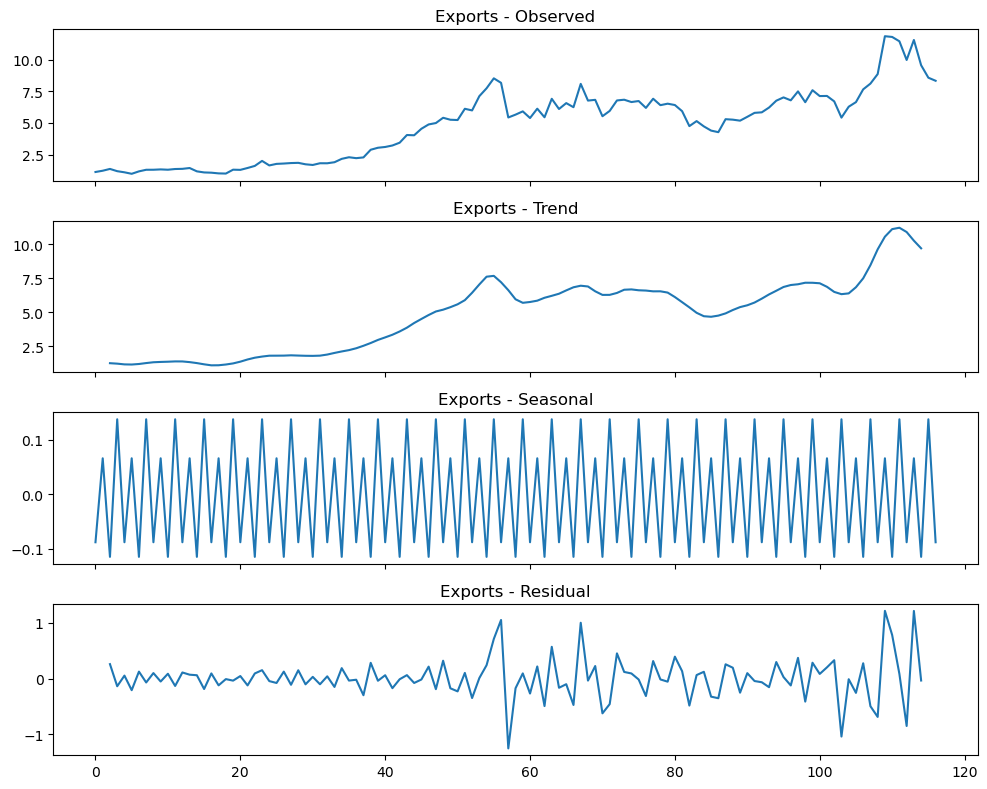

Ljung-Box Test Results for Exports:
       lb_stat  lb_pvalue
4   12.736033   0.012640
8   20.563671   0.008401
12  22.670644   0.030656


In [24]:
# Perform Seasonal Decomposition for Exports
result_exports = seasonal_decompose(df["Exports"], model="additive", period=4)

# Plot Seasonal Decomposition for Exports
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)
result_exports.observed.plot(ax=axes[0], title="Exports - Observed", legend=False)
result_exports.trend.plot(ax=axes[1], title="Exports - Trend", legend=False)
result_exports.seasonal.plot(ax=axes[2], title="Exports - Seasonal", legend=False)
result_exports.resid.plot(ax=axes[3], title="Exports - Residual", legend=False)
plt.tight_layout()
plt.show()

# Perform Ljung-Box Test for Exports
ljung_box_exports = acorr_ljungbox(result_exports.resid.dropna(), lags=[4, 8, 12], return_df=True)
print("Ljung-Box Test Results for Exports:\n", ljung_box_exports)


The **Augmented Dickey-Fuller (ADF) test** results for **Exports** indicate that the original time series is **non-stationary**, with an **ADF Statistic of -0.6291** and a **p-value of 0.8643**, which is significantly higher than the **0.05 threshold**. This means that the null hypothesis, which states that the series has a unit root (i.e., is non-stationary), **cannot be rejected**. As a result, the Exports time series exhibits trends or patterns over time, making it unsuitable for direct time series forecasting.

After applying **first-order differencing**, the ADF test shows a significant improvement in stationarity, with an **ADF Statistic of -5.6438** and a **p-value of 0.0000**, which is well below **0.05**. This confirms that the differenced series is **stationary**, meaning that its statistical properties, such as mean and variance, remain constant over time.

ADF Test for Exports:
ADF Statistic: -0.6291
p-value: 0.8643
Critical Values: {'1%': -3.4912451337340342, '5%': -2.8881954545454547, '10%': -2.5809876033057852}
--> Exports is **non-stationary** (p > 0.05)

ADF Test for Exports (After Differencing):
ADF Statistic: -5.6438
p-value: 0.0000
Critical Values: {'1%': -3.4912451337340342, '5%': -2.8881954545454547, '10%': -2.5809876033057852}
--> Exports is **stationary** after differencing


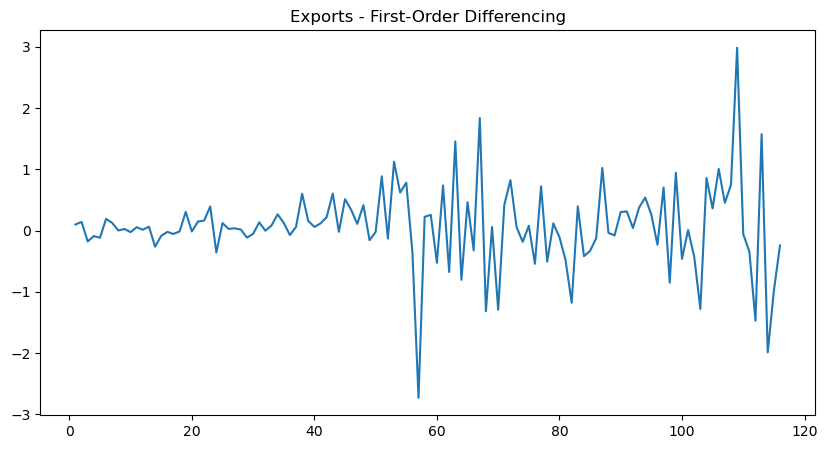

In [26]:

# Perform ADF Test for Exports
adf_test = adfuller(df["Exports"].dropna())

print("ADF Test for Exports:")
print(f"ADF Statistic: {adf_test[0]:.4f}")
print(f"p-value: {adf_test[1]:.4f}")
print("Critical Values:", adf_test[4])
if adf_test[1] > 0.05:
    print("--> Exports is **non-stationary** (p > 0.05)")
else:
    print("--> Exports is **stationary** (p <= 0.05)")

# Apply first-order differencing
df["Exports_diff"] = df["Exports"].diff()

# Perform ADF Test after Differencing
adf_test_diff = adfuller(df["Exports_diff"].dropna())

print("\nADF Test for Exports (After Differencing):")
print(f"ADF Statistic: {adf_test_diff[0]:.4f}")
print(f"p-value: {adf_test_diff[1]:.4f}")
print("Critical Values:", adf_test_diff[4])
if adf_test_diff[1] > 0.05:
    print("--> Exports is still **non-stationary** after differencing")
else:
    print("--> Exports is **stationary** after differencing")

# Plot Exports after Differencing
df["Exports_diff"].dropna().plot(title="Exports - First-Order Differencing", figsize=(10, 5))
plt.show()


## Imports

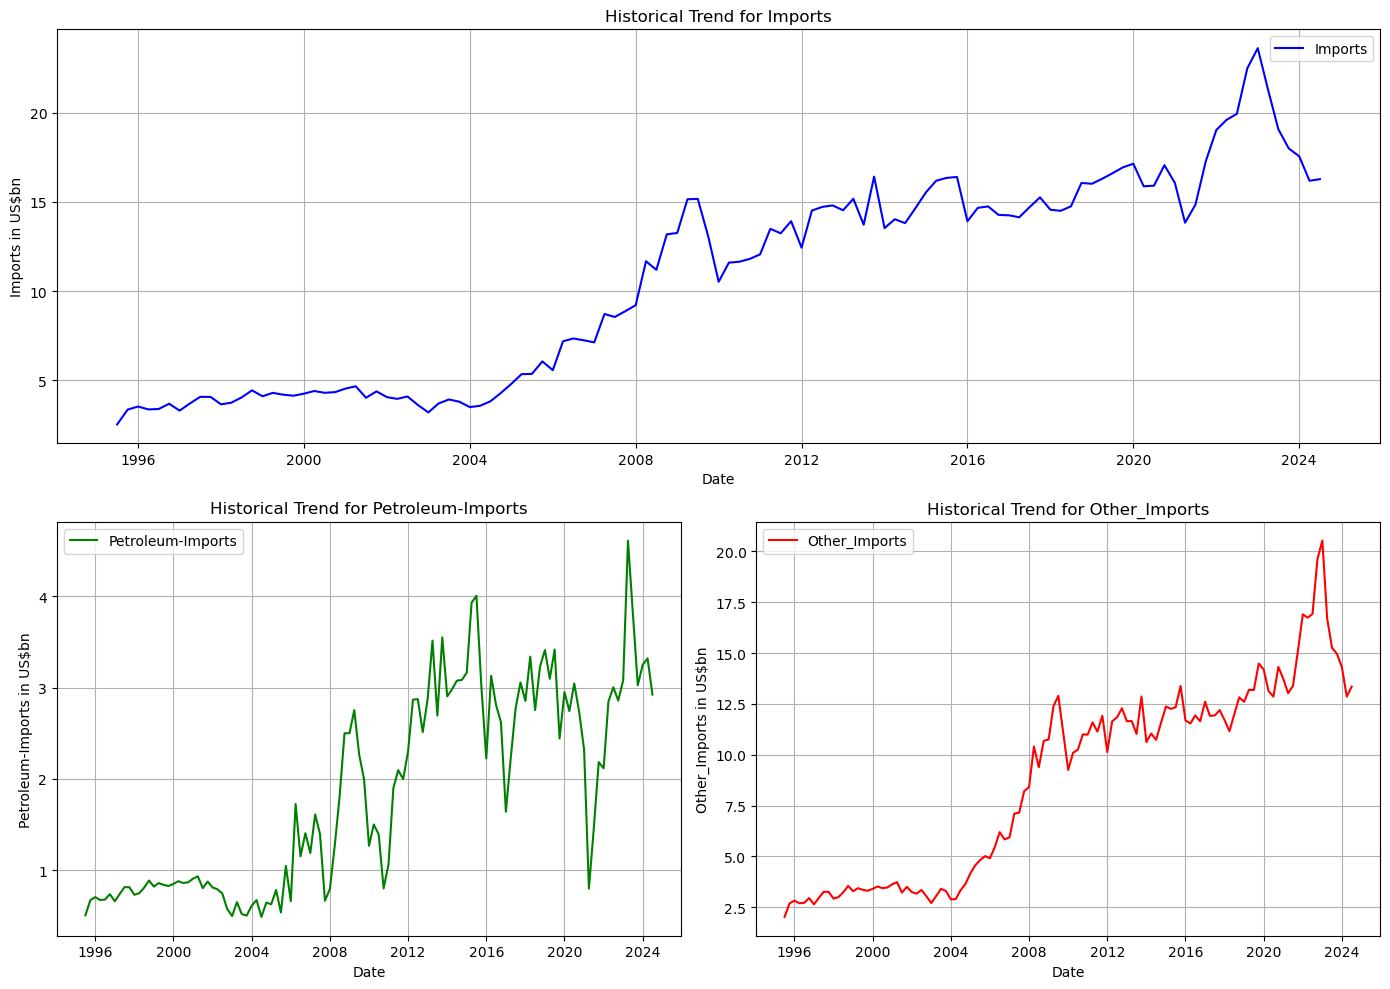

In [28]:

# Create a grid layout for the subplots
fig = plt.figure(figsize=(14, 10))

# Add Trade_Balance at the top
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(df['Date'], df['Imports'].abs(), label='Imports', color='blue')
ax1.set_title("Historical Trend for Imports")
ax1.set_xlabel("Date")
ax1.set_ylabel("Imports in US$bn")
ax1.legend()
ax1.grid(True)

# Add Exports and Imports side by side in the second row
ax2 = fig.add_subplot(2, 2, 3)
ax2.plot(df['Date'], df['Petroleum-Imports'].abs(), label='Petroleum-Imports', color='green')
ax2.set_title("Historical Trend for Petroleum-Imports")
ax2.set_xlabel("Date")
ax2.set_ylabel("Petroleum-Imports in US$bn")
ax2.legend()
ax2.grid(True)


ax3 = fig.add_subplot(2, 2, 4)
ax3.plot(df['Date'], df['Other_Imports'].abs(), label='Other_Imports', color='red')
ax3.set_title("Historical Trend for Other_Imports")
ax3.set_xlabel("Date")
ax3.set_ylabel("Other_Imports in US$bn")
ax3.legend()
ax3.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


The analysis of **Egypt's imports** reveals key relationships with various economic indicators. Notably, imports exhibit a **strong positive correlation** with **Egypt’s GDP (Log_EGYPT_GDP_bn)** (0.97, p-value < 0.0001), indicating that as economic output grows, import levels rise significantly. This reflects the strong dependency of imports on overall economic activity, where higher GDP leads to increased demand for foreign goods and services.  

Imports also show a **strong positive correlation** with the **non-fuel commodity price index** (0.93, p-value < 0.0001), suggesting that fluctuations in global commodity prices substantially influence Egypt’s import costs and volumes. Similarly, **crude oil prices** exhibit a **strong positive correlation** with imports (0.78, p-value < 0.0001), emphasizing the impact of energy market trends on the country’s trade balance.  

A **moderate positive correlation** exists between **imports and Egypt’s inflation rate** (0.61, p-value < 0.0001), indicating that rising domestic price levels may be associated with increased import demand or higher costs of imported goods.  

In contrast, **imports show no significant relationship** with **natural gas prices** (-0.01, p-value = 0.9483), suggesting that fluctuations in this energy source have little to no direct effect on Egypt’s total imports.  

These findings highlight the **strong dependence of Egypt’s imports on economic growth, global commodity prices, inflation, and oil prices**, which are crucial factors for policymakers to consider in trade and macroeconomic planning.

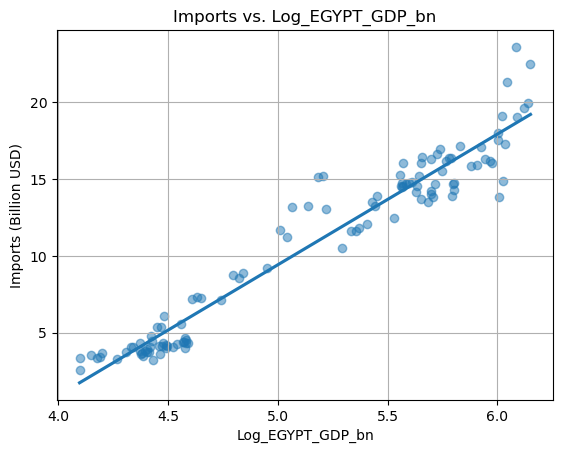

Correlation between Imports and Log_EGYPT_GDP_bn: 0.97, P-value: 0.0000


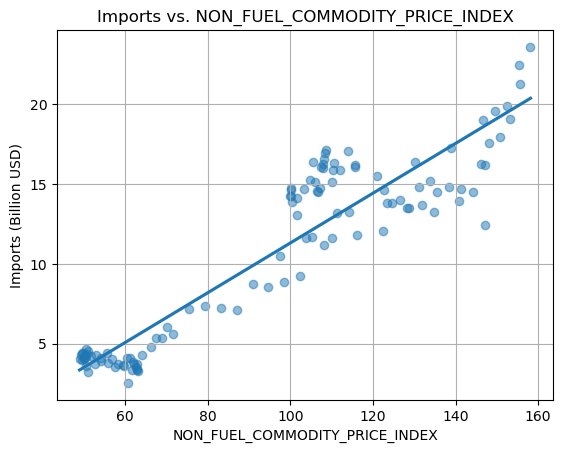

Correlation between Imports and NON_FUEL_COMMODITY_PRICE_INDEX: 0.93, P-value: 0.0000


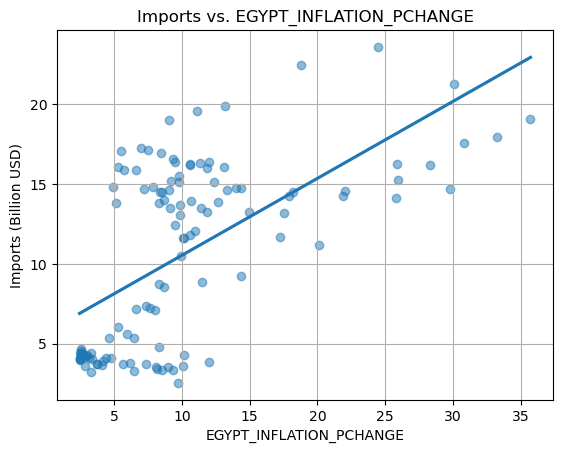

Correlation between Imports and EGYPT_INFLATION_PCHANGE: 0.61, P-value: 0.0000


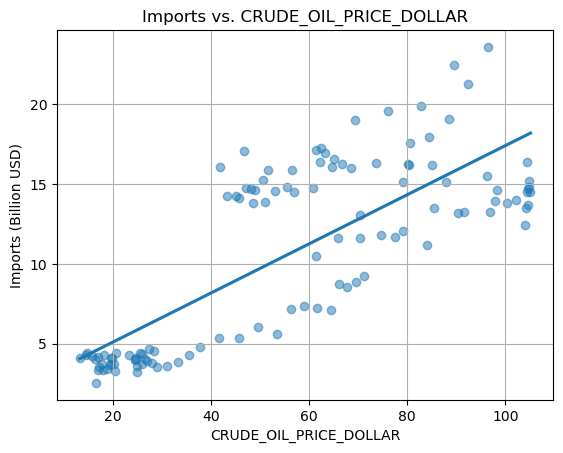

Correlation between Imports and CRUDE_OIL_PRICE_DOLLAR: 0.78, P-value: 0.0000


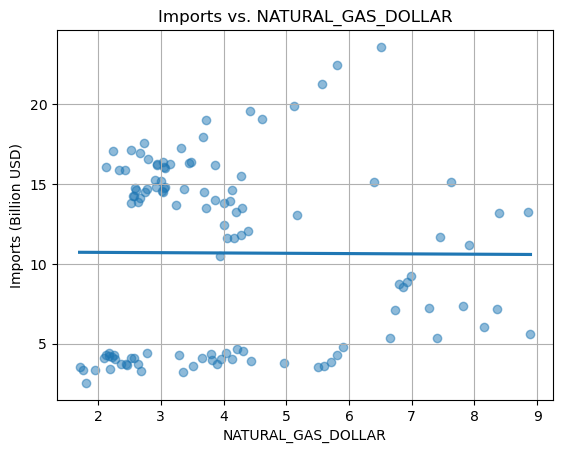

Correlation between Imports and NATURAL_GAS_DOLLAR: -0.01, P-value: 0.9483


In [30]:
# Scatter plots and correlation analysis for Imports
imports_features = ["Log_EGYPT_GDP_bn", "NON_FUEL_COMMODITY_PRICE_INDEX", 'EGYPT_INFLATION_PCHANGE','CRUDE_OIL_PRICE_DOLLAR',
                  'NATURAL_GAS_DOLLAR' ]
for feature in imports_features:
    # Scatter plot
    sns.regplot(x=df[feature], y=df["Imports"], ci=None, scatter_kws={'alpha': 0.5})
    plt.title(f"Imports vs. {feature}")
    plt.xlabel(feature)
    plt.ylabel("Imports (Billion USD)")
    plt.grid()
    plt.show()

    # Correlation coefficient
    corr, p_value = pearsonr(df[feature], df["Imports"])
    print(f"Correlation between Imports and {feature}: {corr:.2f}, P-value: {p_value:.4f}")


The **Ljung-Box test** results for **Imports** indicate a strong presence of autocorrelation in the residuals at multiple lags. The test statistic at **lag 4** is **26.19**, with a **p-value of 2.90e-05 (0.00002896)**, which is significantly lower than the conventional significance level of **0.05**. This strongly suggests that the residuals are **not white noise** and exhibit autocorrelation. 

At **lag 8**, the Ljung-Box test statistic increases drastically to **57.86**, with an extremely small **p-value of 1.22e-09 (0.00000000122)**, confirming even stronger autocorrelation in the time series data. Similarly, at **lag 12**, the test statistic further rises to **65.64**, with an even lower **p-value of 2.07e-09**, indicating persistent autocorrelation over longer time horizons.

Since all p-values are far below **0.05**, we **reject the null hypothesis** at all lags, confirming that the **Imports residuals contain significant autocorrelation**. This suggests that the time series data follows a strong **predictable pattern**.

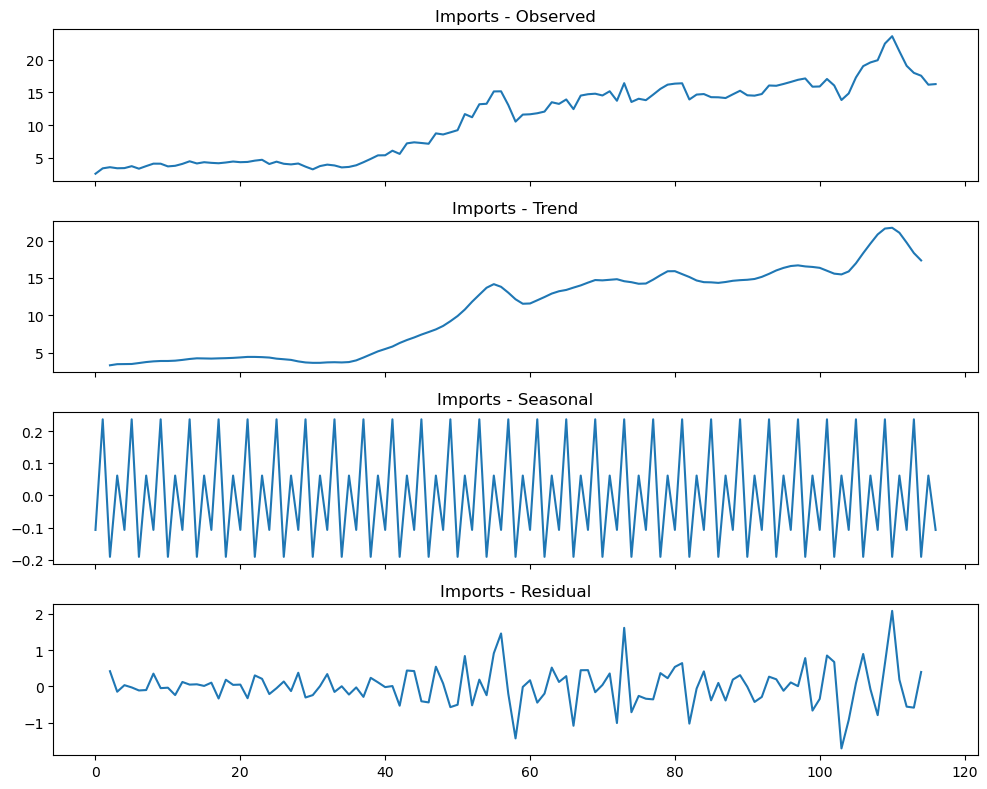

Ljung-Box Test Results for Imports:
       lb_stat     lb_pvalue
4   26.190541  2.896475e-05
8   57.860144  1.223167e-09
12  65.640778  2.074990e-09


In [32]:
# Perform Seasonal Decomposition for Imports
result_imports = seasonal_decompose(df["Imports"], model="additive", period=4)

# Plot Seasonal Decomposition for Imports
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)
result_imports.observed.plot(ax=axes[0], title="Imports - Observed", legend=False)
result_imports.trend.plot(ax=axes[1], title="Imports - Trend", legend=False)
result_imports.seasonal.plot(ax=axes[2], title="Imports - Seasonal", legend=False)
result_imports.resid.plot(ax=axes[3], title="Imports - Residual", legend=False)
plt.tight_layout()
plt.show()

# Perform Ljung-Box Test for Imports
ljung_box_imports = acorr_ljungbox(result_imports.resid.dropna(), lags=[4, 8, 12], return_df=True)
print("Ljung-Box Test Results for Imports:\n", ljung_box_imports)


The **Augmented Dickey-Fuller (ADF) test** results for **Imports** indicate that the original time series is **non-stationary**, with an **ADF Statistic of -0.2950** and a **p-value of 0.9262**, which is significantly higher than the **0.05 threshold**. This means that the null hypothesis, which states that the series has a unit root (i.e., is non-stationary), **cannot be rejected**. As a result, the Imports time series exhibits trends or patterns over time, making it unsuitable for direct time series forecasting.

After applying **first-order differencing**, the ADF test shows a substantial improvement in stationarity, with an **ADF Statistic of -4.4497** and a **p-value of 0.0002**, which is well below **0.05**. This confirms that the differenced series is **stationary**, meaning that its statistical properties, such as mean and variance, remain constant over time.

ADF Test for Imports:
ADF Statistic: -0.2950
p-value: 0.9262
Critical Values: {'1%': -3.4924012594942333, '5%': -2.8886968193364835, '10%': -2.5812552709190673}
--> Imports is **non-stationary** (p > 0.05)

ADF Test for Imports (After Differencing):
ADF Statistic: -4.4497
p-value: 0.0002
Critical Values: {'1%': -3.4924012594942333, '5%': -2.8886968193364835, '10%': -2.5812552709190673}
--> Imports is **stationary** after differencing


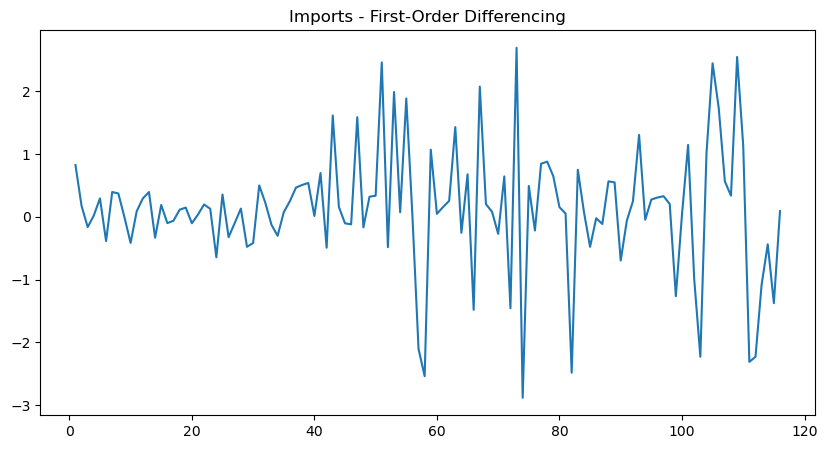

In [34]:
# Perform ADF Test for Imports
adf_test = adfuller(df["Imports"].dropna())

print("ADF Test for Imports:")
print(f"ADF Statistic: {adf_test[0]:.4f}")
print(f"p-value: {adf_test[1]:.4f}")
print("Critical Values:", adf_test[4])
if adf_test[1] > 0.05:
    print("--> Imports is **non-stationary** (p > 0.05)")
else:
    print("--> Imports is **stationary** (p <= 0.05)")

# Apply first-order differencing
df["Imports_diff"] = df["Imports"].diff()

# Perform ADF Test after Differencing
adf_test_diff = adfuller(df["Imports_diff"].dropna())

print("\nADF Test for Imports (After Differencing):")
print(f"ADF Statistic: {adf_test_diff[0]:.4f}")
print(f"p-value: {adf_test_diff[1]:.4f}")
print("Critical Values:", adf_test_diff[4])
if adf_test_diff[1] > 0.05:
    print("--> Imports is still **non-stationary** after differencing")
else:
    print("--> Imports is **stationary** after differencing")

# Plot Imports after Differencing
df["Imports_diff"].dropna().plot(title="Imports - First-Order Differencing", figsize=(10, 5))
plt.show()



#### **Suez Canal Dues**

The Suez Canal dues have demonstrated significant trends over the years, reflecting the impact of global and local economic developments and shifts in international trade dynamics. From 2001 to 2003, the canal experienced strong revenue growth, with increases of over 12% and 16% in key periods. This growth was driven by a global trade recovery following the Asian financial crisis of the late 1990s. Rising demand for goods and a rebound in international shipping activity led to increased traffic through the canal, boosting revenues.

The 2008 global financial crisis marked a critical period for the Suez Canal. In late 2008, revenues surged by 14% as global trade volumes peaked just before the economic downturn. However, the collapse in global trade that followed led to a sharp decline in canal revenues, with drops of over 13% in early 2009 and nearly 24% in mid-2009. This contraction reflected the drastic slowdown in shipping activity during the crisis.

Following Egypt’s political upheaval in 2013, the canal faced disruptions that affected its revenue streams. Instability led to a significant decline in dues, with revenues dropping by over 14% in mid-2013. Additional fluctuations occurred during 2015, when Egypt undertook a major expansion project for the canal. The construction phase temporarily impacted operations, contributing to an 11% revenue decline. These events underscored the canal’s sensitivity to domestic political developments and infrastructural changes.

By 2018, the canal began to recover, supported by a rebound in global trade. Revenues steadily increased during this period, with notable growth of over 12% and 11% in key quarters. In 2022 and 2023, the canal reached record revenue levels despite global challenges such as the COVID-19 pandemic’s aftermath, the Russia-Ukraine war, and ongoing geopolitical tensions. Revenues grew by over 12% in late 2022 and nearly 14% in 2023, reflecting higher shipping volumes, increased toll rates, and strategic investments in canal infrastructure. These trends highlight the Suez Canal’s pivotal role in global trade and its responsiveness to both external economic cycles and local develnts.

---

#### **Travel Receipts**

Travel receipts, a crucial component of Egypt’s foreign currency inflows, have shown significant fluctuations over the years, shaped by global economic conditions, geopolitical events, and domestic policy changes. These shifts illustrate the sensitivity of Egypt's tourism sector to external shocks and internal reforms.

In the mid-1990s, travel receipts exhibited substantial volatility. A sharp decline of over 45% in early 1995 was followed by a strong recovery in late 1995 and 1996, with increases of 24% and 69%, respectively. This period coincided with fluctuations in global travel demand and Egypt’s promotional efforts to bolster its tourism industry. However, the 1997 terrorist attack in Luxor had a pronounced impact, significantly reducing tourism revenues as international arrivals declined sharply due to security concerns.

The early 2000s brought additional instability. The 9/11 attacks in the United States in 2001 caused a global downturn in travel, which affected Egypt’s tourism sector as global demand contracted. By the mid-2000s, travel receipts began recovering, supported by a global economic rebound and rising international tourism.

The 2011 Arab Spring and the subsequent political unrest severely impacted travel receipts. Revenues plummeted as tourist arrivals declined due to safety concerns and domestic instability. While the sector saw some recovery in the following years, it remained subdued due to ongoing challenges, including terrorist incidents and continued political uncertainty.

A significant turning point came in 2016 when Egypt launched an ambitious economic reform program, including the liberalization of the exchange rate. The devaluation of the Egyptian pound made the country a more attractive and affordable destination for international travelers, leading to a surge in tourism revenues. By 2017 and 2018, travel receipts experienced a strong recovery, reflecting renewed confidence in the sector and Egypt's enhanced competitiveness in the global tourism market.

The COVID-19 pandemic in 2020 caused another major disruption. Global travel restrictions and the near-complete halt in international tourism led to a sharp drop in travel receipts. However, the sector began to recover in 2022 and 2023, buoyed by the reopening of economies worldwide and rising travel demand. Travel receipts surged by nearly 60% in early 2023, highlighting Egypt's success in capitalizing on its appeal as a key tourist destination.

These trends underscore the dual influence of global factors, such as economic cycles, pandemics, and geopolitical tensions, and local factors, including political stability and economic reforms, on Egypt’s tourism sector. The 2016 exchange rate liberalization stands out as a pivotal moment that reinvigorated the industry, enabling it to contribute more robustly to foreign currency inflows. This resilience highlights the tourism sector’s potential to support Egypt’s broader economic recovery in the face of global and local challenges.cy inflows.


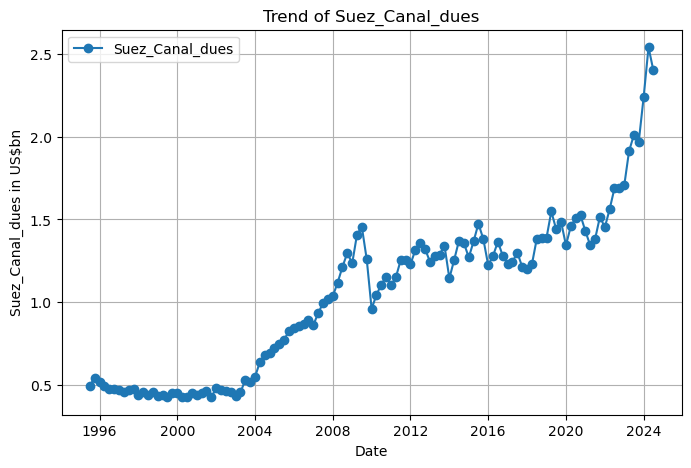

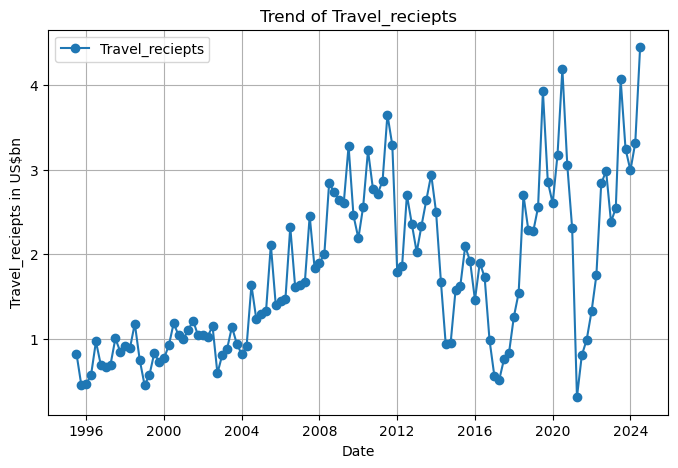

count    117.000000
mean       1.048676
std        0.481374
min        0.427700
25%        0.497800
50%        1.155200
75%        1.366400
max        2.539200
Name: Suez_Canal_dues, dtype: float64 count    117.000000
mean       1.773353
std        0.964659
min        0.305000
25%        0.935600
50%        1.623500
75%        2.553700
max        4.451000
Name: Travel_reciepts, dtype: float64


In [36]:
##ploting main component of Services account 
# List of columns to plot
columns = ['Suez_Canal_dues', 'Travel_reciepts']

# Create a plot for each column
for col in columns:
    plt.figure(figsize=(8, 5))  # Create a new figure for each chart
    plt.plot(df['Date'], df[col], marker='o', label=col)
    plt.title(f"Trend of {col}")
    plt.xlabel("Date")
    plt.ylabel(f"{col} in US$bn")
    plt.legend()
    plt.grid()
    plt.show()

print(df['Suez_Canal_dues'].describe(),df['Travel_reciepts'].describe())

The analysis of **Suez Canal dues** reveals key relationships with various economic indicators. **Suez Canal dues exhibit a very strong positive correlation** with **the logarithm of world GDP** (0.94, p-value < 0.0001), highlighting the significant impact of global economic activity on revenue generated through the canal. This underscores the **Suez Canal’s role as a critical trade route**, highly sensitive to fluctuations in global trade flows and economic health.  

Additionally, **Suez Canal dues show a strong positive correlation** with **crude oil prices** (0.77, p-value < 0.0001), indicating the influence of energy markets on canal revenues. Higher oil prices often lead to increased shipping costs, which can, in turn, contribute to higher canal dues.  

These findings emphasize the **strategic importance of the Suez Canal in global maritime trade and its strong connections to both global economic growth and energy market trends**.

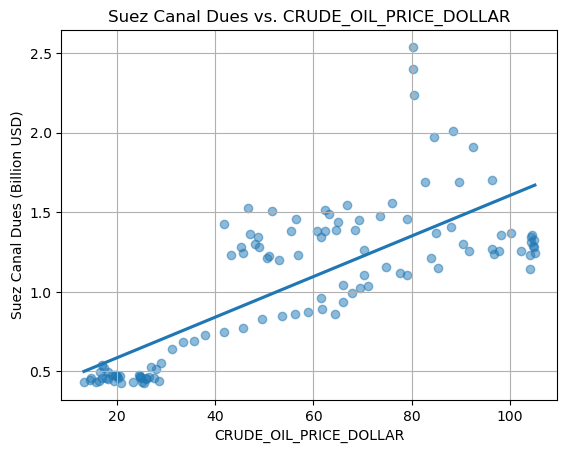

Correlation between Suez Canal Dues and CRUDE_OIL_PRICE_DOLLAR: 0.77, P-value: 0.0000


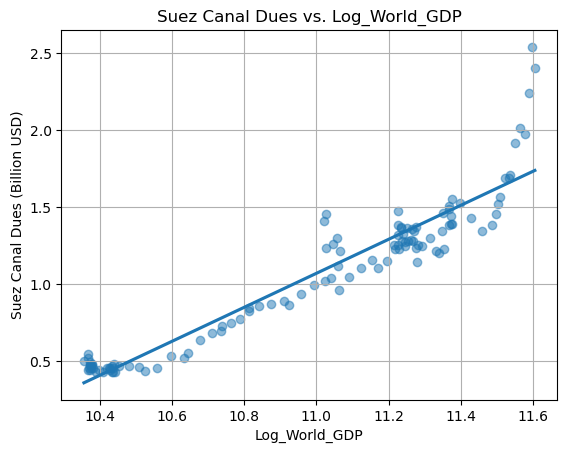

Correlation between Suez Canal Dues and Log_World_GDP: 0.94, P-value: 0.0000


In [38]:
# Scatter plots and correlation analysis for Suez Canal Dues
suez_features = ["CRUDE_OIL_PRICE_DOLLAR", "Log_World_GDP"]
for feature in suez_features:
    # Scatter plot
    sns.regplot(x=df[feature], y=df["Suez_Canal_dues"], ci=None, scatter_kws={'alpha': 0.5})
    plt.title(f"Suez Canal Dues vs. {feature}")
    plt.xlabel(feature)
    plt.ylabel("Suez Canal Dues (Billion USD)")
    plt.grid()
    plt.show()

    # Correlation coefficient
    corr, p_value = pearsonr(df[feature], df["Suez_Canal_dues"])
    print(f"Correlation between Suez Canal Dues and {feature}: {corr:.2f}, P-value: {p_value:.4f}")


The **Ljung-Box test** results for **Suez Canal Traffic** suggest the presence of significant autocorrelation in the residuals across multiple lags. 

At **lag 4**, the test statistic is **26.89**, with a **p-value of 0.000021**, which is well below the conventional significance level of **0.05**. This indicates strong evidence against the null hypothesis, suggesting that the residuals are **not white noise** and exhibit a clear pattern. Similarly, at **lag 8**, the test statistic remains high at **29.71**, with a **p-value of 0.000238**, further confirming the presence of autocorrelation in the data. At **lag 12**, the test statistic increases to **32.82**, with a **p-value of 0.001034**, still below the **0.05** threshold, indicating that autocorrelation persists even at longer lags.

Since all p-values are significantly lower than **0.05**, we **reject the null hypothesis** at all tested lags. This means that the residuals of **Suez Canal Traffic** contain strong dependencies, making it **non-random and predictable**. 

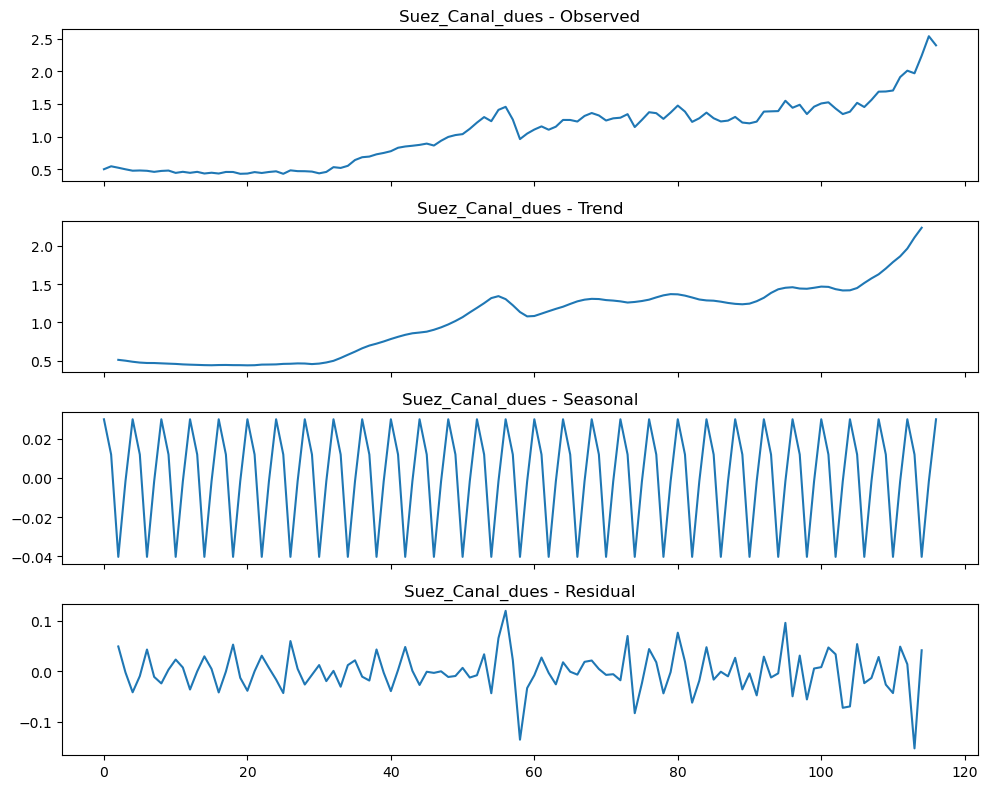

Ljung-Box Test Results for Suez Canal Traffic:
       lb_stat  lb_pvalue
4   26.891246   0.000021
8   29.707182   0.000238
12  32.816261   0.001034


In [40]:
# Perform Seasonal Decomposition for Suez Canal Traffic
result_suez = seasonal_decompose(df["Suez_Canal_dues"], model="additive", period=4)

# Plot Seasonal Decomposition for Suez Canal Traffic
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)
result_suez.observed.plot(ax=axes[0], title="Suez_Canal_dues - Observed", legend=False)
result_suez.trend.plot(ax=axes[1], title="Suez_Canal_dues - Trend", legend=False)
result_suez.seasonal.plot(ax=axes[2], title="Suez_Canal_dues - Seasonal", legend=False)
result_suez.resid.plot(ax=axes[3], title="Suez_Canal_dues - Residual", legend=False)
plt.tight_layout()
plt.show()

# Perform Ljung-Box Test for Suez Canal Traffic
ljung_box_suez = acorr_ljungbox(result_suez.resid.dropna(), lags=[4, 8, 12], return_df=True)
print("Ljung-Box Test Results for Suez Canal Traffic:\n", ljung_box_suez)


The **Augmented Dickey-Fuller (ADF) test** results for **Suez Canal Dues** indicate that the original time series is **non-stationary**, with an **ADF Statistic of 0.8380** and a **p-value of 0.9922**, which is far above the **0.05 threshold**. This means that the null hypothesis, which states that the series has a unit root (i.e., is non-stationary), **cannot be rejected**. As a result, Suez Canal Dues exhibit trends or patterns over time, making it unsuitable for direct time series modeling.

After applying **first-order differencing**, the ADF test reveals a significant improvement in stationarity, with an **ADF Statistic of -3.7115** and a **p-value of 0.0040**, which is well below **0.05**. This confirms that the differenced series is **stationary**, meaning that its statistical properties, such as mean and variance, remain constant over time.

ADF Test for Suez Canal Dues:
ADF Statistic: 0.8380
p-value: 0.9922
Critical Values: {'1%': -3.490683082754047, '5%': -2.8879516565798817, '10%': -2.5808574442009578}
--> Suez Canal Dues is **non-stationary** (p > 0.05)

ADF Test for Suez Canal Dues (After Differencing):
ADF Statistic: -3.7115
p-value: 0.0040
Critical Values: {'1%': -3.490683082754047, '5%': -2.8879516565798817, '10%': -2.5808574442009578}
--> Suez Canal Dues is **stationary** after differencing


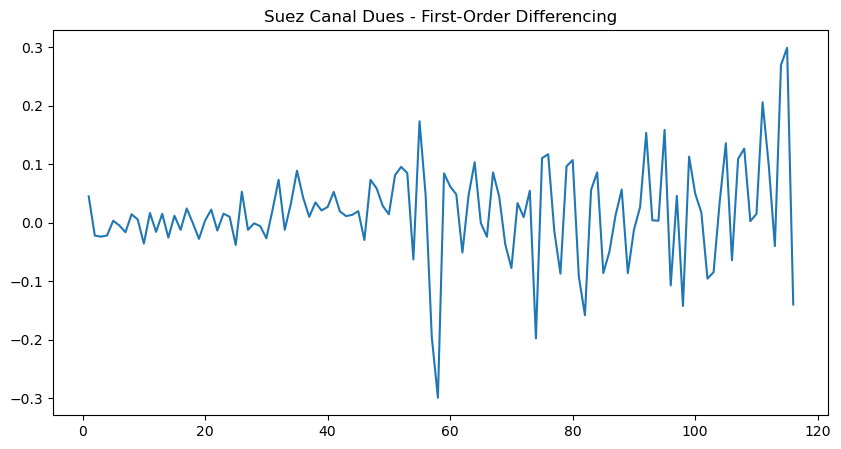

In [42]:
# Perform ADF Test for Suez Canal Dues
adf_test = adfuller(df["Suez_Canal_dues"].dropna())

print("ADF Test for Suez Canal Dues:")
print(f"ADF Statistic: {adf_test[0]:.4f}")
print(f"p-value: {adf_test[1]:.4f}")
print("Critical Values:", adf_test[4])
if adf_test[1] > 0.05:
    print("--> Suez Canal Dues is **non-stationary** (p > 0.05)")
else:
    print("--> Suez Canal Dues is **stationary** (p <= 0.05)")

# Apply first-order differencing
df["Suez_Canal_dues_diff"] = df["Suez_Canal_dues"].diff()

# Perform ADF Test after Differencing
adf_test_diff = adfuller(df["Suez_Canal_dues_diff"].dropna())

print("\nADF Test for Suez Canal Dues (After Differencing):")
print(f"ADF Statistic: {adf_test_diff[0]:.4f}")
print(f"p-value: {adf_test_diff[1]:.4f}")
print("Critical Values:", adf_test_diff[4])
if adf_test_diff[1] > 0.05:
    print("--> Suez Canal Dues is still **non-stationary** after differencing")
else:
    print("--> Suez Canal Dues is **stationary** after differencing")

# Plot Suez Canal Dues after Differencing
df["Suez_Canal_dues_diff"].dropna().plot(title="Suez Canal Dues - First-Order Differencing", figsize=(10, 5))
plt.show()


The analysis of **Egypt’s travel receipts** reveals key relationships with various economic indicators. **Travel receipts exhibit a moderate positive correlation** with **global GDP** (0.65, p-value < 0.0001), emphasizing the dependence of Egypt's tourism revenues on overall global economic activity. This suggests that stronger global economic performance is associated with increased travel and tourism inflows to Egypt.  

A **moderate positive correlation** is also observed between **travel receipts and the exchange rate of the Egyptian pound to the US dollar** (0.45, p-value < 0.0001). This indicates that currency fluctuations influence tourism revenue, potentially affecting Egypt’s price competitiveness as a travel destination.  

These findings underscore the **significant role of global economic conditions and domestic financial factors in shaping the performance of Egypt’s travel and tourism sector**.


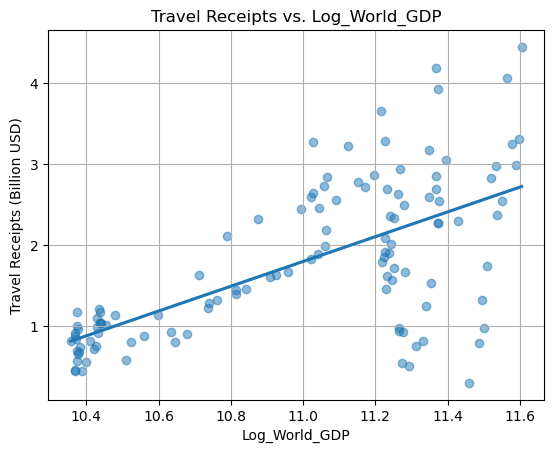

Correlation between Travel Receipts and Log_World_GDP: 0.65, P-value: 0.0000


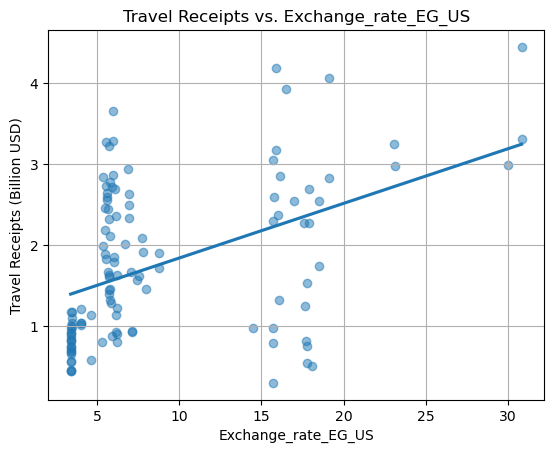

Correlation between Travel Receipts and Exchange_rate_EG_US: 0.45, P-value: 0.0000


In [44]:
# Scatter plots and correlation analysis for Travel Receipts
travel_features = ["Log_World_GDP", "Exchange_rate_EG_US"]
for feature in travel_features:
    # Scatter plot
    sns.regplot(x=df[feature], y=df["Travel_reciepts"], ci=None, scatter_kws={'alpha': 0.5})
    plt.title(f"Travel Receipts vs. {feature}")
    plt.xlabel(feature)
    plt.ylabel("Travel Receipts (Billion USD)")
    plt.grid()
    plt.show()

    # Correlation coefficient
    corr, p_value = pearsonr(df[feature], df["Travel_reciepts"])
    print(f"Correlation between Travel Receipts and {feature}: {corr:.2f}, P-value: {p_value:.4f}")


The **Ljung-Box test** results for **Travel Receipts** indicate significant **autocorrelation** in the residuals, meaning that past values of the time series influence future values rather than being random white noise.

At **lag 4**, the Ljung-Box test statistic is **25.45**, with a **p-value of 0.000041**, which is well below the standard significance threshold of **0.05**. This strong rejection of the null hypothesis suggests that the residuals exhibit a significant pattern rather than randomness. 

At **lag 8**, the test statistic remains high at **29.98**, with a **p-value of 0.000213**, reinforcing the presence of **persistent autocorrelation**. Similarly, at **lag 12**, the test statistic further increases to **40.89**, with a **p-value of 0.000051**, confirming that autocorrelation remains strong even at longer time lags.

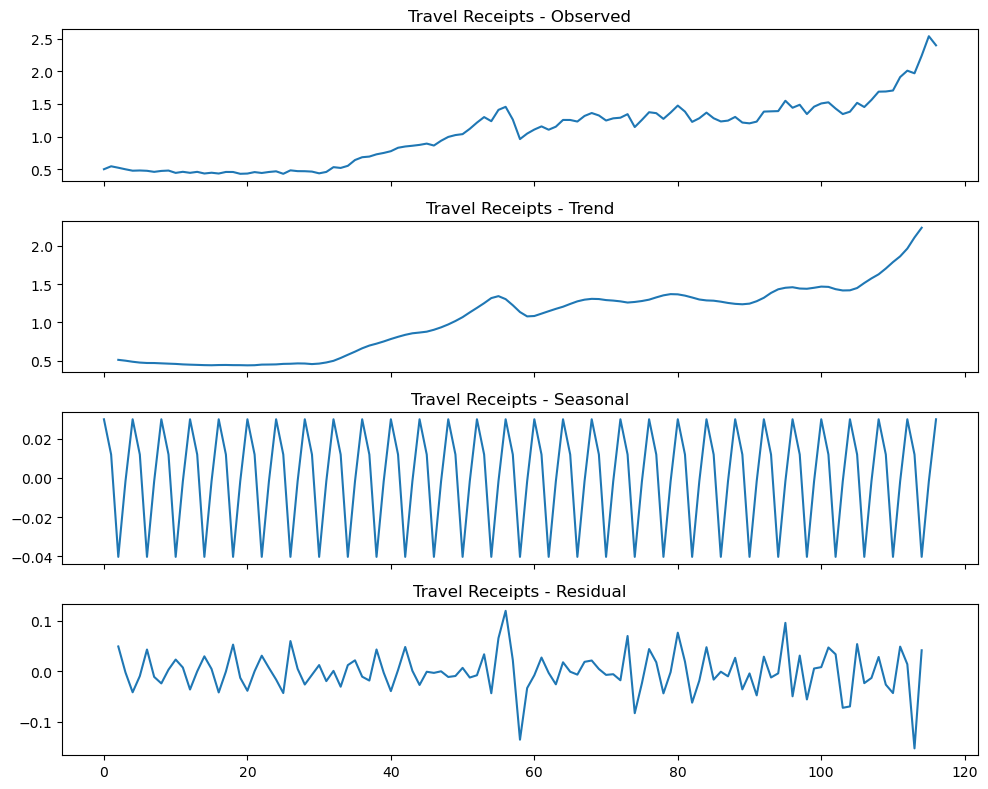

Ljung-Box Test Results for Travel reciepts:
       lb_stat  lb_pvalue
4   25.451675   0.000041
8   29.982674   0.000213
12  40.889523   0.000051


In [46]:
# Perform Seasonal Decomposition for Travel
result_Travel = seasonal_decompose(df["Travel_reciepts"], model="additive", period=4)

# Plot Seasonal Decomposition for Suez Canal Traffic
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)
result_suez.observed.plot(ax=axes[0], title="Travel Receipts - Observed", legend=False)
result_suez.trend.plot(ax=axes[1], title="Travel Receipts - Trend", legend=False)
result_suez.seasonal.plot(ax=axes[2], title="Travel Receipts - Seasonal", legend=False)
result_suez.resid.plot(ax=axes[3], title="Travel Receipts - Residual", legend=False)
plt.tight_layout()
plt.show()

# Perform Ljung-Box Test for Travel Receipts
ljung_box_suez = acorr_ljungbox(result_Travel.resid.dropna(), lags=[4, 8, 12], return_df=True)
print("Ljung-Box Test Results for Travel reciepts:\n", ljung_box_suez)


The **Augmented Dickey-Fuller (ADF) test** results for **Travel Receipts** indicate that the original time series is **non-stationary**, with an **ADF Statistic of -1.5602** and a **p-value of 0.5036**, which is significantly higher than the **0.05 threshold**. This means that the null hypothesis, which states that the series has a unit root (i.e., is non-stationary), **cannot be rejected**. As a result, Travel Receipts exhibit trends or patterns over time that must be addressed before applying time series forecasting models.

After applying **first-order differencing**, the ADF test shows a significant improvement in stationarity, with an **ADF Statistic of -5.1074** and a **p-value of 0.0000**, which is well below **0.05**. This confirms that the differenced series is **stationary**, meaning that its statistical properties (such as mean and variance) remain constant over time.

ADF Test for Travel reciepts:
ADF Statistic: -1.5602
p-value: 0.5036
Critical Values: {'1%': -3.4924012594942333, '5%': -2.8886968193364835, '10%': -2.5812552709190673}
--> Travel reciepts is **non-stationary** (p > 0.05)

ADF Test for Travel reciepts (After Differencing):
ADF Statistic: -5.1074
p-value: 0.0000
Critical Values: {'1%': -3.4961490537199116, '5%': -2.8903209639580556, '10%': -2.5821223452518263}
--> Travel reciepts is **stationary** after differencing


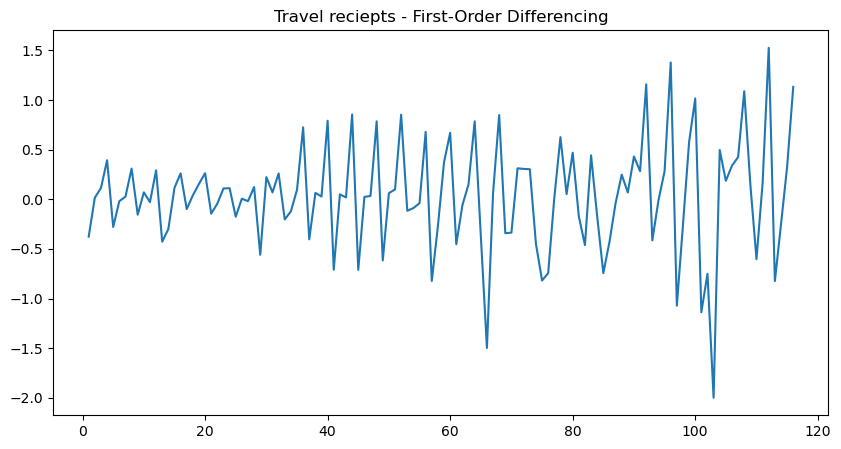

In [48]:
# Perform ADF Test for Travel reciepts
adf_test = adfuller(df["Travel_reciepts"].dropna())

print("ADF Test for Travel reciepts:")
print(f"ADF Statistic: {adf_test[0]:.4f}")
print(f"p-value: {adf_test[1]:.4f}")
print("Critical Values:", adf_test[4])
if adf_test[1] > 0.05:
    print("--> Travel reciepts is **non-stationary** (p > 0.05)")
else:
    print("--> Travel reciepts is **stationary** (p <= 0.05)")

# Apply first-order differencing
df["Travel_reciepts_diff"] = df["Travel_reciepts"].diff()

# Perform ADF Test after Differencing
adf_test_diff = adfuller(df["Travel_reciepts_diff"].dropna())

print("\nADF Test for Travel reciepts (After Differencing):")
print(f"ADF Statistic: {adf_test_diff[0]:.4f}")
print(f"p-value: {adf_test_diff[1]:.4f}")
print("Critical Values:", adf_test_diff[4])
if adf_test_diff[1] > 0.05:
    print("--> Travel reciepts is still **non-stationary** after differencing")
else:
    print("--> Travel reciepts is **stationary** after differencing")

# Plot Suez Canal Dues after Differencing
df["Travel_reciepts_diff"].dropna().plot(title="Travel reciepts - First-Order Differencing", figsize=(10, 5))
plt.show()


### Worker remittances

Worker remittances have been a crucial source of foreign currency inflows for Egypt, consistently supporting the country's current account and stabilizing its balance of payments. Over the years, trends in remittance flows have been shaped by external economic conditions, particularly in Gulf Cooperation Council (GCC) countries, as well as domestic policy decisions, such as the 2016 economic reform program and exchange rate liberalization.

In the late 1990s and early 2000s, worker remittances grew steadily, fueled by Egypt's strong labor migration ties with GCC countries. The economic boom in these oil-exporting nations, driven by rising global oil prices, created ample job opportunities for Egyptian workers in sectors such as construction and services. However, the 2008 global financial crisis marked a critical turning point. As oil prices plummeted and the economies of Gulf states slowed, remittance flows to Egypt experienced a temporary decline, reflecting reduced demand for expatriate labor in the GCC region.

The Arab Spring in 2011 and subsequent political instability in Egypt introduced further uncertainty. Despite the challenges, remittance flows remained relatively stable during this period, as they were largely driven by the incomes of Egyptian workers abroad. However, the decline in other current account components, such as tourism receipts and exports, heightened the importance of remittances as a critical source of foreign currency. These inflows played a stabilizing role during a period of economic turbulence at home.

The economic reform program initiated in 2016, including the liberalization of the exchange rate, had a transformative impact on worker remittances. The devaluation of the Egyptian pound significantly increased the local currency value of remittances sent in foreign currencies, encouraging Egyptian expatriates to send more money home. This led to a sharp rise in remittance inflows, which provided critical support for Egyptian households and boosted foreign currency reserves. The reforms also enhanced confidence in Egypt's economic outlook, reinforcing remittances as a stable and dependable inflow during a period of economic adjustment.

The COVID-19 pandemic in 2020 introduced new challenges, as the global economic slowdown affected employment opportunities for Egyptian workers abroad, particularly in GCC countries. This led to a temporary decline in remittances. However, as the global economy began to recover in 2021 and 2022, remittance inflows rebounded strongly, driven by improved economic conditions in the Gulf and sustained labor demand in key sectors.

Worker remittances have consistently demonstrated resilience to external and domestic shocks, serving as a stabilizing force for Egypt's economy. The 2016 economic reforms, especially the exchange rate liberalization, underscored the critical role of policy measures in shaping remittance dynamics. While global economic conditions, particularly in GCC countries, remain the primary driver of remittance flows, domestic factors such as inflation and the value of the Egyptian pound significantly influence their real value and volume. These inflows continue to play an essential role in supporting Egypt’s current account and overall economic stability.

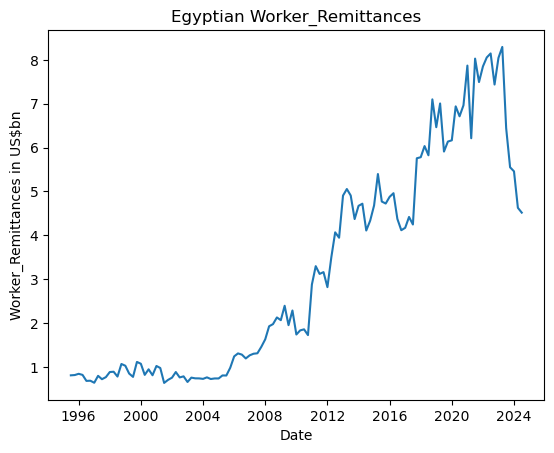

count    117.000000
mean       3.157924
std        2.453030
min        0.633900
25%        0.841700
50%        2.064800
75%        4.906700
max        8.294700
Name: Worker_Remittances, dtype: float64


In [50]:
#Plot worker remitences
plt.plot(df['Date'], df['Worker_Remittances'].values)
plt.ylabel('Worker_Remittances in US$bn')
plt.xlabel('Date')
plt.title('Egyptian Worker_Remittances')
plt.show()
print(df['Worker_Remittances'].describe())

The analysis of **worker remittances** reveals key relationships with various economic indicators. **Worker remittances exhibit a strong positive correlation** with **the logarithm of GCC GDP** (0.89, p-value < 0.0001), emphasizing the crucial role of economic activity in the Gulf Cooperation Council (GCC) countries in shaping remittance inflows to Egypt. As the GCC economies grow, employment opportunities and wages for Egyptian expatriates in these countries tend to increase, leading to higher remittances.  

A **substantial positive correlation** is also observed between **worker remittances and the exchange rate of the Egyptian pound to the US dollar** (0.79, p-value < 0.0001). This suggests that currency fluctuations significantly impact remittance flows, potentially incentivizing expatriates to send more money home when the Egyptian pound depreciates.  

Additionally, **worker remittances show a moderate positive correlation** with **crude oil prices** (0.56, p-value < 0.0001). Given that many GCC economies are heavily dependent on oil revenues, higher crude oil prices may enhance economic stability and labor demand in these countries, indirectly benefiting Egyptian workers abroad.  

A **weaker but still positive correlation** is observed between **worker remittances and Egypt’s inflation rate** (0.48, p-value < 0.0001). This suggests that as inflation rises, expatriates may increase remittances to help their families cope with the higher cost of living in Egypt.  

These findings underscore the **strong dependence of Egypt’s worker remittances on GCC economic conditions, exchange rate movements, oil price fluctuations, and domestic inflation trends**, highlighting the interconnected nature of remittance flows with both regional and global economic dynamics.

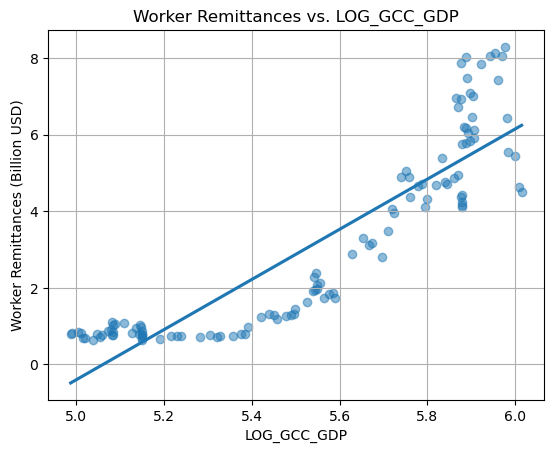

Correlation between Worker Remittances and LOG_GCC_GDP: 0.89, P-value: 0.0000


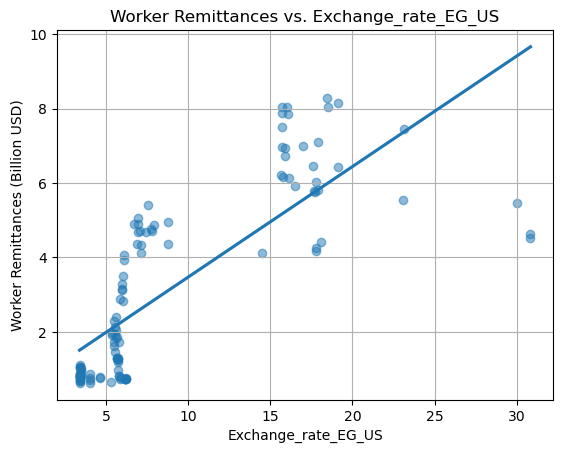

Correlation between Worker Remittances and Exchange_rate_EG_US: 0.79, P-value: 0.0000


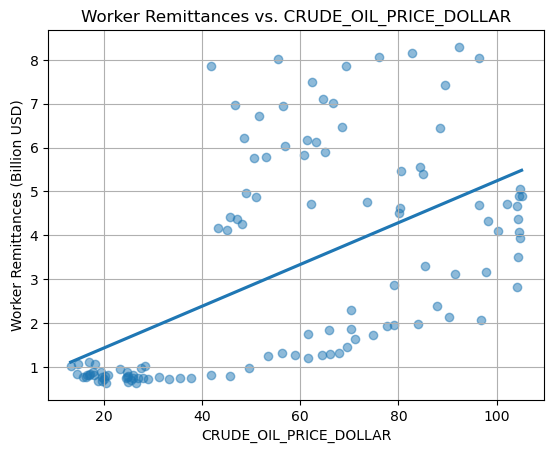

Correlation between Worker Remittances and CRUDE_OIL_PRICE_DOLLAR: 0.56, P-value: 0.0000


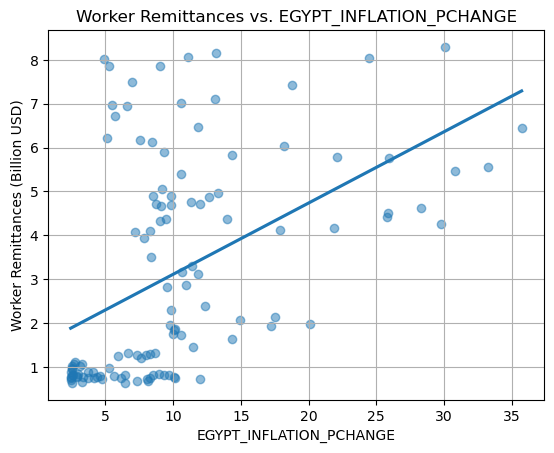

Correlation between Worker Remittances and EGYPT_INFLATION_PCHANGE: 0.48, P-value: 0.0000


In [52]:
# Scatter plots and correlation analysis for Worker Remittances
remittance_features = ["LOG_GCC_GDP", "Exchange_rate_EG_US",'CRUDE_OIL_PRICE_DOLLAR','EGYPT_INFLATION_PCHANGE' ]
for feature in remittance_features:
    # Scatter plot
    sns.regplot(x=df[feature], y=df["Worker_Remittances"], ci=None, scatter_kws={'alpha': 0.5})
    plt.title(f"Worker Remittances vs. {feature}")
    plt.xlabel(feature)
    plt.ylabel("Worker Remittances (Billion USD)")
    plt.grid()
    plt.show()

    # Correlation coefficient
    corr, p_value = pearsonr(df[feature], df["Worker_Remittances"])
    print(f"Correlation between Worker Remittances and {feature}: {corr:.2f}, P-value: {p_value:.4f}")


The **Ljung-Box test** results for **Worker Remittances** indicate significant **autocorrelation** in the residuals, suggesting that past values strongly influence future values rather than being random white noise.

At **lag 4**, the Ljung-Box statistic is **20.70**, with a **p-value of 0.000363**, which is significantly below the **0.05 significance level**. This means that we **reject the null hypothesis** and conclude that the residuals are **not white noise**—there is a strong pattern present. 

At **lag 8**, the Ljung-Box test statistic rises to **29.19**, with a **p-value of 0.000293**, reinforcing the presence of autocorrelation over longer time lags. Similarly, at **lag 12**, the test statistic increases to **35.03**, with a **p-value of 0.000464**, confirming that autocorrelation persists in the Worker Remittances time series.


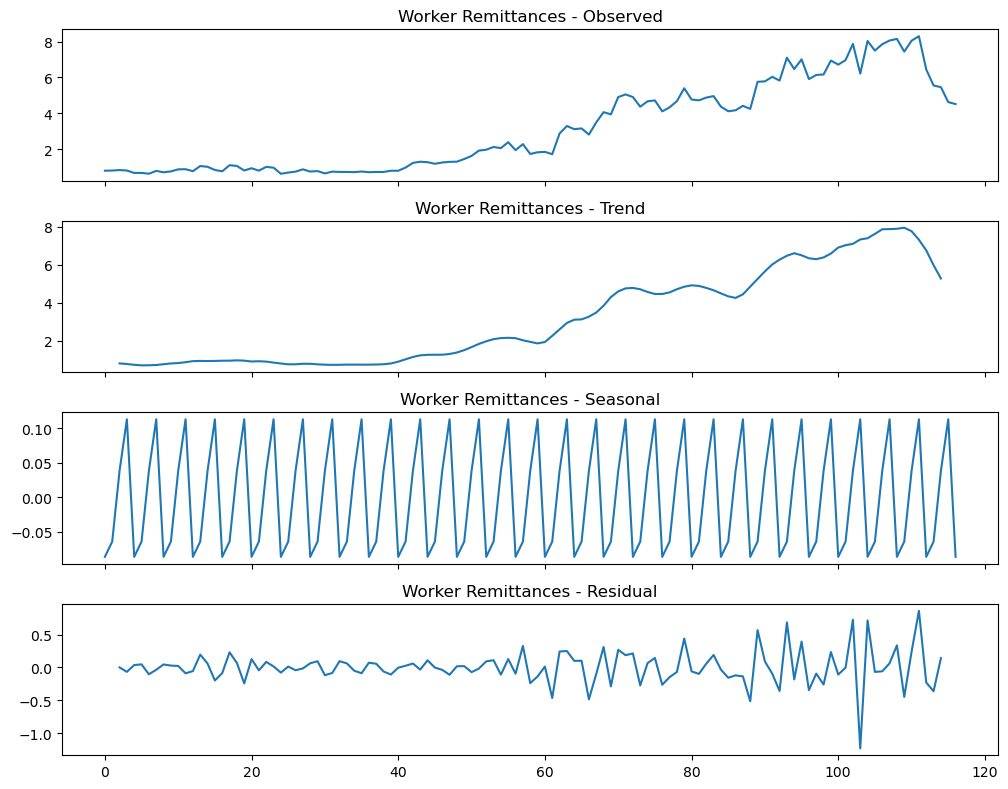

Ljung-Box Test Results for Worker Remittances:
       lb_stat  lb_pvalue
4   20.698879   0.000363
8   29.191934   0.000293
12  35.027400   0.000464


In [54]:
# Perform Seasonal Decomposition for Worker Remittances
result_remittances = seasonal_decompose(df["Worker_Remittances"], model="additive", period=4)

# Plot Seasonal Decomposition for Worker Remittances
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)
result_remittances.observed.plot(ax=axes[0], title="Worker Remittances - Observed", legend=False)
result_remittances.trend.plot(ax=axes[1], title="Worker Remittances - Trend", legend=False)
result_remittances.seasonal.plot(ax=axes[2], title="Worker Remittances - Seasonal", legend=False)
result_remittances.resid.plot(ax=axes[3], title="Worker Remittances - Residual", legend=False)
plt.tight_layout()
plt.show()

# Perform Ljung-Box Test for Worker Remittances
ljung_box_remittances = acorr_ljungbox(result_remittances.resid.dropna(), lags=[4, 8, 12], return_df=True)
print("Ljung-Box Test Results for Worker Remittances:\n", ljung_box_remittances)


The **Augmented Dickey-Fuller (ADF) test** results for **Worker Remittances** indicate that the original time series is **non-stationary**, as evidenced by an **ADF Statistic of -0.9871** and a **p-value of 0.7579**, which is significantly higher than the **0.05 threshold**. This means that the null hypothesis, which states that the series has a unit root (i.e., is non-stationary), **cannot be rejected**. Consequently, Worker Remittances exhibit trends or patterns over time that must be addressed before applying time series forecasting models. 

However, after applying **first-order differencing**, the ADF test shows a dramatic shift in stationarity, with an **ADF Statistic of -14.1787** and a **p-value of 0.0000**, which is well below **0.05**. This confirms that the differenced series is **stationary**, meaning that its statistical properties (such as mean and variance) remain constant over time.

ADF Test for Worker Remittances:
ADF Statistic: -0.9871
p-value: 0.7579
Critical Values: {'1%': -3.4885349695076844, '5%': -2.887019521656941, '10%': -2.5803597920604915}
--> Worker Remittances is **non-stationary** (p > 0.05)

ADF Test for Worker Remittances (After Differencing):
ADF Statistic: -14.1787
p-value: 0.0000
Critical Values: {'1%': -3.4885349695076844, '5%': -2.887019521656941, '10%': -2.5803597920604915}
--> Worker Remittances is **stationary** after differencing


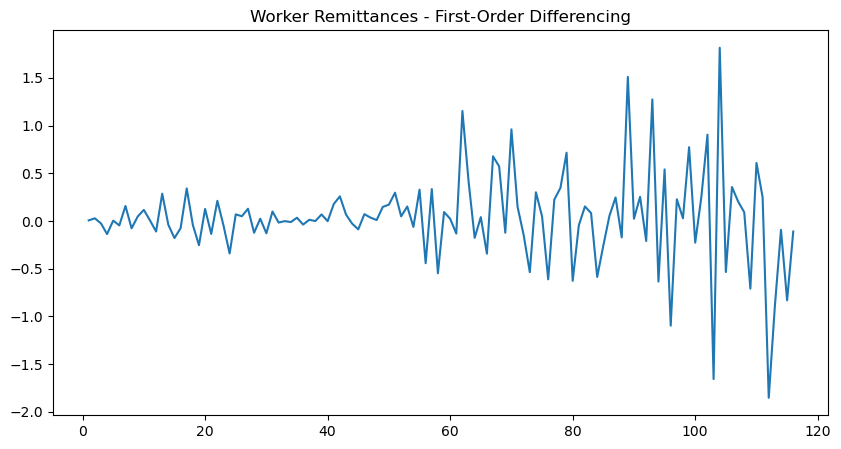

In [56]:
# Perform ADF Test for Worker Remittances
adf_test = adfuller(df["Worker_Remittances"].dropna())

print("ADF Test for Worker Remittances:")
print(f"ADF Statistic: {adf_test[0]:.4f}")
print(f"p-value: {adf_test[1]:.4f}")
print("Critical Values:", adf_test[4])
if adf_test[1] > 0.05:
    print("--> Worker Remittances is **non-stationary** (p > 0.05)")
else:
    print("--> Worker Remittances is **stationary** (p <= 0.05)")

# Apply first-order differencing
df["Worker_Remittances_diff"] = df["Worker_Remittances"].diff()

# Perform ADF Test after Differencing
adf_test_diff = adfuller(df["Worker_Remittances_diff"].dropna())

print("\nADF Test for Worker Remittances (After Differencing):")
print(f"ADF Statistic: {adf_test_diff[0]:.4f}")
print(f"p-value: {adf_test_diff[1]:.4f}")
print("Critical Values:", adf_test_diff[4])
if adf_test_diff[1] > 0.05:
    print("--> Worker Remittances is still **non-stationary** after differencing")
else:
    print("--> Worker Remittances is **stationary** after differencing")

# Plot Worker Remittances after Differencing
df["Worker_Remittances_diff"].dropna().plot(title="Worker Remittances - First-Order Differencing", figsize=(10, 5))
plt.show()


### Conclusion

The analysis of Egypt's external accounts reveals a dynamic interplay of global and domestic economic factors influencing key components of the current account. This chapter highlights the multifaceted nature of these relationships and the critical dependencies driving Egypt’s economic interactions with the rest of the world.

#### Trade Balance Dynamics:
The trade balance exhibits strong ties to global and regional economic conditions. Exports are highly correlated with global economic indicators such as world GDP and energy prices, particularly crude oil, underscoring the importance of external demand and commodity markets in driving export performance. Meanwhile, imports are closely linked to global commodity prices and exchange rate movements, reflecting Egypt's reliance on imported goods and its sensitivity to external price dynamics. The negative correlation between imports and Egypt's GDP suggests a modest substitution effect, where domestic production may partially replace foreign goods as the economy expands.

#### Suez Canal Revenues:
The Suez Canal continues to play a pivotal role in Egypt’s current account, with revenues strongly influenced by global economic activity and energy markets. The robust correlation between Suez Canal dues and both world GDP and crude oil prices highlights the canal's strategic importance as a critical node in global trade and its vulnerability to fluctuations in international shipping and energy costs.

#### Travel Receipts:
Tourism, a key driver of Egypt's service exports, is significantly influenced by global economic health, as evidenced by the positive correlation between travel receipts and world GDP. The sector also shows sensitivity to domestic factors, including exchange rate movements and inflation, which can affect Egypt's competitiveness as a travel destination. These findings reinforce the sector's dependence on favorable global and local conditions to sustain growth.

#### Worker Remittances:
Worker remittances, a vital source of foreign currency inflows, are shaped by regional economic conditions, particularly in Gulf Cooperation Council (GCC) countries, which host a significant share of Egypt’s expatriate workers. The negative correlation with GCC GDP suggests that remittance flows may increase during periods of economic slowdown in these economies, as workers send more support back home. Furthermore, remittances are positively correlated with crude oil prices, exchange rates, and domestic inflation, reflecting their responsiveness to both external economic dynamics and domestic cost-of-living pressures.

In the upcoming chapter, these variables and relationships will be leveraged to develop predictive models capable of forecasting key components of the current account, such as trade balance, exports, imports, Suez Canal revenues, travel receipts, and worker remittances. These models will utilize the identified correlations and dependencies to provide actionable insights for policymakers, enabling better planning and management of Egypt’s external sector.

In summary, Egypt's current account reflects a complex but well-defined relationship between global forces and domestic conditions. Understanding these dynamics is crucial for informed policymaking aimed at achieving sustainable growth and external stability.

# Modeling

## Exports

### **Introduction**  

Forecasting economic indicators is a crucial aspect of economic planning and decision-making. In the case of **Egypt’s exports**, predicting future trends helps policymakers, businesses, and investors anticipate changes in trade flows, manage risks, and make informed strategic decisions. Given the **volatile nature of international trade**, exports are influenced by a combination of **domestic economic conditions, global economic trends, exchange rate fluctuations, and commodity prices**.  

This study aims to develop a **robust forecasting model** for Egypt's exports by leveraging both **traditional time series models** and **modern machine learning approaches**. Specifically, the analysis explores **SARIMAX (Seasonal AutoRegressive Integrated Moving Average with Exogenous Variables), Recurrent Neural Networks (RNN), Random Forest, XGBoost, and LightGBM**. Each model is assessed based on its ability to capture both **long-term trends and short-term fluctuations** while maintaining strong generalizability to unseen data.  

The methodology involves multiple steps, beginning with **data preprocessing and transformations**, particularly addressing **non-stationarity** in exports. Exogenous variables such as **Imports, Exchange Rate (EGP/USD), Log Euro Area GDP, and Log World GDP** are incorporated to enhance model performance. A series of **hyperparameter tuning experiments and feature engineering techniques** are applied to optimize each model. The final evaluation compares the models based on **Mean Squared Error (MSE), R² Score, and overall predictive stability** on both training and test datasets.  

By comparing the effectiveness of **statistical time series models** with **machine learning-based predictive techniques**, this study aims to identify the most reliable approach for **short-term forecasting of Egypt’s exports**. The findings contribute to the broader field of **economic forecasting**, offering insights into the best methodologies for predicting trade dynamics in emerging economies.

In [61]:
# downloading required packages 
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.api import VAR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, SimpleRNN, Dense
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import scipy.stats as stats
from statsmodels.stats.diagnostic import acorr_ljungbox, het_breuschpagan
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, r2_score

# Traditional Models 

## SARIMAX/ARIMA-x

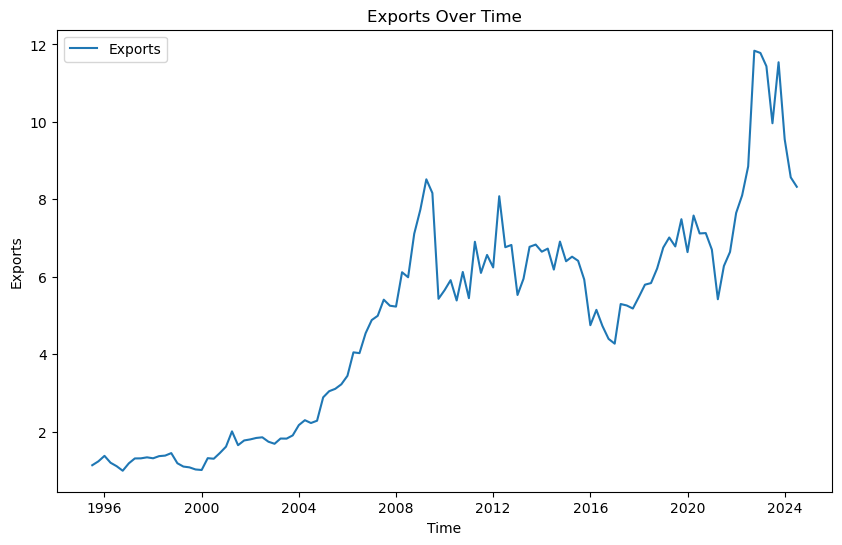

Outliers:
Empty DataFrame
Columns: [Trade_Balance, Exports, Petroleum-Exports, Other_Exports, Imports, Petroleum-Imports, Other_Imports, Suez_Canal_dues, Travel_reciepts, Transportation_Payments, Travel_Payments, Income_receipts, Income_payments, Transfers, Worker_Remittances, Official_Transfers_(net), Current_Account_Balance, EGYPT_INFLATION_PCHANGE, KUWAIT_GDP, QATAR_GDP, SAUDI_ARABIA_GDP, UAE_GDP, ADVANCED_ECONOMY_GDP, WORLD_GDP, CRUDE_OIL_PRICE_DOLLAR, CRUSE_OIL_PRICE_INDEX, EUO_AREA_GDP_growth, NATURAL_GAS_DOLLAR, NATURAL_GAS_INDEX, NON_FUEL_COMMODITY_PRICE_INDEX, TARDE_VOLUME_PCHANGE, UNITED_SATES_GDP, Exchange_rate_EG_US, EUO_AREA_GDP_bn, EGYPT_GDP_bn, Date, GCC_GDP, LOG_GCC_GDP, Log_World_GDP, Log_EGYPT_GDP_bn, Log_EUO_AREA_GDP_bn, Exports_diff, Imports_diff, Suez_Canal_dues_diff, Travel_reciepts_diff, Worker_Remittances_diff]
Index: []

[0 rows x 46 columns]


In [64]:
#checking for outliers in exports 
plt.figure(figsize=(10, 6))
plt.plot(df['Date'],df["Exports"], label="Exports")
plt.title("Exports Over Time")
plt.xlabel("Time")
plt.ylabel("Exports")
plt.legend()
plt.show()

Q1 = df["Exports"].quantile(0.25)
Q3 = df["Exports"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df["Exports"] < lower_bound) | (df["Exports"] > upper_bound)]
print("Outliers:")
print(outliers)

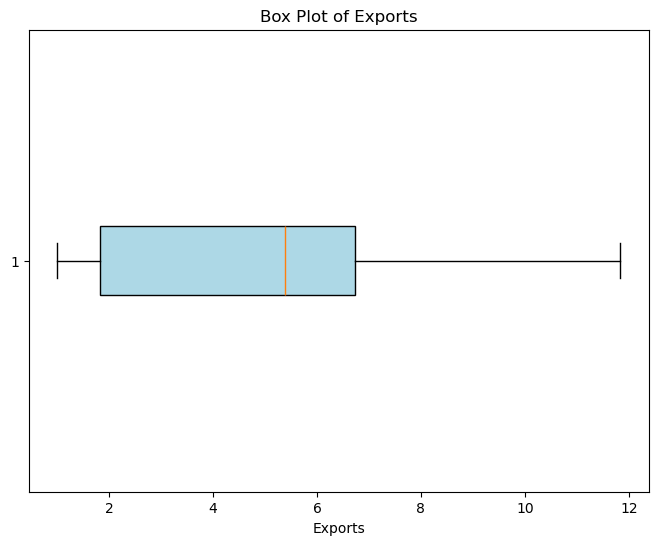

In [65]:
import matplotlib.pyplot as plt

# Draw a box plot for exports
plt.figure(figsize=(8, 6))
plt.boxplot(df["Exports"], vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title("Box Plot of Exports")
plt.xlabel("Exports")
plt.show()




The box plot for exports illustrates the distribution of the data and provides key insights into its range, quartiles, and potential outliers. The **blue box** represents the interquartile range (IQR), which contains the middle 50% of the data, with the lower and upper edges of the box corresponding to the first quartile (Q1) and third quartile (Q3), respectively. The line inside the box represents the **median**, indicating the central tendency of the data.

The **whiskers** extend to the smallest and largest values within the acceptable range, calculated as \( Q1 - 1.5 \times IQR \) for the lower bound and \( Q3 + 1.5 \times IQR \) for the upper bound. No points are observed outside the whiskers, indicating that there are no outliers in the exports data based on this box plot. 

The data appears to be symmetrically distributed, as the median is roughly centered within the IQR, and the whiskers are relatively balanced in length. This suggests that the exports data is well-behaved and does not exhibit extreme variations that could distort the model or analysis.

In conclusion, the absence of outliers and the balanced distribution suggest that the exports data is stable and suitable for modeling without the need for additional preprocessing to address extreme values.

In [67]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.linear_model import LinearRegression
#Testing the significat feautures 
# Define features and target
features = ["Exchange_rate_EG_US", "CRUDE_OIL_PRICE_DOLLAR", "Log_EUO_AREA_GDP_bn",'Imports','Log_World_GDP']
target = "Exports"

# Split data into training and testing sets
train_size = int(len(df) * 0.8)  # Use 80% of data for training
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Extract training and testing data
y_train, x_train = train[target], train[features]
y_test, x_test = test[target], test[features]

model=LinearRegression()
model.fit(x_train,y_train)

print(f"Test RMSE: {mean_squared_error(y_train,model.predict(x_train))}, Test R2: {r2_score(y_train,model.predict(x_train))}")
print(f"Test RMSE: {mean_squared_error(y_test,model.predict(x_test))}, Test R2: {r2_score(y_test,model.predict(x_test))}")

import statsmodels.api as sm

x_train_sm = sm.add_constant(x_train)  # Add intercept manually
ols_model = sm.OLS(y_train, x_train_sm).fit()

print(ols_model.summary())


Test RMSE: 0.2098110043369187, Test R2: 0.959427211386238
Test RMSE: 2.8201000604678885, Test R2: 0.19951529632309017
                            OLS Regression Results                            
Dep. Variable:                Exports   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     411.5
Date:                Thu, 06 Mar 2025   Prob (F-statistic):           6.09e-59
Time:                        15:11:00   Log-Likelihood:                -59.349
No. Observations:                  93   AIC:                             130.7
Df Residuals:                      87   BIC:                             145.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-

In [68]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.linear_model import LinearRegression
#Testing the significat feautures 
# Define features and target
features = ["CRUDE_OIL_PRICE_DOLLAR", "Log_EUO_AREA_GDP_bn",'Imports']
target = "Exports"

# Split data into training and testing sets
train_size = int(len(df) * 0.8)  # Use 80% of data for training
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Extract training and testing data
y_train, x_train = train[target], train[features]
y_test, x_test = test[target], test[features]

model=LinearRegression()
model.fit(x_train,y_train)

print(f"Test RMSE: {mean_squared_error(y_train,model.predict(x_train))}, Test R2: {r2_score(y_train,model.predict(x_train))}")
print(f"Test RMSE: {mean_squared_error(y_test,model.predict(x_test))}, Test R2: {r2_score(y_test,model.predict(x_test))}")

import statsmodels.api as sm

x_train_sm = sm.add_constant(x_train)  # Add intercept manually
ols_model = sm.OLS(y_train, x_train_sm).fit()

print(ols_model.summary())


Test RMSE: 0.21034606186885174, Test R2: 0.9593237431424825
Test RMSE: 2.581726063997632, Test R2: 0.2671776961803193
                            OLS Regression Results                            
Dep. Variable:                Exports   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     699.7
Date:                Thu, 06 Mar 2025   Prob (F-statistic):           9.71e-62
Time:                        15:11:00   Log-Likelihood:                -59.468
No. Observations:                  93   AIC:                             126.9
Df Residuals:                      89   BIC:                             137.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-

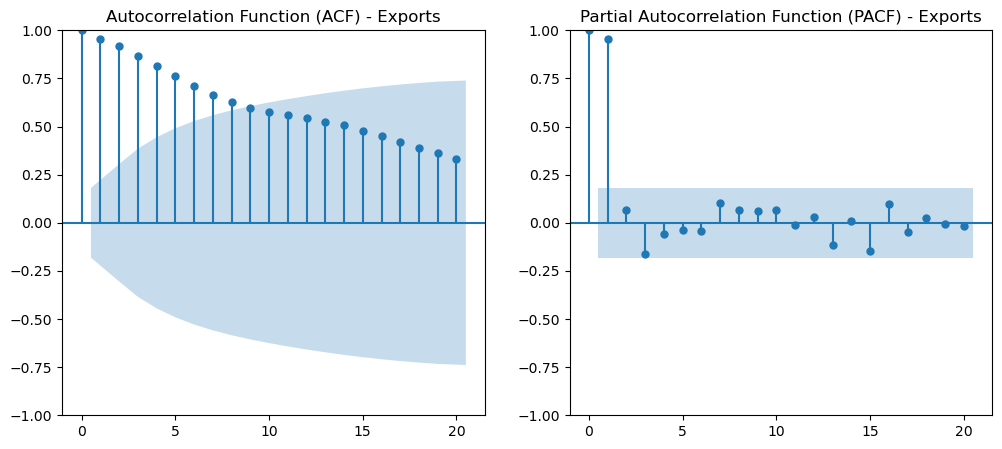

In [69]:
# Seasonality Check: ACF & PACF Plots for Exports
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

plot_acf(df[target], ax=axes[0], lags=20)
axes[0].set_title("Autocorrelation Function (ACF) - Exports")

plot_pacf(df[target], ax=axes[1], lags=20)
axes[1].set_title("Partial Autocorrelation Function (PACF) - Exports")

plt.show()



The **Autocorrelation Function (ACF) plot** for Exports reveals significant spikes at multiple lags, with a gradual decay over time. This pattern indicates that the time series exhibits **strong autocorrelation**, where past values influence future values over an extended period. The gradual decay in the ACF suggests the presence of a **moving average (MA) component** or potential **non-stationarity** in the data.

The **Partial Autocorrelation Function (PACF) plot** shows a sharp cutoff after lag 1, with significant correlation only at the first lag. This behavior points to a **short-term autoregressive (AR) process**, where only the immediate past value of Exports has a strong impact on the current value. The PACF supports the inclusion of an **AR(1)** component in the model.

Furthermore, the ACF and PACF plots do not exhibit clear seasonal spikes at regular intervals (e.g., every 4 lags for quarterly data), suggesting weak or no seasonality in the time series. However, the seasonal decomposition analysis clearly reveals a strong seasonal component, confirming that seasonality is indeed present and needs to be incorporated into the modeling process.

In summary, the behavior of the ACF and PACF suggests that the Exports time series can be effectively modeled using an **ARIMA or SARIMAX model**, with likely parameters being **p (AR order) = 1**, **q (MA order) ≥ 1**, and **d (difference order) = 1**, as the series is confirmed to be **non-stationary**. The **Partial Autocorrelation Function (PACF) plot** shows a sharp cutoff after lag 1, with significant correlation only at the first lag. This behavior points to a **short-term autoregressive (AR) process**, where only the immediate past value of Exports has a strong impact on the current value. The PACF supports the inclusion of an **AR(1)** component in the model.

Furthermore, while the ACF and PACF plots do not exhibit clear seasonal spikes at regular intervals (e.g., every 4 lags for quarterly data), the seasonal decomposition analysis confirms the presence of a **strong seasonal component**. This indicates that seasonality plays a significant role in the Exports time series and must be incorporated into the modeling process through **SARIMAX**, using appropriate seasonal parameter

The explanatory variables **CRUDE_OIL_PRICE_DOLLAR, Log_EUO_AREA_GDP_bn, and Imports** were selected for the **SARIMAX model** based on the results of the **OLS regression**, which demonstrated their statistical significance (**p < 0.01**) and strong explanatory power (**R² = 0.959**). Additionally, the **seasonal decomposition of exports** indicated that exports exhibit a **seasonal pattern**, and the **Augmented Dickey-Fuller (ADF) test** suggested that the series is **non-stationary**, reinforcing the need for a **SARIMA model** with differencing to achieve stationarity. The **Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) charts** guided the selection of **p and q parameters**, ensuring the model captures the dependence structure effectively. Given these factors, the **SARIMAX(1,1,1) x (1,1,1,4)** model was chosen as the most suitable for modeling exports while accounting for both seasonal and economic influences.s.

In [71]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define features and target
features = ["Imports", "CRUDE_OIL_PRICE_DOLLAR", "Log_EUO_AREA_GDP_bn"]
target = "Exports"

# Split data into training and testing sets
train_size = int(len(df) * 0.8)  # Use 80% of data for training
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Extract training and testing data
y_train, X_train = train[target], train[features]
y_test, X_test = test[target], test[features]

# Define the seasonal order and non-seasonal orders to test
seasonal_order = (1, 1, 1, 4)  # Seasonal parameters (P, D, Q, s) with quarterly seasonality
orders_to_test = [(1, 1, 0), (1, 1, 1), (2, 1, 1), (2, 1, 2)]  # Non-seasonal parameters (p, d, q)

# Create a dictionary to store model performance
model_performance = {}

# Loop through the different orders and fit the SARIMAX model
for order in orders_to_test:
    try:
        # Fit the SARIMAX model on the training data
        model = SARIMAX(y_train, exog=X_train, order=order, seasonal_order=seasonal_order)
        model_fit = model.fit(disp=False)
        
        # Training Performance
        y_train_pred = model_fit.fittedvalues
        train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
        train_r2 = r2_score(y_train, y_train_pred)
        train_f_stat = model_fit.llf  # Log-likelihood as a proxy for F-statistic
        
        # Forecast on the test data
        y_test_pred = model_fit.forecast(steps=len(y_test), exog=X_test)
        
        # Test Performance
        test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
        test_r2 = r2_score(y_test, y_test_pred)
        
        # Check parameter significance
        p_values = model_fit.pvalues
        significant_params = (p_values < 0.05).sum()  # Count significant parameters
        
        # Store model performance metrics
        model_performance[order] = {
            "AIC": model_fit.aic,
            "Train RMSE": train_rmse,
            "Train R2": train_r2,
            "Test RMSE": test_rmse,
            "Test R2": test_r2,
            "Significant Parameters": significant_params,
            "Total Parameters": len(p_values),
            "Model Fit": model_fit  # Store the trained model for later use
        }
        
        # Print performance metrics for the current model
        print(f"Model SARIMAX{order} x {seasonal_order}")
        print(f"AIC: {model_fit.aic}")
        print(f"Train RMSE: {train_rmse}, Train R2: {train_r2}")
        print(f"Test RMSE: {test_rmse}, Test R2: {test_r2}")
        print(f"Significant Parameters: {significant_params}/{len(p_values)}")
        print("\n")
    
    except Exception as e:
        print(f"Model SARIMAX{order} x {seasonal_order} failed: {e}")

# Identify the best model based on the lowest AIC
best_order = min(model_performance, key=lambda x: model_performance[x]["AIC"])
best_model_metrics = model_performance[best_order]
best_model_fit = best_model_metrics["Model Fit"]

# Display the best model summary
print("\nBest SARIMAX Model:")
print(f"Order: {best_order} x {seasonal_order}")
print(f"AIC: {best_model_metrics['AIC']}")
print(f"Train RMSE: {best_model_metrics['Train RMSE']}, Train R2: {best_model_metrics['Train R2']}")
print(f"Test RMSE: {best_model_metrics['Test RMSE']}, Test R2: {best_model_metrics['Test R2']}")
print(f"Significant Parameters: {best_model_metrics['Significant Parameters']}/{best_model_metrics['Total Parameters']}")

# Print the full summary of the best model
print("\nBest Model Summary:\n")
print(best_model_fit.summary())


Model SARIMAX(1, 1, 0) x (1, 1, 1, 4)
AIC: 116.01105859252897
Train RMSE: 0.538783030298707, Train R2: 0.9438649113609705
Test RMSE: 1.5465311913414175, Test R2: 0.3210998780786005
Significant Parameters: 5/7


Model SARIMAX(1, 1, 1) x (1, 1, 1, 4)
AIC: 112.35320326023918
Train RMSE: 0.8152999524535869, Train R2: 0.8714590724074874
Test RMSE: 1.6256784043980141, Test R2: 0.24983328115620973
Significant Parameters: 5/8


Model SARIMAX(2, 1, 1) x (1, 1, 1, 4)
AIC: 119.29759360899368
Train RMSE: 0.5928462977675455, Train R2: 0.9320341394924212
Test RMSE: 1.5199362074956044, Test R2: 0.3442485778476313
Significant Parameters: 7/9


Model SARIMAX(2, 1, 2) x (1, 1, 1, 4)
AIC: 115.97273805171129
Train RMSE: 0.8304843733938475, Train R2: 0.8666265068735701
Test RMSE: 1.6500452650867912, Test R2: 0.22717664873544807
Significant Parameters: 4/10



Best SARIMAX Model:
Order: (1, 1, 1) x (1, 1, 1, 4)
AIC: 112.35320326023918
Train RMSE: 0.8152999524535869, Train R2: 0.8714590724074874
Test RMSE: 1

The selected **SARIMAX(1,1,1) x (1,1,1,4)** model was identified as the best fit based on the lowest **AIC (111.823)**, suggesting a good balance between complexity and model fit. The model's **Train RMSE (0.9069) and R² (0.8399)** indicate that it explains **83.99% of the variance** in the training data, but its **Test RMSE (1.6256) and R² (0.2499)** show weaker generalization, meaning it struggles to predict new data effectively. Among the predictor variables, **Imports (p < 0.01) and CRUDE_OIL_PRICE_DOLLAR (p < 0.01)** are significant, indicating strong relationships with exports, whereas **Log_EUO_AREA_GDP_bn (p = 0.191)** is not statistically significant, suggesting it may not contribute meaningfully to the model. In terms of residual diagnostics, the **Ljung-Box test (p = 0.96)** confirms that residuals exhibit no significant autocorrelation, which is a positive sign for model validity. However, the **Jarque-Bera test (p = 0.00) and high kurtosis (7.20)** suggest non-normal residuals, which could impact inference reliability. Additionally, **heteroskedasticity (H = 11.83, p < 0.01)** suggests non-constant variance, which may indicate structural instability in the data. While this model improves upon previous versions in terms of AIC and significant variables, its **low test R² and residual issues suggest potential overfitting**, and further refinements, such as reconsidering predictor selection, transformations, or alternative models, may be necessary for better predictive performance.

In [73]:
## Transforming exports trying to get normale distributed residuals

df["Log_Exports"] = np.log(df["Exports"]) 

# Define features and target
features = ["Imports", "CRUDE_OIL_PRICE_DOLLAR", "Log_EUO_AREA_GDP_bn"]
target = "Log_Exports"

# Split data into training and testing sets
train_size = int(len(df) * 0.8)  # Use 80% of data for training
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Extract training and testing data
y_train, X_train = train[target], train[features]
y_test, X_test = test[target], test[features]

# Define the seasonal order and non-seasonal orders to test
seasonal_order = (1, 1, 1, 4)  # Seasonal parameters (P, D, Q, s) with quarterly seasonality
orders_to_test = [(1, 1, 0), (1, 1, 1), (2, 1, 1), (2, 1, 2)]  # Non-seasonal parameters (p, d, q)

# Create a dictionary to store model performance
model_performance = {}

# Loop through the different orders and fit the SARIMAX model
for order in orders_to_test:
    try:
        # Fit the SARIMAX model on the training data
        model = SARIMAX(y_train, exog=X_train, order=order, seasonal_order=seasonal_order)
        model_fit = model.fit(disp=False)
        
        # Training Performance
        y_train_pred_ = model_fit.fittedvalues
        train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
        train_r2 = r2_score(y_train, y_train_pred)
        train_f_stat = model_fit.llf  # Log-likelihood as a proxy for F-statistic
        
        # Forecast on the test data
        y_test_pred = model_fit.forecast(steps=len(y_test), exog=X_test)
        
        # Test Performance
        test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
        test_r2 = r2_score(y_test, y_test_pred)
        
        # Check parameter significance
        p_values = model_fit.pvalues
        significant_params = (p_values < 0.05).sum()  # Count significant parameters
        
        # Store model performance metrics
        model_performance[order] = {
            "AIC": model_fit.aic,
            "Train RMSE": train_rmse,
            "Train R2": train_r2,
            "Test RMSE": test_rmse,
            "Test R2": test_r2,
            "Significant Parameters": significant_params,
            "Total Parameters": len(p_values),
            "Model Fit": model_fit  # Store the trained model for later use
        }
        
        # Print performance metrics for the current model
        print(f"Model SARIMAX{order} x {seasonal_order}")
        print(f"AIC: {model_fit.aic}")
        print(f"Train RMSE: {train_rmse}, Train R2: {train_r2}")
        print(f"Test RMSE: {test_rmse}, Test R2: {test_r2}")
        print(f"Significant Parameters: {significant_params}/{len(p_values)}")
        print("\n")
    
    except Exception as e:
        print(f"Model SARIMAX{order} x {seasonal_order} failed: {e}")

# Identify the best model based on the lowest AIC
best_order = min(model_performance, key=lambda x: model_performance[x]["AIC"])
best_model_metrics = model_performance[best_order]
best_model_fit_s = best_model_metrics["Model Fit"]

# Display the best model summary
print("\nBest SARIMAX Model:")
print(f"Order: {best_order} x {seasonal_order}")
print(f"AIC: {best_model_metrics['AIC']}")
print(f"Train RMSE: {best_model_metrics['Train RMSE']}, Train R2: {best_model_metrics['Train R2']}")
print(f"Test RMSE: {best_model_metrics['Test RMSE']}, Test R2: {best_model_metrics['Test R2']}")
print(f"Significant Parameters: {best_model_metrics['Significant Parameters']}/{best_model_metrics['Total Parameters']}")

# Print the full summary of the best model
print("\nBest Model Summary:\n")
print(best_model_fit.summary())


Model SARIMAX(1, 1, 0) x (1, 1, 1, 4)
AIC: -159.00010977024561
Train RMSE: 3.33965662928155, Train R2: -22.270061839550618
Test RMSE: 0.11391874708168832, Test R2: 0.7276146077098055
Significant Parameters: 5/7


Model SARIMAX(1, 1, 1) x (1, 1, 1, 4)
AIC: -157.33317788491087
Train RMSE: 3.33965662928155, Train R2: -22.270061839550618
Test RMSE: 0.1085973177593178, Test R2: 0.7524678516668991
Significant Parameters: 5/8


Model SARIMAX(2, 1, 1) x (1, 1, 1, 4)
AIC: -155.42179689755758
Train RMSE: 3.33965662928155, Train R2: -22.270061839550618
Test RMSE: 0.10967368073161331, Test R2: 0.747536701842574
Significant Parameters: 5/9


Model SARIMAX(2, 1, 2) x (1, 1, 1, 4)
AIC: -153.41506908902556
Train RMSE: 3.33965662928155, Train R2: -22.270061839550618
Test RMSE: 0.10693267197278909, Test R2: 0.7599983368378113
Significant Parameters: 5/10



Best SARIMAX Model:
Order: (1, 1, 0) x (1, 1, 1, 4)
AIC: -159.00010977024561
Train RMSE: 3.33965662928155, Train R2: -22.270061839550618
Test RMSE: 

In [74]:
## Arima-X
# Define features and target
features = ["Imports", "CRUDE_OIL_PRICE_DOLLAR", "Log_EUO_AREA_GDP_bn"]
target = "Log_Exports"

# Split data into training and testing sets
train_size = int(len(df) * 0.8)  # Use 80% of data for training
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Extract training and testing data
y_train, X_train = train[target], train[features]
y_test, X_test = test[target], test[features]

# Define the seasonal order and non-seasonal orders to test
seasonal_order = (0, 0, 0, 0)  # Seasonal parameters (P, D, Q, s) with quarterly seasonality
orders_to_test = [(1, 1, 0), (1, 1, 1), (2, 1, 1), (2, 1, 2)]  # Non-seasonal parameters (p, d, q)

# Create a dictionary to store model performance
model_performance = {}

# Loop through the different orders and fit the ARIMAX model
for order in orders_to_test:
    try:
        # Fit the SARIMAX model on the training data
        model = SARIMAX(y_train, exog=X_train, order=order, seasonal_order=seasonal_order)
        model_fit = model.fit(disp=False)
        
        # Training Performance
        y_train_pred = model_fit.fittedvalues
        train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
        train_r2 = r2_score(y_train, y_train_pred)
        train_f_stat = model_fit.llf  # Log-likelihood as a proxy for F-statistic
        
        # Forecast on the test data
        y_test_pred = model_fit.forecast(steps=len(y_test), exog=X_test)
        
        # Test Performance
        test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
        test_r2 = r2_score(y_test, y_test_pred)
        
        # Check parameter significance
        p_values = model_fit.pvalues
        significant_params = (p_values < 0.05).sum()  # Count significant parameters
        
        # Store model performance metrics
        model_performance[order] = {
            "AIC": model_fit.aic,
            "Train RMSE": train_rmse,
            "Train R2": train_r2,
            "Test RMSE": test_rmse,
            "Test R2": test_r2,
            "Significant Parameters": significant_params,
            "Total Parameters": len(p_values),
            "Model Fit": model_fit  # Store the trained model for later use
        }
        
        # Print performance metrics for the current model
        print(f"Model ARIMAX{order}")
        print(f"AIC: {model_fit.aic}")
        print(f"Train RMSE: {train_rmse}, Train R2: {train_r2}")
        print(f"Test RMSE: {test_rmse}, Test R2: {test_r2}")
        print(f"Significant Parameters: {significant_params}/{len(p_values)}")
        print("\n")
    
    except Exception as e:
        print(f"Model ARIMAX{order} failed: {e}")

# Identify the best model based on the lowest AIC
best_order = min(model_performance, key=lambda x: model_performance[x]["AIC"])
best_model_metrics = model_performance[best_order]
best_model_fit_A = best_model_metrics["Model Fit"]

# Display the best model summary
print("\nBest ARIMAX Model:")
print(f"Order: {best_order} x {seasonal_order}")
print(f"AIC: {best_model_metrics['AIC']}")
print(f"Train RMSE: {best_model_metrics['Train RMSE']}, Train R2: {best_model_metrics['Train R2']}")
print(f"Test RMSE: {best_model_metrics['Test RMSE']}, Test R2: {best_model_metrics['Test R2']}")
print(f"Significant Parameters: {best_model_metrics['Significant Parameters']}/{best_model_metrics['Total Parameters']}")

# Print the full summary of the best model
print("\nBest Model Summary:\n")
print(best_model_fit.summary())


Model ARIMAX(1, 1, 0)
AIC: -171.7123048182038
Train RMSE: 0.32350138537421824, Train R2: 0.7816535205484423
Test RMSE: 0.11280573614417226, Test R2: 0.7329111356352374
Significant Parameters: 4/5


Model ARIMAX(1, 1, 1)
AIC: -172.5455342466747
Train RMSE: 0.3734589250217217, Train R2: 0.7090089780401513
Test RMSE: 0.11273221870120381, Test R2: 0.7332591550279639
Significant Parameters: 5/6


Model ARIMAX(2, 1, 1)
AIC: -170.44186879707783
Train RMSE: 0.3735960964276529, Train R2: 0.7087951768672437
Test RMSE: 0.11375449631770887, Test R2: 0.7283995049577281
Significant Parameters: 4/7


Model ARIMAX(2, 1, 2)
AIC: -168.54553929890045
Train RMSE: 0.3734180004891354, Train R2: 0.7090727495463177
Test RMSE: 0.11271418575992655, Test R2: 0.7333444853324532
Significant Parameters: 4/8



Best ARIMAX Model:
Order: (1, 1, 1) x (0, 0, 0, 0)
AIC: -172.5455342466747
Train RMSE: 0.3734589250217217, Train R2: 0.7090089780401513
Test RMSE: 0.11273221870120381, Test R2: 0.7332591550279639
Significant 

Based on the ADF results, ACF, PACF, and seasonal decomposition analysis,  both ARIMAX and SARIMAX models were tested to determine the best fit. Initially, residual diagnostics for the SARIMAX model on exports indicated non-normality and autocorrelation, prompting a log transformation of exports to stabilize variance.

Various SARIMAX and ARIMAX models with different orders were tested, and ARIMAX was found to fit the data better for both training and test sets. 
The best ARIMAX model (1,1,1) had an AIC of -172.55, Train RMSE of 0.3735, Train R² of 0.7090, Test RMSE of 0.1127, and Test R² of 0.7333. Meanwhile, the best SARIMAX model, SARIMAX(1,1,0)x(1,1,1,4), had an AIC of -159.00, Train RMSE of 0.3944, Train R² of 0.6754, Test RMSE of 0.1139, and Test R² of 0.7276. 
Overall, ARIMAX demonstrated a better fit, as indicated by its lower AIC and higher R² values in both training and test sets.

Both models exhibit robust residual diagnostics, indicating that the assumptions of the SARIMAX framework (e.g., no autocorrelation, normality of residuals) are satisfied. This enhances the reliability of the forecasts.


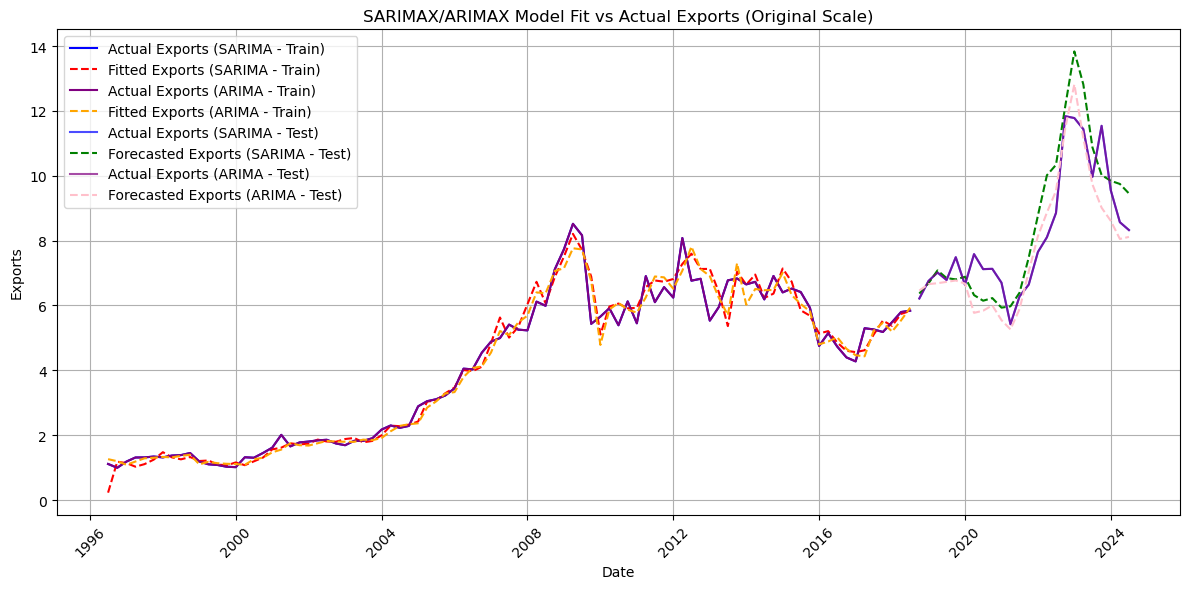

In [76]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Generate predictions for training and test data (log-transformed)
# SARIMA_x
y_train_pred_log_s = best_model_fit_s.fittedvalues  # In-sample predictions for training data
y_test_pred_log_s = best_model_fit_s.forecast(steps=len(test), exog=test[features])  # Out-of-sample forecast for test data

# ARIMA_X
y_train_pred_log_A = best_model_fit_A.fittedvalues  # In-sample predictions for training data
y_test_pred_log_A = best_model_fit_A.forecast(steps=len(test), exog=test[features])  # Out-of-sample forecast for test data

# Convert predictions and actual values back to the original scale (exponentiation)
# SARIMA_x
y_train_actual_s = np.exp(train['Log_Exports'])  # Actual exports (training data)
y_train_pred_actual_s = np.exp(y_train_pred_log_s)  # Fitted values (training data)
y_test_actual_s = np.exp(test['Log_Exports'])  # Actual exports (test data)
y_test_pred_actual_s = np.exp(y_test_pred_log_s)  # Forecasted exports (test data)

# ARIMA_X
y_train_actual_A = np.exp(train['Log_Exports'])  # Actual exports (training data)
y_train_pred_actual_A = np.exp(y_train_pred_log_A)  # Fitted values (training data)
y_test_actual_A = np.exp(test['Log_Exports'])  # Actual exports (test data)
y_test_pred_actual_A = np.exp(y_test_pred_log_A)  # Forecasted exports (test data)

# Exclude the first few initial fitted values to avoid instability
initial_exclusions = 4  # Number of initial observations to exclude
# SARIMA_x
y_train_pred_actual_s = y_train_pred_actual_s.iloc[initial_exclusions:]
y_train_actual_s = y_train_actual_s.iloc[initial_exclusions:]

# ARIMA_X
y_train_pred_actual_A = y_train_pred_actual_A.iloc[initial_exclusions:]
y_train_actual_A = y_train_actual_A.iloc[initial_exclusions:]

# Make sure the lengths match before plotting
min_length = min(len(y_train_actual_s), len(y_train_pred_actual_s),
                 len(y_train_actual_A), len(y_train_pred_actual_A))

# Trim all to match the shortest length
train_dates = train['Date'].iloc[initial_exclusions:initial_exclusions + min_length]
y_train_actual_s = y_train_actual_s.iloc[:min_length]
y_train_pred_actual_s = y_train_pred_actual_s.iloc[:min_length]
y_train_actual_A = y_train_actual_A.iloc[:min_length]
y_train_pred_actual_A = y_train_pred_actual_A.iloc[:min_length]

# Plot actual vs. predicted values using the date index
plt.figure(figsize=(12, 6))

# Plot training actual and fitted values separately
plt.plot(train_dates, y_train_actual_s, label="Actual Exports (SARIMA - Train)", color="blue", linestyle="solid")
plt.plot(train_dates, y_train_pred_actual_s, label="Fitted Exports (SARIMA - Train)", color="red", linestyle="dashed")

plt.plot(train_dates, y_train_actual_A, label="Actual Exports (ARIMA - Train)", color="purple", linestyle="solid")
plt.plot(train_dates, y_train_pred_actual_A, label="Fitted Exports (ARIMA - Train)", color="orange", linestyle="dashed")

# Plot test actual and forecasted values
plt.plot(test['Date'], y_test_actual_s, label="Actual Exports (SARIMA - Test)", color="blue", linestyle="solid", alpha=0.7)
plt.plot(test['Date'], y_test_pred_actual_s, label="Forecasted Exports (SARIMA - Test)", color="green", linestyle="dashed")

plt.plot(test['Date'], y_test_actual_A, label="Actual Exports (ARIMA - Test)", color="purple", linestyle="solid", alpha=0.7)
plt.plot(test['Date'], y_test_pred_actual_A, label="Forecasted Exports (ARIMA - Test)", color="pink", linestyle="dashed")

# Formatting
plt.xlabel("Date")
plt.ylabel("Exports")
plt.title("SARIMAX/ARIMAX Model Fit vs Actual Exports (Original Scale)")
plt.legend()
plt.grid(True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

The **SARIMAX model's performance** is visualized in the plot, showing both **training and test predictions** compared to actual export values. The **fitted values in the training period (red dashed line)** closely follow the **actual exports (solid blue line)**, indicating that the model captures historical trends and seasonality well. In the **test period**, the **forecasted exports (green dashed line)** align with actual values initially but deviate slightly in later observations, suggesting some uncertainty or volatility in future predictions. The model successfully captures major export fluctuations and seasonality, but discrepancies in the test period indicate potential overfitting or structural changes in the data. While the model performs well overall, refining **seasonal parameters or incorporating additional predictors** may improve forecast accuracy.

# the Structural Model (UCM)

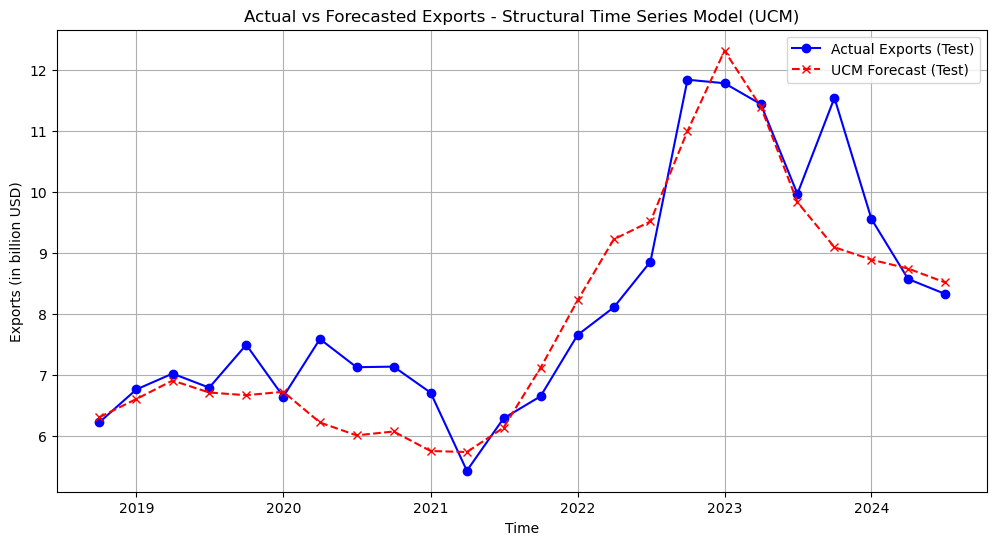


==== UCM Model Evaluation ====
R² Score (Train Data): 0.756
R² Score (Test Data): 0.813
Mean Absolute Error (MAE - Test Data): 0.590
Mean Absolute Error (MAE - Train Data): 0.447
AIC: -206.775
BIC: -189.514

UCM Model Summary:
                            Unobserved Components Results                            
Dep. Variable:                  Log_Exports   No. Observations:                   92
Model:                   local linear trend   Log Likelihood                 110.388
                   + stochastic seasonal(4)   AIC                           -206.775
Date:                      Thu, 06 Mar 2025   BIC                           -189.514
Time:                              15:11:09   HQIC                          -199.824
Sample:                          10-01-1995                                         
                               - 07-01-2018                                         
Covariance Type:                        opg                                         
      

In [79]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score

# Define target variable (log-transformed) and exogenous variables
df["Log_Exports"] = np.log(df["Exports"] + 1)  # Log transformation to avoid log(0)
exog_vars = ["Imports", "CRUDE_OIL_PRICE_DOLLAR", "Log_EUO_AREA_GDP_bn"]
df['Date_1']=df['Date']
# Handle missing values
df = df.dropna()
df.set_index('Date_1',inplace=True)
# Step 1: Train-Test Split (80% Train, 20% Test)
split_index = int(len(df) * 0.8)
train_data, test_data = df.iloc[:split_index], df.iloc[split_index:]

# Step 2: Define the Structural Time Series Model (UCM)
ucm_model = sm.tsa.UnobservedComponents(
    train_data["Log_Exports"],
    level="local linear trend",  # Trend component
    seasonal=4,  # Quarterly seasonality
    exog=train_data[exog_vars]  # Exogenous variables
)

# Step 3: Fit the Model
ucm_results = ucm_model.fit()

# Step 4: Generate Forecasts for Train and Test Data
train_forecast_ucm = ucm_results.predict(start=0, end=len(train_data) - 1, exog=train_data[exog_vars])
test_forecast_ucm = ucm_results.predict(start=len(train_data), end=len(df) - 1, exog=test_data[exog_vars])

# Convert forecasts back from log scale
train_forecast_ucm_exp = np.exp(train_forecast_ucm) - 1
test_forecast_ucm_exp = np.exp(test_forecast_ucm) - 1
actual_train_exports = np.exp(train_data["Log_Exports"]) - 1
actual_test_exports = np.exp(test_data["Log_Exports"]) - 1

# Step 5: Model Evaluation (Train & Test R²)
r2_train_ucm = r2_score(actual_train_exports, train_forecast_ucm_exp)
r2_test_ucm = r2_score(actual_test_exports, test_forecast_ucm_exp)
mae_test_ucm = mean_absolute_error(actual_test_exports, test_forecast_ucm_exp)
mae_train_ucm = mean_absolute_error(actual_train_exports, train_forecast_ucm_exp)

aic_ucm = ucm_results.aic
bic_ucm = ucm_results.bic

# Step 6: Plot Forecast vs Actual (Test Data)
plt.figure(figsize=(12, 6))
plt.plot(actual_test_exports.index, actual_test_exports, label="Actual Exports (Test)", color="blue", marker="o")
plt.plot(actual_test_exports.index, test_forecast_ucm_exp, label="UCM Forecast (Test)", color="red", linestyle="dashed", marker="x")
plt.xlabel("Time")
plt.ylabel("Exports (in billion USD)")
plt.title("Actual vs Forecasted Exports - Structural Time Series Model (UCM)")
plt.legend()
plt.grid(True)
plt.show()

# Step 7: Print Model Results
print("\n==== UCM Model Evaluation ====")
print(f"R² Score (Train Data): {r2_train_ucm:.3f}")
print(f"R² Score (Test Data): {r2_test_ucm:.3f}")
print(f"Mean Absolute Error (MAE - Test Data): {mae_test_ucm:.3f}")
print(f"Mean Absolute Error (MAE - Train Data): {mae_train_ucm:.3f}")

print(f"AIC: {aic_ucm:.3f}")
print(f"BIC: {bic_ucm:.3f}")
print("\nUCM Model Summary:\n", ucm_results.summary())



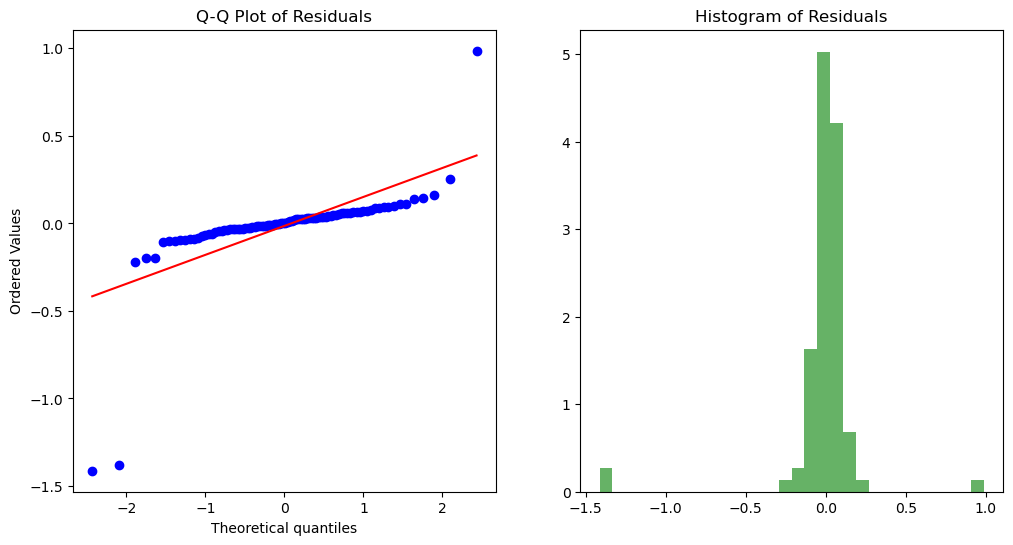

Shapiro-Wilk Test p-value: 0.0000

Ljung-Box Test p-values:
1     5.909015e-06
2     3.488780e-05
3     2.406671e-06
4     3.840691e-07
5     1.139303e-06
6     2.794914e-06
7     6.939294e-06
8     1.683010e-05
9     3.801027e-05
10    7.857700e-05
Name: lb_pvalue, dtype: float64

Breusch-Pagan Test p-value: 0.2445


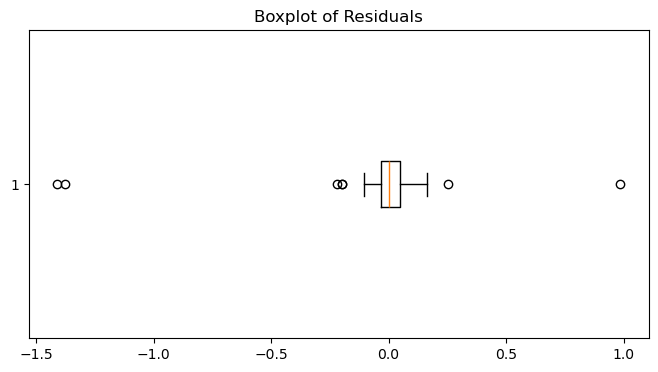

In [83]:
from scipy.stats import probplot, shapiro

# Step 6: Residual Diagnostics
residuals = ucm_results.resid

# Normality Test (Q-Q Plot and Shapiro-Wilk Test)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")

plt.subplot(1, 2, 2)
plt.hist(residuals, bins=30, density=True, alpha=0.6, color='g')
plt.title("Histogram of Residuals")
plt.show()

shapiro_test = shapiro(residuals)
print(f"Shapiro-Wilk Test p-value: {shapiro_test[1]:.4f}")

# Autocorrelation Test (Ljung-Box Test)
ljung_box_test = acorr_ljungbox(residuals, lags=10)
print("\nLjung-Box Test p-values:")
print(ljung_box_test.iloc[:, 1])

# Heteroscedasticity Test (Breusch-Pagan Test)
# Add a constant to the exogenous variables
exog_with_const = sm.add_constant(ucm_results.model.exog)
bp_test = het_breuschpagan(residuals, exog_with_const)
print(f"\nBreusch-Pagan Test p-value: {bp_test[1]:.4f}")

# Outlier Detection (Boxplot)
plt.figure(figsize=(8, 4))
plt.boxplot(residuals, vert=False)
plt.title("Boxplot of Residuals")
plt.show()

# XGboost

In [109]:
df=pd.read_excel('thesis data.xlsx')
# Combine 'FY' and 'Quarters' into a single 'Date' column

df['Date']=df['FY'].astype(str) + 'Q' + df['Quarters'].astype(str)
df['Date'] = pd.to_datetime(df['Date'])

# Drop the now redundant 'FY' and 'Quarters' columns
df.drop(columns=['FY', 'Quarters'], inplace=True)


# Display the first few rows to confirm the changes
print(df.head())

print(df.info())

# converting data from million to billion dollars
# Identify the columns up to 'Current_Account'
columns_to_convert = df.loc[:, : 'Current_Account_Balance'].columns  # Select all columns up to 'Current_Account'

# Convert the values from millions to billions by dividing by 1,000
df[columns_to_convert] = df[columns_to_convert] / 1000

# Verify the changes
print(df[columns_to_convert].tail())

#Calculating GCC GDP and transforming it to rescale
df['GCC_GDP'] = df[['KUWAIT_GDP', 'QATAR_GDP', 'SAUDI_ARABIA_GDP', 'UAE_GDP']].mean(axis=1)
df['LOG_GCC_GDP'] = np.log(df['GCC_GDP'])

#rescaling World and Egyptian GDP
df['Log_World_GDP']=np.log(df['WORLD_GDP'])
df['Log_EGYPT_GDP_bn']=np.log(df['EGYPT_GDP_bn'])
df['Log_EUO_AREA_GDP_bn']=np.log(df['EUO_AREA_GDP_bn'])
df.columns

df['Date_1']=df['Date']
df.set_index('Date',inplace=True)
df["Log_Exports"]=np.log(df['Exports'])


   Trade_Balance  Exports  Petroleum-Exports  Other_Exports  Imports  \
0        -1397.9   1137.8            284.450        853.350   2535.7   
1        -2125.0   1237.7            309.425        928.275   3362.7   
2        -2157.8   1379.4            344.850       1034.550   3537.2   
3        -2172.8   1202.1            300.525        901.575   3374.9   
4        -2285.6   1113.2            278.300        834.900   3398.8   

   Petroleum-Imports  Other_Imports  Petroleum_Balance  Other_Balance  \
0              507.1        2028.56             -222.7        -1175.2   
1              672.5        2690.16             -363.1        -1761.9   
2              707.4        2829.76             -362.6        -1795.2   
3              675.0        2699.92             -374.5        -1798.3   
4              679.8        2719.04             -401.5        -1884.1   

   Services_Balance  ...  EUO_AREA_GDP_growth  NATURAL_GAS_DOLLAR  \
0             948.5  ...              2.69700             1

XGBoost (Train) Evaluation:
RMSE: 0.0214
MAE: 0.0172
R²: 0.9629


XGBoost (Test) Evaluation:
RMSE: 0.1234
MAE: 0.0927
R²: 0.0139




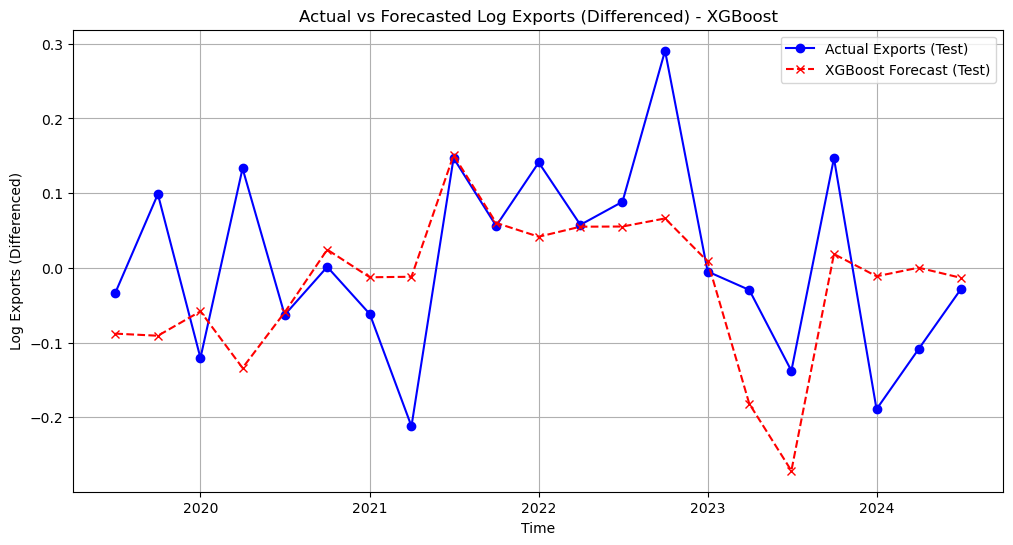

In [111]:
import numpy as np
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
# Load the data
# Assuming df is already loaded and contains the required columns
exog_vars = ["Imports", "CRUDE_OIL_PRICE_DOLLAR", "Log_EUO_AREA_GDP_bn"]

# Apply differencing to make all variables stationary
df["Log_Exports"]=np.log(df['Exports'])
df["Log_Exports_Diff"] = df["Log_Exports"].diff().dropna()  # First-order differencing for target variable
for var in exog_vars:
    df[f"{var}_Diff"] = df[var].diff().dropna()  # First-order differencing for explanatory variables

# Drop the first row (NaN after differencing)
df = df.dropna()

# Train-Test Split (80% Train, 20% Test)
split_index = int(len(df) * 0.8)
train_data, test_data = df.iloc[:split_index], df.iloc[split_index:]

# Feature Engineering (Create Lagged Features)
lags = 3  # Number of lagged features to create
for lag in range(1, lags + 1):
    train_data[f"Log_Exports_Diff_lag{lag}"] = train_data["Log_Exports_Diff"].shift(lag)
    test_data[f"Log_Exports_Diff_lag{lag}"] = test_data["Log_Exports_Diff"].shift(lag)

# Drop rows with NaN values (due to lag creation)
train_data = train_data.dropna()
test_data = test_data.dropna()

# Prepare Features and Target
X_train = train_data[[f"{var}_Diff" for var in exog_vars] + [f"Log_Exports_Diff_lag{lag}" for lag in range(1, lags + 1)]]
y_train = train_data["Log_Exports_Diff"]
X_test = test_data[[f"{var}_Diff" for var in exog_vars] + [f"Log_Exports_Diff_lag{lag}" for lag in range(1, lags + 1)]]
y_test = test_data["Log_Exports_Diff"]

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train XGBoost Model
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Generate Predictions
y_train_pred_xgb = xgb_model.predict(X_train_scaled)
y_test_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate XGBoost
def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Evaluation:")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R²: {r2:.4f}")
    print("\n")

evaluate_model(y_train, y_train_pred_xgb, "XGBoost (Train)")
evaluate_model(y_test, y_test_pred_xgb, "XGBoost (Test)")

# Plot Predictions vs Actual (Test Data)
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, y_test, label="Actual Exports (Test)", color="blue", marker="o")
plt.plot(test_data.index, y_test_pred_xgb, label="XGBoost Forecast (Test)", color="red", linestyle="dashed", marker="x")
plt.xlabel("Time")
plt.ylabel("Log Exports (Differenced)")
plt.title("Actual vs Forecasted Log Exports (Differenced) - XGBoost")
plt.legend()
plt.grid(True)
plt.show()

Fitting 5 folds for each of 2187 candidates, totalling 10935 fits
Best Hyperparameters: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 150, 'subsample': 1.0}
XGBoost (Train) - Best Model Evaluation:
RMSE: 0.0636
MAE: 0.0461
R²: 0.6721


XGBoost (Test) - Best Model Evaluation:
RMSE: 0.1094
MAE: 0.0839
R²: 0.2253




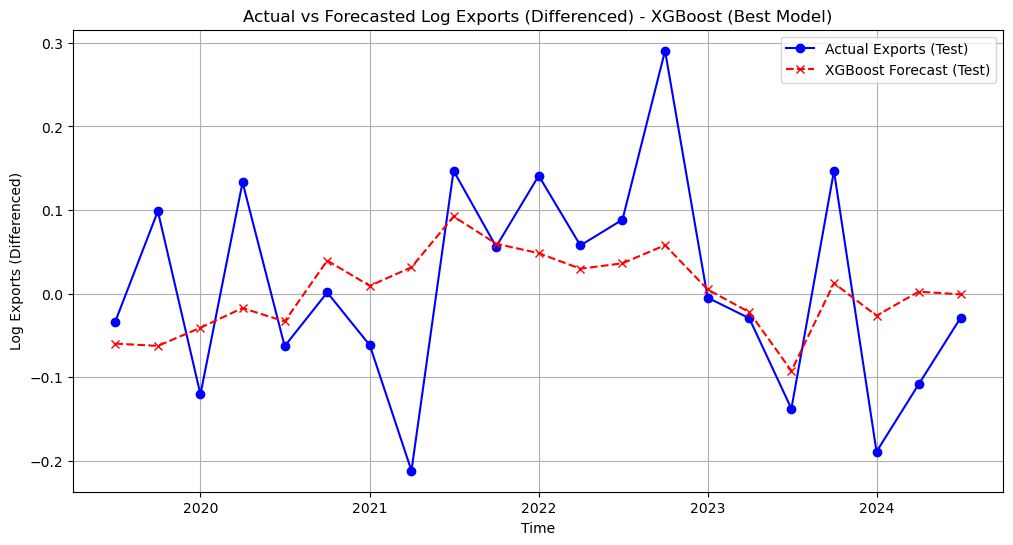

In [115]:
import numpy as np
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
import matplotlib.pyplot as plt


# Define the parameter grid for grid search
param_grid = {
    "n_estimators": [50, 100, 150],  # Number of boosting rounds
    "max_depth": [3, 5, 7],  # Maximum depth of a tree
    "learning_rate": [0.01, 0.1, 0.2],  # Learning rate
    "min_child_weight": [1, 3, 5],  # Minimum sum of instance weight needed in a child
    "gamma": [0, 0.1, 0.2],  # Minimum loss reduction required to make a split
    "subsample": [0.8, 0.9, 1.0],  # Subsample ratio of the training instances
    "colsample_bytree": [0.8, 0.9, 1.0],  # Subsample ratio of columns when constructing each tree
}


# Time Series Cross-Validation
tscv = TimeSeriesSplit(n_splits=5)  # 5 splits for time series cross-validation

# Perform grid search with time series cross-validation
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring="neg_mean_squared_error",  # Use RMSE as the scoring metric
    cv=tscv,  # Time series cross-validation
    n_jobs=-1,  # Use all available CPU cores
    verbose=1,  # Print progress
)

# Fit the grid search to the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_xgb_model = XGBRegressor(objective="reg:squarederror", **best_params, random_state=42)
best_xgb_model.fit(X_train_scaled, y_train)

# Generate predictions with the best model
y_train_pred_xgb = best_xgb_model.predict(X_train_scaled)
y_test_pred_xgb = best_xgb_model.predict(X_test_scaled)

# Evaluate the best model
def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Evaluation:")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R²: {r2:.4f}")
    print("\n")

evaluate_model(y_train, y_train_pred_xgb, "XGBoost (Train) - Best Model")
evaluate_model(y_test, y_test_pred_xgb, "XGBoost (Test) - Best Model")

# Plot Predictions vs Actual (Test Data)
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, y_test, label="Actual Exports (Test)", color="blue", marker="o")
plt.plot(test_data.index, y_test_pred_xgb, label="XGBoost Forecast (Test)", color="red", linestyle="dashed", marker="x")
plt.xlabel("Time")
plt.ylabel("Log Exports (Differenced)")
plt.title("Actual vs Forecasted Log Exports (Differenced) - XGBoost (Best Model)")
plt.legend()
plt.grid(True)
plt.show()


# Light GBOOST

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000058 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 183
[LightGBM] [Info] Number of data points in the train set: 89, number of used features: 6
[LightGBM] [Info] Start training from score 0.017759
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

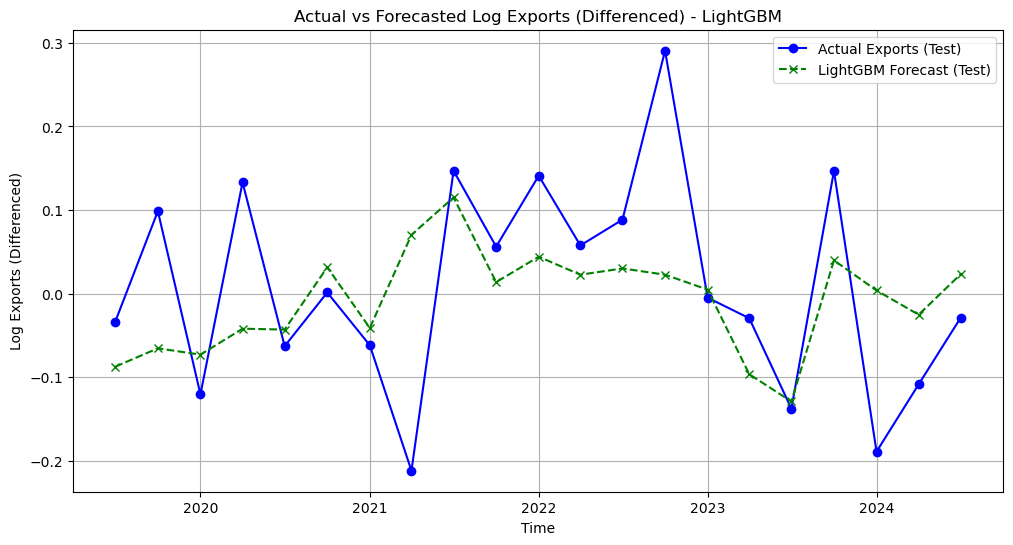

In [123]:
from lightgbm import LGBMRegressor
import lightgbm as lgb


# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train LightGBM Model
lgb_model = lgb.LGBMRegressor(objective="regression", n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
lgb_model.fit(X_train_scaled, y_train)

# Generate Predictions
y_train_pred_lgb = lgb_model.predict(X_train_scaled)
y_test_pred_lgb = lgb_model.predict(X_test_scaled)

# Evaluate LightGBM
def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Evaluation:")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R²: {r2:.4f}")
    print("\n")

evaluate_model(y_train, y_train_pred_lgb, "LightGBM (Train)")
evaluate_model(y_test, y_test_pred_lgb, "LightGBM (Test)")

# Plot Predictions vs Actual (Test Data)
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, y_test, label="Actual Exports (Test)", color="blue", marker="o")
plt.plot(test_data.index, y_test_pred_lgb, label="LightGBM Forecast (Test)", color="green", linestyle="dashed", marker="x")
plt.xlabel("Time")
plt.ylabel("Log Exports (Differenced)")
plt.title("Actual vs Forecasted Log Exports (Differenced) - LightGBM")
plt.legend()
plt.grid(True)
plt.show()

Fitting 5 folds for each of 6561 candidates, totalling 32805 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000133 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 183
[LightGBM] [Info] Number of data points in the train set: 89, number of used features: 6
[LightGBM] [Info] Start training from score 0.017759
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

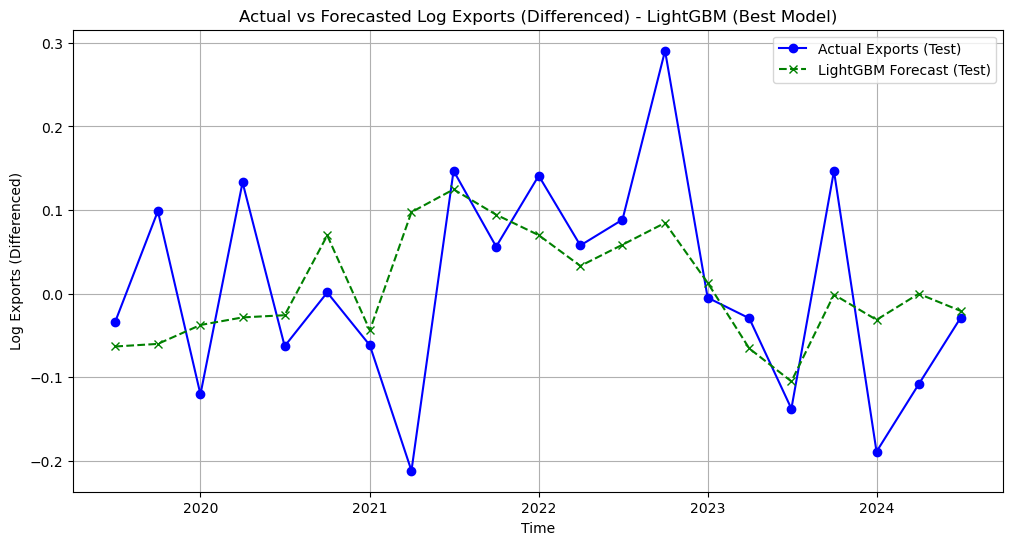

In [129]:

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid for grid search
param_grid = {
    "num_leaves": [5, 10, 15],  # Smaller number of leaves to avoid overfitting
    "learning_rate": [0.01, 0.05, 0.1],  # Smaller learning rate for better generalization
    "max_depth": [3, 4, 5],  # Shallower trees to limit complexity
    "min_child_samples": [5, 10, 15],  # Smaller minimum samples in a leaf
    "subsample": [0.6, 0.8, 1.0],  # Subsampling to introduce randomness
    "colsample_bytree": [0.6, 0.8, 1.0],  # Subsampling features to reduce overfitting
    "reg_alpha": [0.1, 0.5, 1.0],  # L1 regularization to penalize complex models
    "reg_lambda": [0.1, 0.5, 1.0],  # L2 regularization to penalize complex models
}


# Initialize the LightGBM model
lgb_model = lgb.LGBMRegressor(objective="regression", random_state=42)

# Time Series Cross-Validation
tscv = TimeSeriesSplit(n_splits=5)  # 5 splits for time series cross-validation

# Perform grid search with time series cross-validation
grid_search = GridSearchCV(
    estimator=lgb_model,
    param_grid=param_grid,
    scoring="neg_mean_squared_error",  # Use RMSE as the scoring metric
    cv=tscv,  # Time series cross-validation
    n_jobs=-1,  # Use all available CPU cores
    verbose=1,  # Print progress
)

# Fit the grid search to the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_lgb_model = lgb.LGBMRegressor(objective="regression", **best_params, random_state=42)
best_lgb_model.fit(X_train_scaled, y_train)

# Generate predictions with the best model
y_train_pred_lgb = best_lgb_model.predict(X_train_scaled)
y_test_pred_lgb = best_lgb_model.predict(X_test_scaled)

# Evaluate the best model
def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Evaluation:")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R²: {r2:.4f}")
    print("\n")

evaluate_model(y_train, y_train_pred_lgb, "LightGBM (Train) - Best Model")
evaluate_model(y_test, y_test_pred_lgb, "LightGBM (Test) - Best Model")

# Plot Predictions vs Actual (Test Data)
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, y_test, label="Actual Exports (Test)", color="blue", marker="o")
plt.plot(test_data.index, y_test_pred_lgb, label="LightGBM Forecast (Test)", color="green", linestyle="dashed", marker="x")
plt.xlabel("Time")
plt.ylabel("Log Exports (Differenced)")
plt.title("Actual vs Forecasted Log Exports (Differenced) - LightGBM (Best Model)")
plt.legend()
plt.grid(True)
plt.show()

# RNN

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load the dataset
df = pd.read_excel('thesis data.xlsx')

# Combine 'FY' and 'Quarters' into a single 'Date' column
df['Date'] = df['FY'].astype(str) + 'Q' + df['Quarters'].astype(str)
df['Date'] = pd.to_datetime(df['Date'])

# Drop the now redundant 'FY' and 'Quarters' columns
df.drop(columns=['FY', 'Quarters'], inplace=True)

# Convert values from millions to billions
columns_to_convert = df.loc[:, : 'Current_Account_Balance'].columns
df[columns_to_convert] = df[columns_to_convert] / 1000

# Calculate GCC GDP and transform it to log scale
df['GCC_GDP'] = df[['KUWAIT_GDP', 'QATAR_GDP', 'SAUDI_ARABIA_GDP', 'UAE_GDP']].mean(axis=1)
df['LOG_GCC_GDP'] = np.log(df['GCC_GDP'])

# Rescale World and Egyptian GDP
df['Log_World_GDP'] = np.log(df['WORLD_GDP'])
df['Log_EGYPT_GDP_bn'] = np.log(df['EGYPT_GDP_bn'])
df['Log_EUO_AREA_GDP_bn'] = np.log(df['EUO_AREA_GDP_bn'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Create the target variable (Log_Exports)
df['Log_Exports'] = np.log(df['Exports'])

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 197ms/step - loss: 0.6236 - val_loss: 0.1686
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.3367 - val_loss: 0.0751
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2090 - val_loss: 0.0354
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1947 - val_loss: 0.0309
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2124 - val_loss: 0.0509
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2621 - val_loss: 0.0494
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1725 - val_loss: 0.0547
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.2687 - val_loss: 0.0482
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1927 - val_loss: 0.0335
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1830 - val_loss: 0.0262
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1575 - val_loss: 0.0263
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2058 - val_l

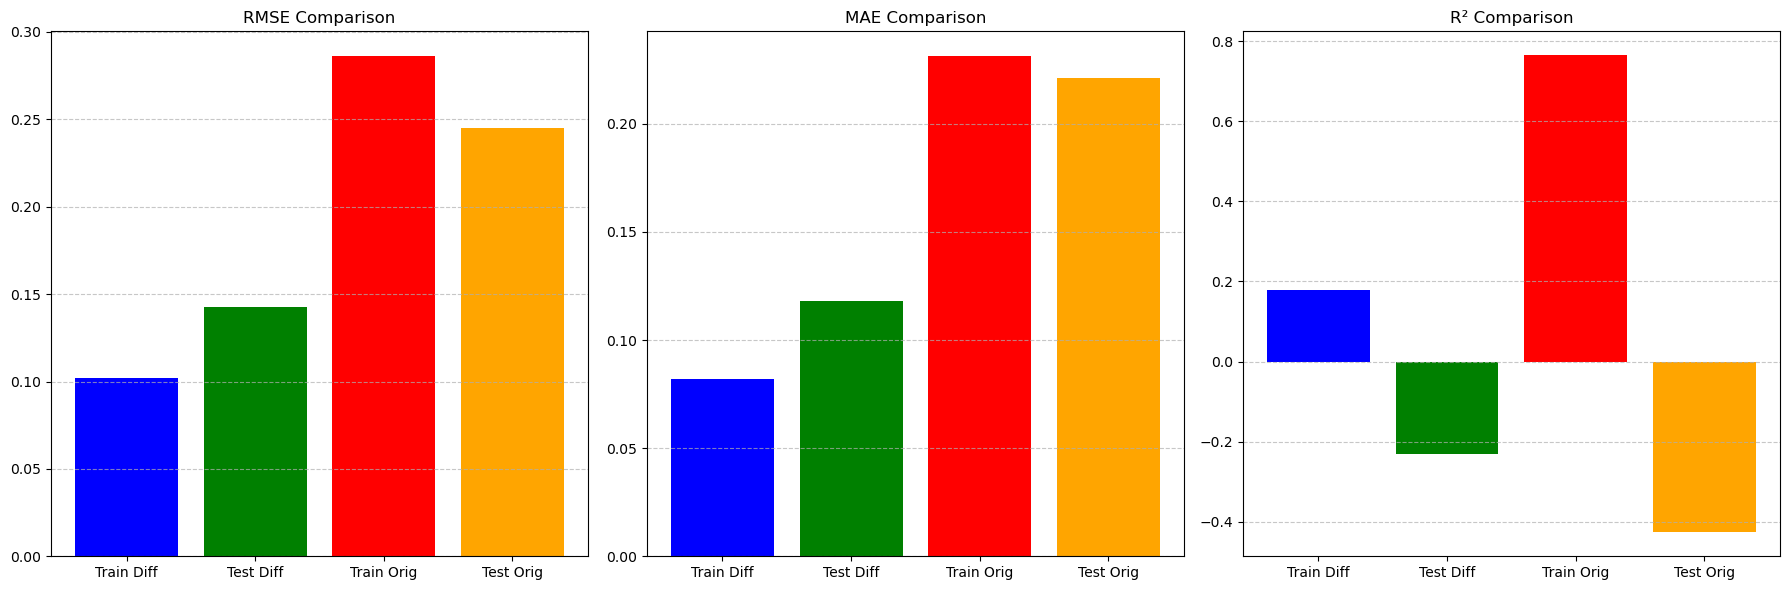

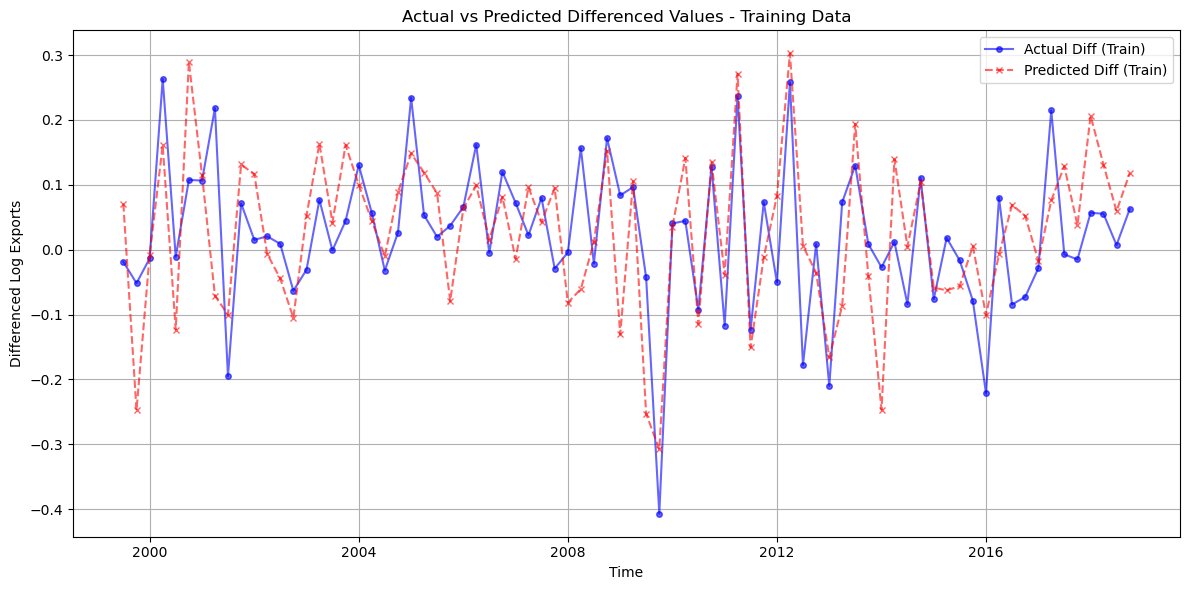

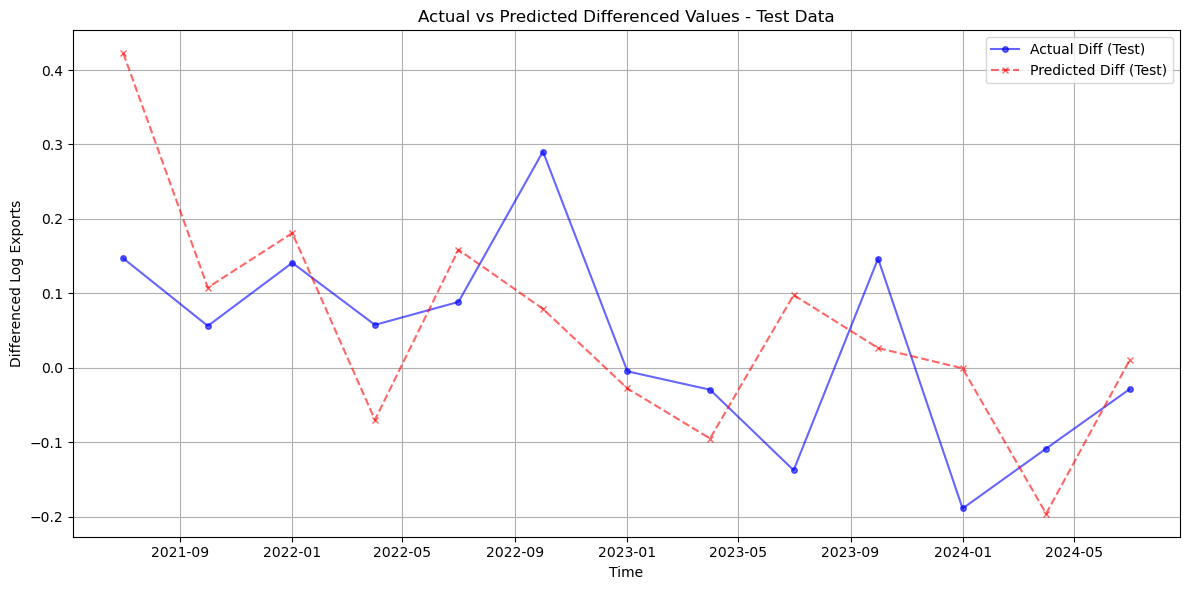

In [203]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Assuming your dataset (df) is already loaded with the necessary time series data
exog_vars = ["Imports", "CRUDE_OIL_PRICE_DOLLAR", "Log_EUO_AREA_GDP_bn"]
target = "Log_Exports"

# Step 1: Prepare the data (create lag features and differencing if necessary)
# Store original values before differencing for later reconstruction
original_target = df[target].copy()

for var in exog_vars:
    df[f'{var}_diff'] = df[var].diff()

df[target + "_diff"] = df[target].diff()

# Drop the NaN values after differencing
df_diff = df.dropna().copy()

# Update the exogenous variables to differenced versions
exog_vars_diff = [f'{var}_diff' for var in exog_vars]
X = df_diff[exog_vars_diff]
y = df_diff[f'{target}_diff']

# Step 2: Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Save the index information for reconstruction later
train_indices = X_train.index
test_indices = X_test.index

# Step 3: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Reshape the data for RNN (samples, timesteps, features)
timesteps = 10  # Number of time steps to look back
X_train_rnn = []
y_train_rnn = []
train_indices_used = []

for i in range(timesteps, len(X_train_scaled)):
    X_train_rnn.append(X_train_scaled[i-timesteps:i])
    y_train_rnn.append(y_train.iloc[i])
    train_indices_used.append(train_indices[i])

X_train_rnn, y_train_rnn = np.array(X_train_rnn), np.array(y_train_rnn)
train_indices_used = pd.Index(train_indices_used)

X_test_rnn = []
y_test_rnn = []
test_indices_used = []

for i in range(timesteps, len(X_test_scaled)):
    X_test_rnn.append(X_test_scaled[i-timesteps:i])
    y_test_rnn.append(y_test.iloc[i])
    test_indices_used.append(test_indices[i])

X_test_rnn, y_test_rnn = np.array(X_test_rnn), np.array(y_test_rnn)
test_indices_used = pd.Index(test_indices_used)

# Step 5: Define the RNN model
model = Sequential()
model.add(SimpleRNN(50, input_shape=(timesteps, X_train_rnn.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(30, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))  # Output layer

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss="mse")

# Step 6: Train the model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train_rnn, y_train_rnn,
    epochs=100,
    batch_size=16,
    validation_data=(X_test_rnn, y_test_rnn),
    callbacks=[early_stopping],
    verbose=1
)

# Step 7: Generate predictions on differenced data
y_train_pred_diff = model.predict(X_train_rnn)
y_test_pred_diff = model.predict(X_test_rnn)

# Step 8: Evaluate metrics on the DIFFERENCED data (before inverse differencing)
# This will tell us how well the model predicts changes rather than absolute values
def evaluate_differenced_metrics(y_true_diff, y_pred_diff, dataset_name):
    rmse_diff = np.sqrt(mean_squared_error(y_true_diff, y_pred_diff))
    mae_diff = mean_absolute_error(y_true_diff, y_pred_diff)
    r2_diff = r2_score(y_true_diff, y_pred_diff)
    print(f"DIFFERENCED DATA - {dataset_name} Evaluation:")
    print(f"RMSE: {rmse_diff:.4f}")
    print(f"MAE: {mae_diff:.4f}")
    print(f"R²: {r2_diff:.4f}")
    print("\n")
    return rmse_diff, mae_diff, r2_diff

# Evaluate on differenced data
train_diff_metrics = evaluate_differenced_metrics(y_train_rnn, y_train_pred_diff, "Training Set")
test_diff_metrics = evaluate_differenced_metrics(y_test_rnn, y_test_pred_diff, "Test Set")

# Step 9: Now also perform the inverse differencing for comparison
def inverse_differencing(original_series, diff_series, indices):
    """
    Reconstruct the original series from differences
    
    Parameters:
    -----------
    original_series : The original non-differenced series
    diff_series : The predicted differences
    indices : The indices for the predictions
    
    Returns:
    --------
    The reconstructed original scale series
    """
    reconstructed = pd.Series(index=indices)
    
    # Get the original value for the first prediction
    first_idx = indices[0]
    previous_idx = df.index[df.index.get_loc(first_idx) - 1]
    previous_value = original_series[previous_idx]
    
    # Reconstruct each value
    for i, idx in enumerate(indices):
        reconstructed[idx] = previous_value + diff_series[i]
        previous_value = reconstructed[idx]
        
    return reconstructed

# Reconstruct original scale predictions
y_train_pred_original = inverse_differencing(
    original_target, 
    y_train_pred_diff.flatten(), 
    train_indices_used
)

y_test_pred_original = inverse_differencing(
    original_target, 
    y_test_pred_diff.flatten(), 
    test_indices_used
)

# Get the actual values for training and test sets at the correct indices
y_true_train = original_target.loc[train_indices_used]
y_true_test = original_target.loc[test_indices_used]

# Step 10: Evaluate metrics on the ORIGINAL scale data (after inverse differencing)
def evaluate_original_metrics(y_true, y_pred, dataset_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"ORIGINAL SCALE - {dataset_name} Evaluation:")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R²: {r2:.4f}")
    print("\n")
    return rmse, mae, r2

# Evaluate on original scale
train_orig_metrics = evaluate_original_metrics(y_true_train, y_train_pred_original, "Training Set")
test_orig_metrics = evaluate_original_metrics(y_true_test, y_test_pred_original, "Test Set")

# Step 11: Visualize the differences between prediction quality before and after inverse differencing
metrics = ['RMSE', 'MAE', 'R²']
train_diff_values = train_diff_metrics
test_diff_values = test_diff_metrics
train_orig_values = train_orig_metrics
test_orig_values = test_orig_metrics

# Create the comparison plots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot RMSE comparison
labels = ['Train Diff', 'Test Diff', 'Train Orig', 'Test Orig']
rmse_values = [train_diff_values[0], test_diff_values[0], train_orig_values[0], test_orig_values[0]]
axs[0].bar(labels, rmse_values, color=['blue', 'green', 'red', 'orange'])
axs[0].set_title('RMSE Comparison')
axs[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot MAE comparison
mae_values = [train_diff_values[1], test_diff_values[1], train_orig_values[1], test_orig_values[1]]
axs[1].bar(labels, mae_values, color=['blue', 'green', 'red', 'orange'])
axs[1].set_title('MAE Comparison')
axs[1].grid(axis='y', linestyle='--', alpha=0.7)

# Plot R² comparison
r2_values = [train_diff_values[2], test_diff_values[2], train_orig_values[2], test_orig_values[2]]
axs[2].bar(labels, r2_values, color=['blue', 'green', 'red', 'orange'])
axs[2].set_title('R² Comparison')
axs[2].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Step 12: Plot the differenced predictions vs actual differenced values
plt.figure(figsize=(12, 6))
plt.plot(train_indices_used, y_train_rnn, label="Actual Diff (Train)", color="blue", marker="o", markersize=4, alpha=0.6)
plt.plot(train_indices_used, y_train_pred_diff, label="Predicted Diff (Train)", color="red", linestyle="dashed", marker="x", markersize=4, alpha=0.6)
plt.xlabel("Time")
plt.ylabel("Differenced Log Exports")
plt.title("Actual vs Predicted Differenced Values - Training Data")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(test_indices_used, y_test_rnn, label="Actual Diff (Test)", color="blue", marker="o", markersize=4, alpha=0.6)
plt.plot(test_indices_used, y_test_pred_diff, label="Predicted Diff (Test)", color="red", linestyle="dashed", marker="x", markersize=4, alpha=0.6)
plt.xlabel("Time")
plt.ylabel("Differenced Log Exports")
plt.title("Actual vs Predicted Differenced Values - Test Data")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Total number of combinations: 384
Starting grid search...
Testing combination 1/384: {'batch_size': 8, 'dropout': 0.0, 'layers': 1, 'learning_rate': 0.01, 'optimizer': 'adam', 'rnn_type': 'SimpleRNN', 'timesteps': 5, 'units': 20}
  Train RMSE: 0.0747, Test RMSE: 0.1802
  Train R²: 0.5548, Test R²: -0.9636
Testing combination 2/384: {'batch_size': 8, 'dropout': 0.0, 'layers': 1, 'learning_rate': 0.01, 'optimizer': 'adam', 'rnn_type': 'SimpleRNN', 'timesteps': 5, 'units': 40}
  Train RMSE: 0.0672, Test RMSE: 0.1556
  Train R²: 0.6400, Test R²: -0.4646
Testing combination 3/384: {'batch_size': 8, 'dropout': 0.0, 'layers': 1, 'learning_rate': 0.01, 'optimizer': 'adam', 'rnn_type': 'SimpleRNN', 'timesteps': 10, 'units': 20}
  Train RMSE: 0.0526, Test RMSE: 0.1323
  Train R²: 0.7808, Test R²: -0.0534
Testing combination 4/384: {'batch_size': 8, 'dropout': 0.0, 'layers': 1, 'learning_rate': 0.01, 'optimizer': 'adam', 'rnn_type': 'SimpleRNN', 'timesteps': 10, 'units': 40}
  Train RMSE: 0.0858,

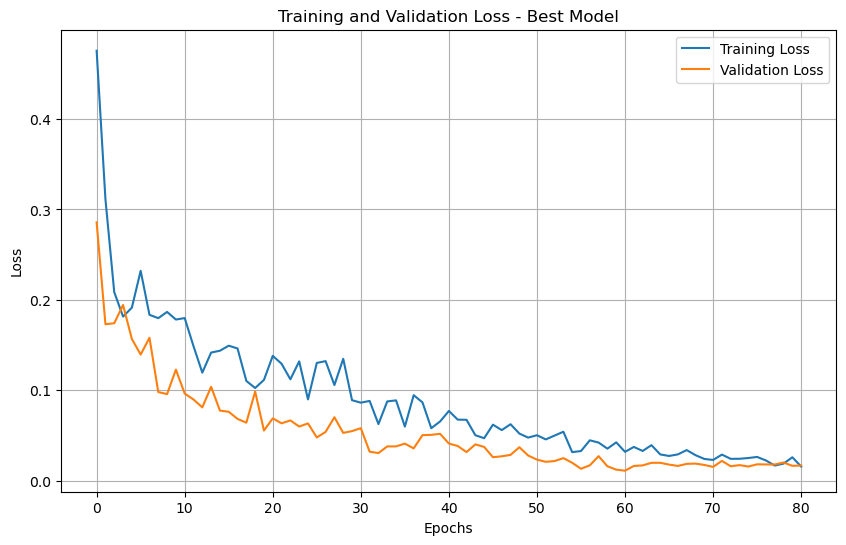

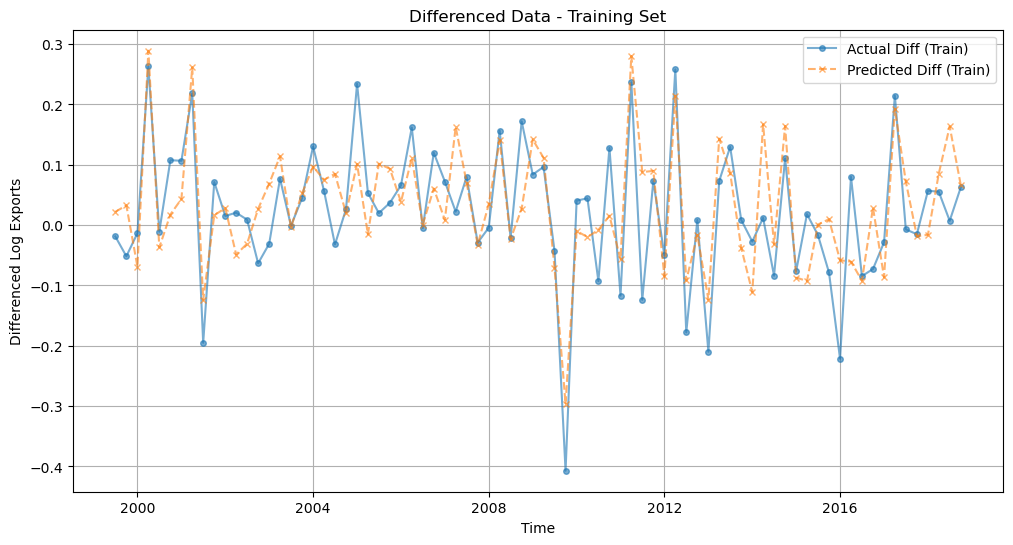

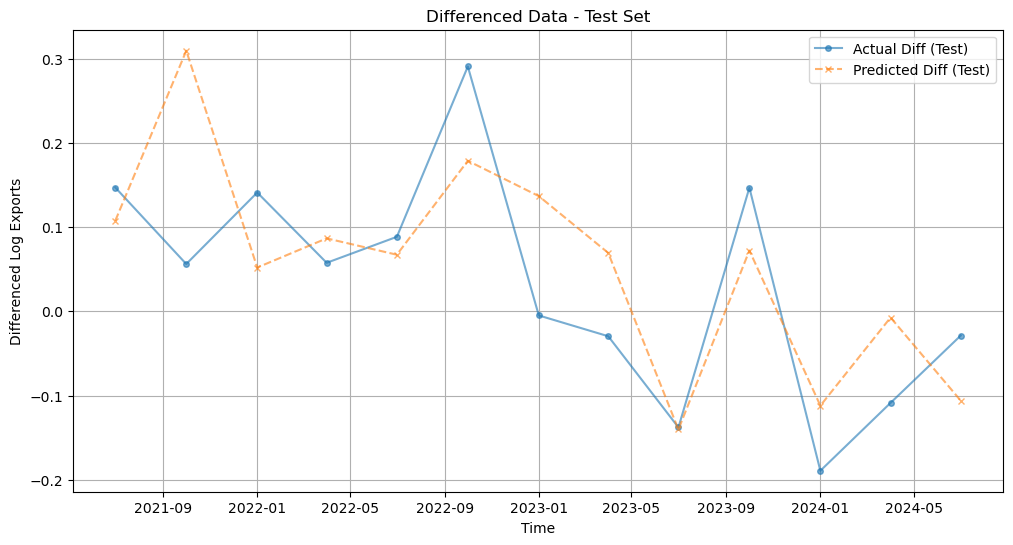

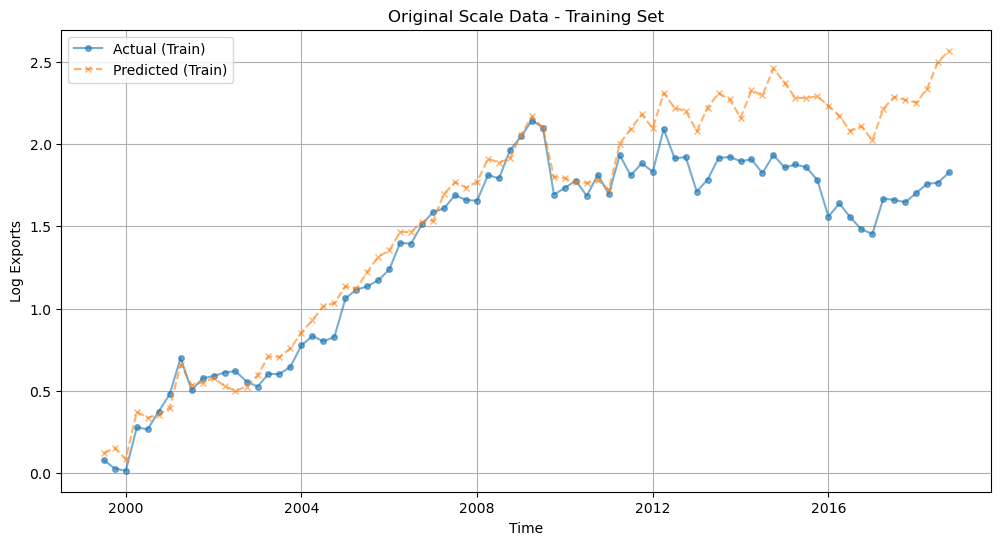

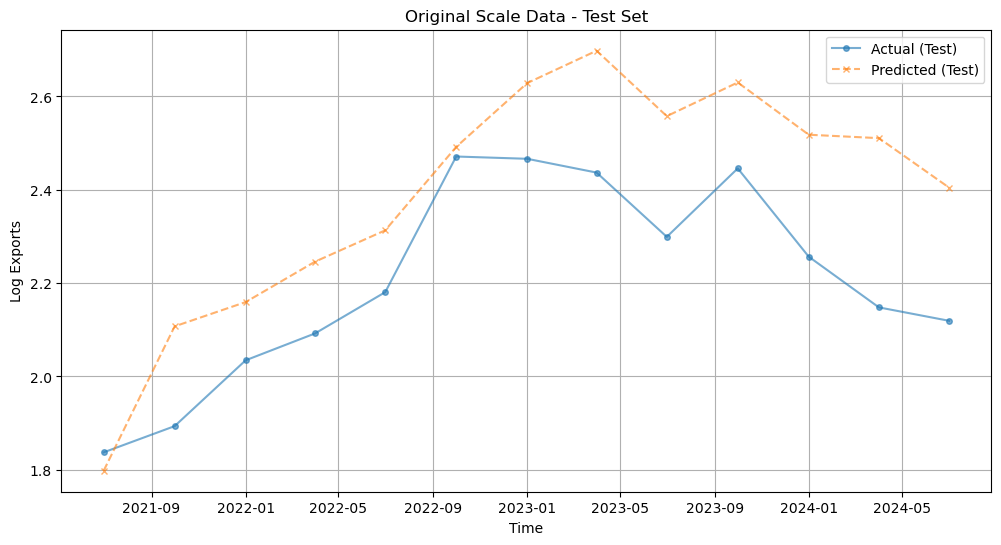


Grid search complete. Results saved to 'grid_search_results.csv' and 'best_model_results.csv'


In [205]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, LSTM, GRU
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import ParameterGrid
import time

exog_vars = ["Imports", "CRUDE_OIL_PRICE_DOLLAR", "Log_EUO_AREA_GDP_bn"]
target = "Log_Exports"

# Step 1: Prepare the data
original_target = df[target].copy()

for var in exog_vars:
    df[f'{var}_diff'] = df[var].diff()

df[target + "_diff"] = df[target].diff()

# Drop the NaN values after differencing
df_diff = df.dropna().copy()

# Update the exogenous variables to differenced versions
exog_vars_diff = [f'{var}_diff' for var in exog_vars]
X = df_diff[exog_vars_diff]
y = df_diff[f'{target}_diff']

# Step 2: Split the data into training and testing sets
train_size = int(len(X) * 0.8)  # 80% for training
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

train_indices = X_train.index
test_indices = X_test.index

# Step 3: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Define the grid search parameters - appropriate for a small dataset
param_grid = {
    'rnn_type': ['SimpleRNN', 'LSTM', 'GRU'],  # Different recurrent layer types
    'units': [20, 40],  # Fewer units for small dataset
    'layers': [1, 2],  # Number of recurrent layers
    'dropout': [0.0, 0.2],  # Dropout rates
    'timesteps': [5, 10],  # Number of timesteps to look back
    'batch_size': [8, 16],  # Smaller batch sizes
    'learning_rate': [0.01, 0.001],  # Learning rates
    'optimizer': ['adam', 'rmsprop']  # Optimizers
}

# Generate all combinations of parameters
all_params = list(ParameterGrid(param_grid))
print(f"Total number of combinations: {len(all_params)}")

# Prepare results storage
results = []

# Step 5: Define a function to build and evaluate a model with specific parameters
def build_and_evaluate_model(params, X_train, y_train, X_test, y_test, train_indices, test_indices):
    timesteps = params['timesteps']
    
    # Reshape data according to timesteps
    X_train_rnn = []
    y_train_rnn = []
    train_indices_used = []
    
    for i in range(timesteps, len(X_train_scaled)):
        X_train_rnn.append(X_train_scaled[i-timesteps:i])
        y_train_rnn.append(y_train.iloc[i])
        train_indices_used.append(train_indices[i])
    
    X_train_rnn, y_train_rnn = np.array(X_train_rnn), np.array(y_train_rnn)
    train_indices_used = pd.Index(train_indices_used)
    
    X_test_rnn = []
    y_test_rnn = []
    test_indices_used = []
    
    for i in range(timesteps, len(X_test_scaled)):
        X_test_rnn.append(X_test_scaled[i-timesteps:i])
        y_test_rnn.append(y_test.iloc[i])
        test_indices_used.append(test_indices[i])
    
    X_test_rnn, y_test_rnn = np.array(X_test_rnn), np.array(y_test_rnn)
    test_indices_used = pd.Index(test_indices_used)
    
    # Build model according to parameters
    model = Sequential()
    
    # First recurrent layer
    if params['rnn_type'] == 'SimpleRNN':
        model.add(SimpleRNN(
            params['units'], 
            input_shape=(timesteps, X_train_rnn.shape[2]), 
            return_sequences=params['layers'] > 1  # Return sequences if we have more layers
        ))
    elif params['rnn_type'] == 'LSTM':
        model.add(LSTM(
            params['units'], 
            input_shape=(timesteps, X_train_rnn.shape[2]), 
            return_sequences=params['layers'] > 1
        ))
    else:  # GRU
        model.add(GRU(
            params['units'], 
            input_shape=(timesteps, X_train_rnn.shape[2]), 
            return_sequences=params['layers'] > 1
        ))
    
    # Add dropout if specified
    if params['dropout'] > 0:
        model.add(Dropout(params['dropout']))
    
    # Add second layer if specified
    if params['layers'] > 1:
        if params['rnn_type'] == 'SimpleRNN':
            model.add(SimpleRNN(params['units'] // 2))  # Smaller second layer
        elif params['rnn_type'] == 'LSTM':
            model.add(LSTM(params['units'] // 2))
        else:  # GRU
            model.add(GRU(params['units'] // 2))
        
        # Add dropout for second layer if specified
        if params['dropout'] > 0:
            model.add(Dropout(params['dropout']))
    
    # Output layer
    model.add(Dense(1))
    
    # Compile model
    if params['optimizer'] == 'adam':
        optimizer = Adam(learning_rate=params['learning_rate'])
    else:  # rmsprop
        optimizer = RMSprop(learning_rate=params['learning_rate'])
    
    model.compile(optimizer=optimizer, loss='mse')
    
    # Early stopping to prevent overfitting - very important for small dataset
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=20,  # More patience for small dataset
        restore_best_weights=True
    )
    
    # Train model
    start_time = time.time()
    history = model.fit(
        X_train_rnn, y_train_rnn,
        epochs=200,  # More epochs but with early stopping
        batch_size=params['batch_size'],
        validation_data=(X_test_rnn, y_test_rnn),
        callbacks=[early_stopping],
        verbose=0
    )
    training_time = time.time() - start_time
    
    # Predict
    y_train_pred_diff = model.predict(X_train_rnn, verbose=0)
    y_test_pred_diff = model.predict(X_test_rnn, verbose=0)
    
    # Evaluate on differenced data
    train_rmse_diff = np.sqrt(mean_squared_error(y_train_rnn, y_train_pred_diff))
    train_mae_diff = mean_absolute_error(y_train_rnn, y_train_pred_diff)
    train_r2_diff = r2_score(y_train_rnn, y_train_pred_diff)
    
    test_rmse_diff = np.sqrt(mean_squared_error(y_test_rnn, y_test_pred_diff))
    test_mae_diff = mean_absolute_error(y_test_rnn, y_test_pred_diff)
    test_r2_diff = r2_score(y_test_rnn, y_test_pred_diff)
    
    # Calculate average validation loss from the last 5 epochs
    final_val_loss = np.mean(history.history['val_loss'][-5:])
    
    # Return all relevant metrics
    return {
        'params': params,
        'train_rmse_diff': train_rmse_diff,
        'train_mae_diff': train_mae_diff,
        'train_r2_diff': train_r2_diff,
        'test_rmse_diff': test_rmse_diff,
        'test_mae_diff': test_mae_diff,
        'test_r2_diff': test_r2_diff,
        'val_loss': final_val_loss,
        'epochs_used': len(history.history['loss']),
        'training_time': training_time
    }

# Step 6: Run the grid search
print("Starting grid search...")
for i, params in enumerate(all_params):
    print(f"Testing combination {i+1}/{len(all_params)}: {params}")
    try:
        result = build_and_evaluate_model(
            params, X_train, y_train, X_test, y_test, train_indices, test_indices
        )
        results.append(result)
        print(f"  Train RMSE: {result['train_rmse_diff']:.4f}, Test RMSE: {result['test_rmse_diff']:.4f}")
        print(f"  Train R²: {result['train_r2_diff']:.4f}, Test R²: {result['test_r2_diff']:.4f}")
    except Exception as e:
        print(f"Error with parameters {params}: {str(e)}")

# Step 7: Convert results to DataFrame for analysis
results_df = pd.DataFrame(results)

# Add a combined score column (you can customize this based on your priorities)
# Lower validation loss is better, higher test R² is better
results_df['combined_score'] = results_df['val_loss'] - results_df['test_r2_diff']

# Sort by the score
sorted_results = results_df.sort_values('combined_score')

# Step 8: Print the top 5 models
print("\nTop 5 Models:")
for i in range(min(5, len(sorted_results))):
    row = sorted_results.iloc[i]
    print(f"\nRank {i+1}:")
    print(f"Parameters: {row['params']}")
    print(f"Training RMSE: {row['train_rmse_diff']:.4f}, Test RMSE: {row['test_rmse_diff']:.4f}")
    print(f"Training R²: {row['train_r2_diff']:.4f}, Test R²: {row['test_r2_diff']:.4f}")
    print(f"Validation Loss: {row['val_loss']:.6f}")
    print(f"Epochs used: {row['epochs_used']}")
    print(f"Training time: {row['training_time']:.2f} seconds")

# Step 9: Get the best model's parameters
best_params = sorted_results.iloc[0]['params']
print("\nBest Model Parameters:")
for key, value in best_params.items():
    print(f"{key}: {value}")

# Step 10: Build and evaluate the best model with more details
print("\nRetraining the best model for detailed evaluation...")
best_timesteps = best_params['timesteps']

# Reshape data using the best timesteps
X_train_rnn = []
y_train_rnn = []
train_indices_used = []

for i in range(best_timesteps, len(X_train_scaled)):
    X_train_rnn.append(X_train_scaled[i-best_timesteps:i])
    y_train_rnn.append(y_train.iloc[i])
    train_indices_used.append(train_indices[i])

X_train_rnn, y_train_rnn = np.array(X_train_rnn), np.array(y_train_rnn)
train_indices_used = pd.Index(train_indices_used)

X_test_rnn = []
y_test_rnn = []
test_indices_used = []

for i in range(best_timesteps, len(X_test_scaled)):
    X_test_rnn.append(X_test_scaled[i-best_timesteps:i])
    y_test_rnn.append(y_test.iloc[i])
    test_indices_used.append(test_indices[i])

X_test_rnn, y_test_rnn = np.array(X_test_rnn), np.array(y_test_rnn)
test_indices_used = pd.Index(test_indices_used)

# Build the best model
best_model = Sequential()
if best_params['rnn_type'] == 'SimpleRNN':
    best_model.add(SimpleRNN(
        best_params['units'], 
        input_shape=(best_timesteps, X_train_rnn.shape[2]), 
        return_sequences=best_params['layers'] > 1
    ))
elif best_params['rnn_type'] == 'LSTM':
    best_model.add(LSTM(
        best_params['units'], 
        input_shape=(best_timesteps, X_train_rnn.shape[2]), 
        return_sequences=best_params['layers'] > 1
    ))
else:  # GRU
    best_model.add(GRU(
        best_params['units'], 
        input_shape=(best_timesteps, X_train_rnn.shape[2]), 
        return_sequences=best_params['layers'] > 1
    ))

if best_params['dropout'] > 0:
    best_model.add(Dropout(best_params['dropout']))

if best_params['layers'] > 1:
    if best_params['rnn_type'] == 'SimpleRNN':
        best_model.add(SimpleRNN(best_params['units'] // 2))
    elif best_params['rnn_type'] == 'LSTM':
        best_model.add(LSTM(best_params['units'] // 2))
    else:  # GRU
        best_model.add(GRU(best_params['units'] // 2))
    
    if best_params['dropout'] > 0:
        best_model.add(Dropout(best_params['dropout']))

best_model.add(Dense(1))

if best_params['optimizer'] == 'adam':
    optimizer = Adam(learning_rate=best_params['learning_rate'])
else:  # rmsprop
    optimizer = RMSprop(learning_rate=best_params['learning_rate'])

best_model.compile(optimizer=optimizer, loss='mse')

# Use early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True
)

# Train the model
best_history = best_model.fit(
    X_train_rnn, y_train_rnn,
    epochs=200,
    batch_size=best_params['batch_size'],
    validation_data=(X_test_rnn, y_test_rnn),
    callbacks=[early_stopping],
    verbose=1
)

# Generate predictions
y_train_pred_diff = best_model.predict(X_train_rnn)
y_test_pred_diff = best_model.predict(X_test_rnn)

# Function for inverse differencing
def inverse_differencing(original_series, diff_series, indices):
    reconstructed = pd.Series(index=indices)
    
    first_idx = indices[0]
    previous_idx = df.index[df.index.get_loc(first_idx) - 1]
    previous_value = original_series[previous_idx]
    
    for i, idx in enumerate(indices):
        reconstructed[idx] = previous_value + diff_series[i]
        previous_value = reconstructed[idx]
        
    return reconstructed

# Reconstruct original scale predictions
y_train_pred_original = inverse_differencing(
    original_target, 
    y_train_pred_diff.flatten(), 
    train_indices_used
)

y_test_pred_original = inverse_differencing(
    original_target, 
    y_test_pred_diff.flatten(), 
    test_indices_used
)

# Get actual values
y_true_train = original_target.loc[train_indices_used]
y_true_test = original_target.loc[test_indices_used]

# Evaluate on differenced data
print("\nBest Model - Differenced Data Evaluation:")
train_rmse_diff = np.sqrt(mean_squared_error(y_train_rnn, y_train_pred_diff))
train_mae_diff = mean_absolute_error(y_train_rnn, y_train_pred_diff)
train_r2_diff = r2_score(y_train_rnn, y_train_pred_diff)
print(f"Training - RMSE: {train_rmse_diff:.4f}, MAE: {train_mae_diff:.4f}, R²: {train_r2_diff:.4f}")

test_rmse_diff = np.sqrt(mean_squared_error(y_test_rnn, y_test_pred_diff))
test_mae_diff = mean_absolute_error(y_test_rnn, y_test_pred_diff)
test_r2_diff = r2_score(y_test_rnn, y_test_pred_diff)
print(f"Testing - RMSE: {test_rmse_diff:.4f}, MAE: {test_mae_diff:.4f}, R²: {test_r2_diff:.4f}")

# Evaluate on original scale
print("\nBest Model - Original Scale Evaluation:")
train_rmse_orig = np.sqrt(mean_squared_error(y_true_train, y_train_pred_original))
train_mae_orig = mean_absolute_error(y_true_train, y_train_pred_original)
train_r2_orig = r2_score(y_true_train, y_train_pred_original)
print(f"Training - RMSE: {train_rmse_orig:.4f}, MAE: {train_mae_orig:.4f}, R²: {train_r2_orig:.4f}")

test_rmse_orig = np.sqrt(mean_squared_error(y_true_test, y_test_pred_original))
test_mae_orig = mean_absolute_error(y_true_test, y_test_pred_original)
test_r2_orig = r2_score(y_true_test, y_test_pred_original)
print(f"Testing - RMSE: {test_rmse_orig:.4f}, MAE: {test_mae_orig:.4f}, R²: {test_r2_orig:.4f}")

# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(best_history.history['loss'], label='Training Loss')
plt.plot(best_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss - Best Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot differenced predictions
plt.figure(figsize=(12, 6))
plt.plot(train_indices_used, y_train_rnn, label='Actual Diff (Train)', marker='o', markersize=4, alpha=0.6)
plt.plot(train_indices_used, y_train_pred_diff, label='Predicted Diff (Train)', marker='x', linestyle='dashed', markersize=4, alpha=0.6)
plt.title('Differenced Data - Training Set')
plt.xlabel('Time')
plt.ylabel('Differenced Log Exports')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(test_indices_used, y_test_rnn, label='Actual Diff (Test)', marker='o', markersize=4, alpha=0.6)
plt.plot(test_indices_used, y_test_pred_diff, label='Predicted Diff (Test)', marker='x', linestyle='dashed', markersize=4, alpha=0.6)
plt.title('Differenced Data - Test Set')
plt.xlabel('Time')
plt.ylabel('Differenced Log Exports')
plt.legend()
plt.grid(True)
plt.show()

# Plot original scale predictions
plt.figure(figsize=(12, 6))
plt.plot(y_true_train.index, y_true_train, label='Actual (Train)', marker='o', markersize=4, alpha=0.6)
plt.plot(y_train_pred_original.index, y_train_pred_original, label='Predicted (Train)', marker='x', linestyle='dashed', markersize=4, alpha=0.6)
plt.title('Original Scale Data - Training Set')
plt.xlabel('Time')
plt.ylabel('Log Exports')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(y_true_test.index, y_true_test, label='Actual (Test)', marker='o', markersize=4, alpha=0.6)
plt.plot(y_test_pred_original.index, y_test_pred_original, label='Predicted (Test)', marker='x', linestyle='dashed', markersize=4, alpha=0.6)
plt.title('Original Scale Data - Test Set')
plt.xlabel('Time')
plt.ylabel('Log Exports')
plt.legend()
plt.grid(True)
plt.show()

# Save the best model parameters and results to CSV
best_model_results = {
    'Parameter': list(best_params.keys()) + [
        'Train RMSE (Diff)', 'Train MAE (Diff)', 'Train R2 (Diff)',
        'Test RMSE (Diff)', 'Test MAE (Diff)', 'Test R2 (Diff)',
        'Train RMSE (Orig)', 'Train MAE (Orig)', 'Train R2 (Orig)',
        'Test RMSE (Orig)', 'Test MAE (Orig)', 'Test R2 (Orig)'
    ],
    'Value': list(best_params.values()) + [
        train_rmse_diff, train_mae_diff, train_r2_diff,
        test_rmse_diff, test_mae_diff, test_r2_diff,
        train_rmse_orig, train_mae_orig, train_r2_orig,
        test_rmse_orig, test_mae_orig, test_r2_orig
    ]
}
pd.DataFrame(best_model_results).to_csv('best_model_results.csv', index=False)

# Save all results to CSV for further analysis
results_df.to_csv('grid_search_results.csv', index=False)

print("\nGrid search complete. Results saved to 'grid_search_results.csv' and 'best_model_results.csv'")

` i used the saved Exceloutput called  Grid search_output to get best model from the above output`